# Proyek Analisis Data: Air Quality
- **Nama:** Harry Mardika
- **Email:** harrymardika48@gmail.com
- **ID Dicoding:** hkacode

## Data Understanding

- No: Nomor urut dari setiap data dalam dataset.

- year: Tahun pengambilan data.

- month: Bulan pengambilan data.

- day: Hari pengambilan data.

- hour: Jam pengambilan data, yang mungkin menunjukkan waktu spesifik dalam sehari.

- PM2.5: Konsentrasi partikel udara yang berukuran kurang dari 2.5 mikrometer dalam mikrogram per meter kubik (µg/m³). PM2.5 adalah indikator kualitas udara yang penting, karena partikel ini dapat masuk ke dalam paru-paru dan menyebabkan masalah kesehatan.

- PM10: Konsentrasi partikel udara yang berukuran kurang dari 10 mikrometer dalam mikrogram per meter kubik (µg/m³). Meskipun lebih besar dari PM2.5, PM10 juga memiliki dampak pada kesehatan.

- SO2: Konsentrasi sulfur dioksida dalam mikrogram per meter kubik (µg/m³). SO2 adalah gas yang dihasilkan dari pembakaran bahan bakar fosil dan dapat menyebabkan iritasi pada sistem pernapasan.

- NO2: Konsentrasi nitrogen dioksida dalam mikrogram per meter kubik (µg/m³). NO2 merupakan gas polutan yang dihasilkan dari kendaraan bermotor dan aktivitas industri.

- CO: Konsentrasi karbon monoksida dalam mikrogram per meter kubik (µg/m³). CO adalah gas beracun yang tidak berwarna dan tidak berbau, yang dihasilkan dari pembakaran tidak sempurna.

- O3: Konsentrasi ozon dalam mikrogram per meter kubik (µg/m³). Ozon di permukaan tanah dapat menjadi polutan udara yang berbahaya.

- TEMP: Suhu udara dalam derajat Celsius (°C).

- PRES: Tekanan udara dalam hPa (hectopascal).

- DEWP: Titik embun dalam derajat Celsius (°C). Titik embun adalah suhu di mana udara mulai mengembun menjadi air.

- RAIN: Curah hujan dalam milimeter (mm).

- wd: Arah angin yang direpresentasikan dalam singkatan kompas (misalnya, N untuk Utara, NW untuk Barat Laut, dll.).

- WSPM: Kecepatan angin dalam meter per detik (m/s).

- station: Nama stasiun pengambilan data.

## Menentukan Pertanyaan Bisnis

- Faktor-faktor apa saja yang paling mempengaruhi kualitas udara (PM2.5 dan PM10)?
- Bagaimana distribusi kualitas udara (PM2.5 dan PM10) sepanjang tahun pada salah satu stasiun?
- Bagaimana pola musim dalam perubahan suhu (TEMP), tekanan udara (PRES), dan titik embun (DEWP) pada salah satu stasiun? 
- Bagaimana variasi kualitas udara dan faktornya di berbagai stasiun pengukuran?
- Bagaimana pola distribusi kualitas udara di berbagai wilayah Beijing berdasarkan kategori kualitas udara?
- Bagaimana perbandingan kualitas udara antara pusat kota dan daerah pinggiran Beijing, dan apa implikasinya terhadap perencanaan kota?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import torch
#import torch_directml
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [2]:
# Daftar nama file CSV (sesuaikan dengan nama file Anda)
file_list = ['data/PRSA_Data_Aotizhongxin_20130301-20170228.csv', 
             'data/PRSA_Data_Changping_20130301-20170228.csv', 
             'data/PRSA_Data_Dingling_20130301-20170228.csv', 
             'data/PRSA_Data_Dongsi_20130301-20170228.csv',
             'data/PRSA_Data_Guanyuan_20130301-20170228.csv',
             'data/PRSA_Data_Gucheng_20130301-20170228.csv',
             'data/PRSA_Data_Huairou_20130301-20170228.csv',
             'data/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
             'data/PRSA_Data_Shunyi_20130301-20170228.csv',
             'data/PRSA_Data_Tiantan_20130301-20170228.csv',
             'data/PRSA_Data_Wanliu_20130301-20170228.csv',
             'data/PRSA_Data_Wanshouxigong_20130301-20170228.csv'
             ]


# Membuat DataFrame kosong untuk menampung data gabungan
df_combined = pd.DataFrame()

# Menggabungkan setiap file CSV ke dalam DataFrame
for file in file_list:
    df = pd.read_csv(file)
    df_combined = pd.concat([df_combined, df], ignore_index=True)

df_combined.reset_index(inplace=True)
# Menyimpan DataFrame gabungan ke file CSV baru
df_combined.to_csv('data/data_gabungan.csv', index=False)

Membuat data gabungan agar memudahkan dalam melakukan analisis data.

In [3]:
data = pd.read_csv('data/data_gabungan.csv')

In [4]:
data.head()

,index,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [5]:
data.rename(columns={"PM2.5": "PM25"}, inplace=True)

Mengubah nama kolom agar tidak terjadi kesalahan dalam menganalisis data karena nama kolom tersebut mengandung "."

In [6]:
# Mengecek variabel yang ada pada kolom 'station' untuk memastikan jumlah stasiun yang ada
stations = data['station'].unique()

# Membuat variabel baru berdasarkan stasiun
big_data = {station: data[data['station'] == station] for station in stations}

Membuat sebuah pusat data dalam format dictionary

**Insight:**
- Data dari berbagai stasiun telah berhasil dikumpulkan dan digabungkan ke dalam satu file CSV untuk memudahkan analisis.
- Nama kolom untuk parameter kualitas udara `PM2.5` telah distandardisasi agar tidak terjadi kesalahan selama proses analisis.
- Data telah disusun dalam format dictionary berdasarkan stasiun, memungkinkan analisis per stasiun secara efisien pada tahap berikutnya.

### Assessing Data

##### Missing Value

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   index    420768 non-null  int64  
 1   No       420768 non-null  int64  
 2   year     420768 non-null  int64  
 3   month    420768 non-null  int64  
 4   day      420768 non-null  int64  
 5   hour     420768 non-null  int64  
 6   PM25     412029 non-null  float64
 7   PM10     414319 non-null  float64
 8   SO2      411747 non-null  float64
 9   NO2      408652 non-null  float64
 10  CO       400067 non-null  float64
 11  O3       407491 non-null  float64
 12  TEMP     420370 non-null  float64
 13  PRES     420375 non-null  float64
 14  DEWP     420365 non-null  float64
 15  RAIN     420378 non-null  float64
 16  wd       418946 non-null  object 
 17  WSPM     420450 non-null  float64
 18  station  420768 non-null  object 
dtypes: float64(11), int64(6), object(2)
memory usage: 61.0+ MB


In [8]:
missing_values = {}

for key, df in big_data.items():
    missing_values[key] = df.isna().sum()

missing_values_df = pd.DataFrame(missing_values) # Mengubah jumlah missing value ke dalam tabel DataFrame
missing_values_df

,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
index,0,0,0,0,0,0,0,0,0,0,0,0
No,0,0,0,0,0,0,0,0,0,0,0,0
year,0,0,0,0,0,0,0,0,0,0,0,0
month,0,0,0,0,0,0,0,0,0,0,0,0
day,0,0,0,0,0,0,0,0,0,0,0,0
hour,0,0,0,0,0,0,0,0,0,0,0,0
PM25,925,774,779,750,616,646,953,628,913,677,382,696
PM10,718,582,656,553,429,381,777,440,548,597,284,484
SO2,935,628,730,663,474,507,980,446,1296,1118,575,669
NO2,1023,667,1234,1601,659,668,1639,692,1365,744,1070,754


Berdasarkan data diatas, dapat dilihat pada data ini masih sangat banyak missing value.

##### Duplicate Data

In [9]:
for columns, df in big_data.items() :
    print(columns, ":", df.duplicated().sum()) # Melihat jumlah data duplikat setiap tabel

Aotizhongxin : 0
Changping : 0
Dingling : 0
Dongsi : 0
Guanyuan : 0
Gucheng : 0
Huairou : 0
Nongzhanguan : 0
Shunyi : 0
Tiantan : 0
Wanliu : 0
Wanshouxigong : 0


Pada data ini tidak terdapat duplikasi data, dapat dilihat setiap stasiunnya memiliki jumlah data duplikasi bernilai 0

##### Statistik Deskriptif

In [10]:
# Fungsi untuk menghitung statistik deskriptif
def calculate_descriptive_statistics(station_name, df):
    print(f"Statistik Deskriptif untuk Stasiun: {station_name}")
    print(df.describe())
    print("\n" + "-"*50 + "\n")

In [11]:
# Looping melalui setiap stasiun untuk analisis
for station_name, df in big_data.items():
    calculate_descriptive_statistics(station_name, df)

Statistik Deskriptif untuk Stasiun: Aotizhongxin
              index            No          year         month           day  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17531.500000  17532.500000   2014.662560      6.522930     15.729637   
std    10122.249256  10122.249256      1.177213      3.448752      8.800218   
min        0.000000      1.000000   2013.000000      1.000000      1.000000   
25%     8765.750000   8766.750000   2014.000000      4.000000      8.000000   
50%    17531.500000  17532.500000   2015.000000      7.000000     16.000000   
75%    26297.250000  26298.250000   2016.000000     10.000000     23.000000   
max    35063.000000  35064.000000   2017.000000     12.000000     31.000000   

               hour          PM25          PM10           SO2           NO2  \
count  35064.000000  34139.000000  34346.000000  34129.000000  34041.000000   
mean      11.500000     82.773611    110.060391     17.375901     59.305833   
st

Statistik deskriptif ini berguna untuk melihat persebaran data dan variasi data secara umum

##### Outliers

In [12]:
# Fungsi untuk mendeteksi outliers
def detect_outliers(station_name, df):
    def detect_outliers_iqr(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return (column < lower_bound) | (column > upper_bound)

    outliers_summary = {}
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        outliers = df[col][detect_outliers_iqr(df[col])]
        outliers_summary[col] = len(outliers)

    print(f"Jumlah Outliers untuk Stasiun: {station_name}")
    print(outliers_summary)
    print("\n" + "-"*50 + "\n")

# Looping melalui setiap stasiun untuk analisis
for station_name, df in big_data.items():
    detect_outliers(station_name, df)


Jumlah Outliers untuk Stasiun: Aotizhongxin
{'index': 0, 'No': 0, 'year': 0, 'month': 0, 'day': 0, 'hour': 0, 'PM25': 1624, 'PM10': 1080, 'SO2': 3054, 'NO2': 472, 'CO': 2607, 'O3': 1310, 'TEMP': 0, 'PRES': 0, 'DEWP': 0, 'RAIN': 1380, 'WSPM': 1742}

--------------------------------------------------

Jumlah Outliers untuk Stasiun: Changping
{'index': 0, 'No': 0, 'year': 0, 'month': 0, 'day': 0, 'hour': 0, 'PM25': 1674, 'PM10': 1313, 'SO2': 3136, 'NO2': 799, 'CO': 2590, 'O3': 1612, 'TEMP': 0, 'PRES': 0, 'DEWP': 0, 'RAIN': 1350, 'WSPM': 2382}

--------------------------------------------------

Jumlah Outliers untuk Stasiun: Dingling
{'index': 0, 'No': 0, 'year': 0, 'month': 0, 'day': 0, 'hour': 0, 'PM25': 1831, 'PM10': 1430, 'SO2': 2787, 'NO2': 1805, 'CO': 1848, 'O3': 1616, 'TEMP': 0, 'PRES': 0, 'DEWP': 0, 'RAIN': 1350, 'WSPM': 2382}

--------------------------------------------------

Jumlah Outliers untuk Stasiun: Dongsi
{'index': 0, 'No': 0, 'year': 0, 'month': 0, 'day': 0, 'hour': 0,

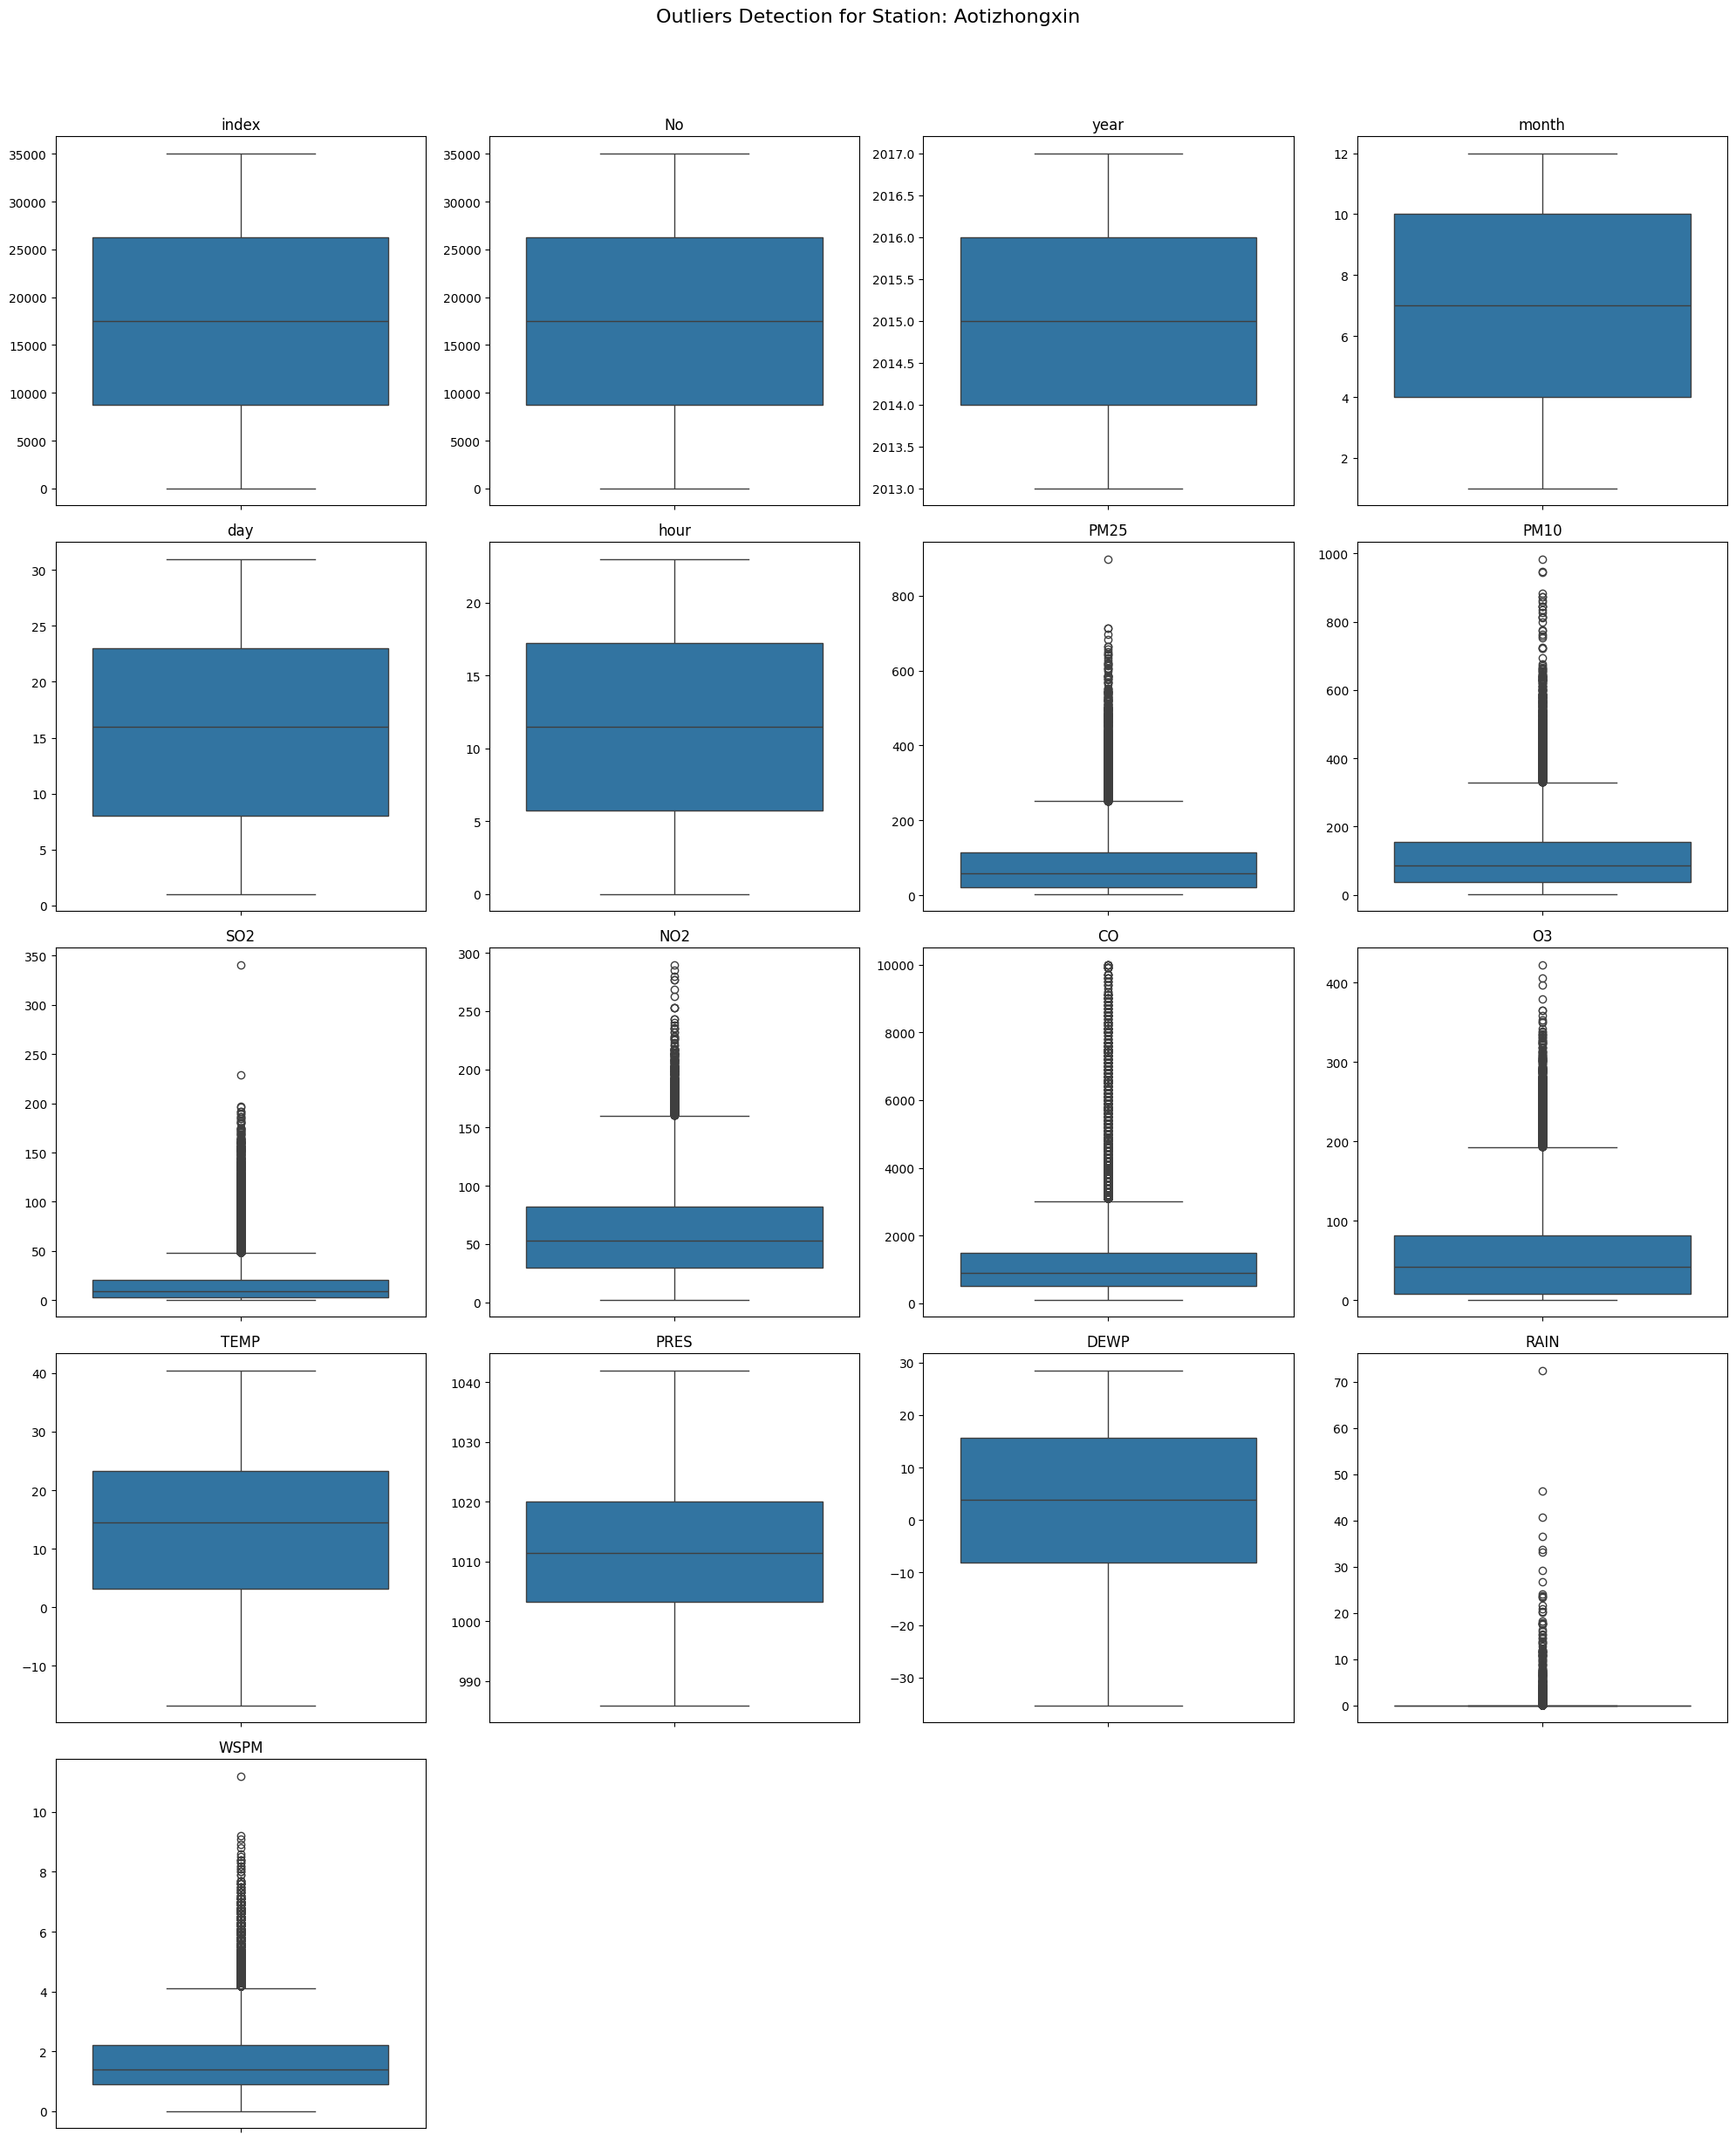

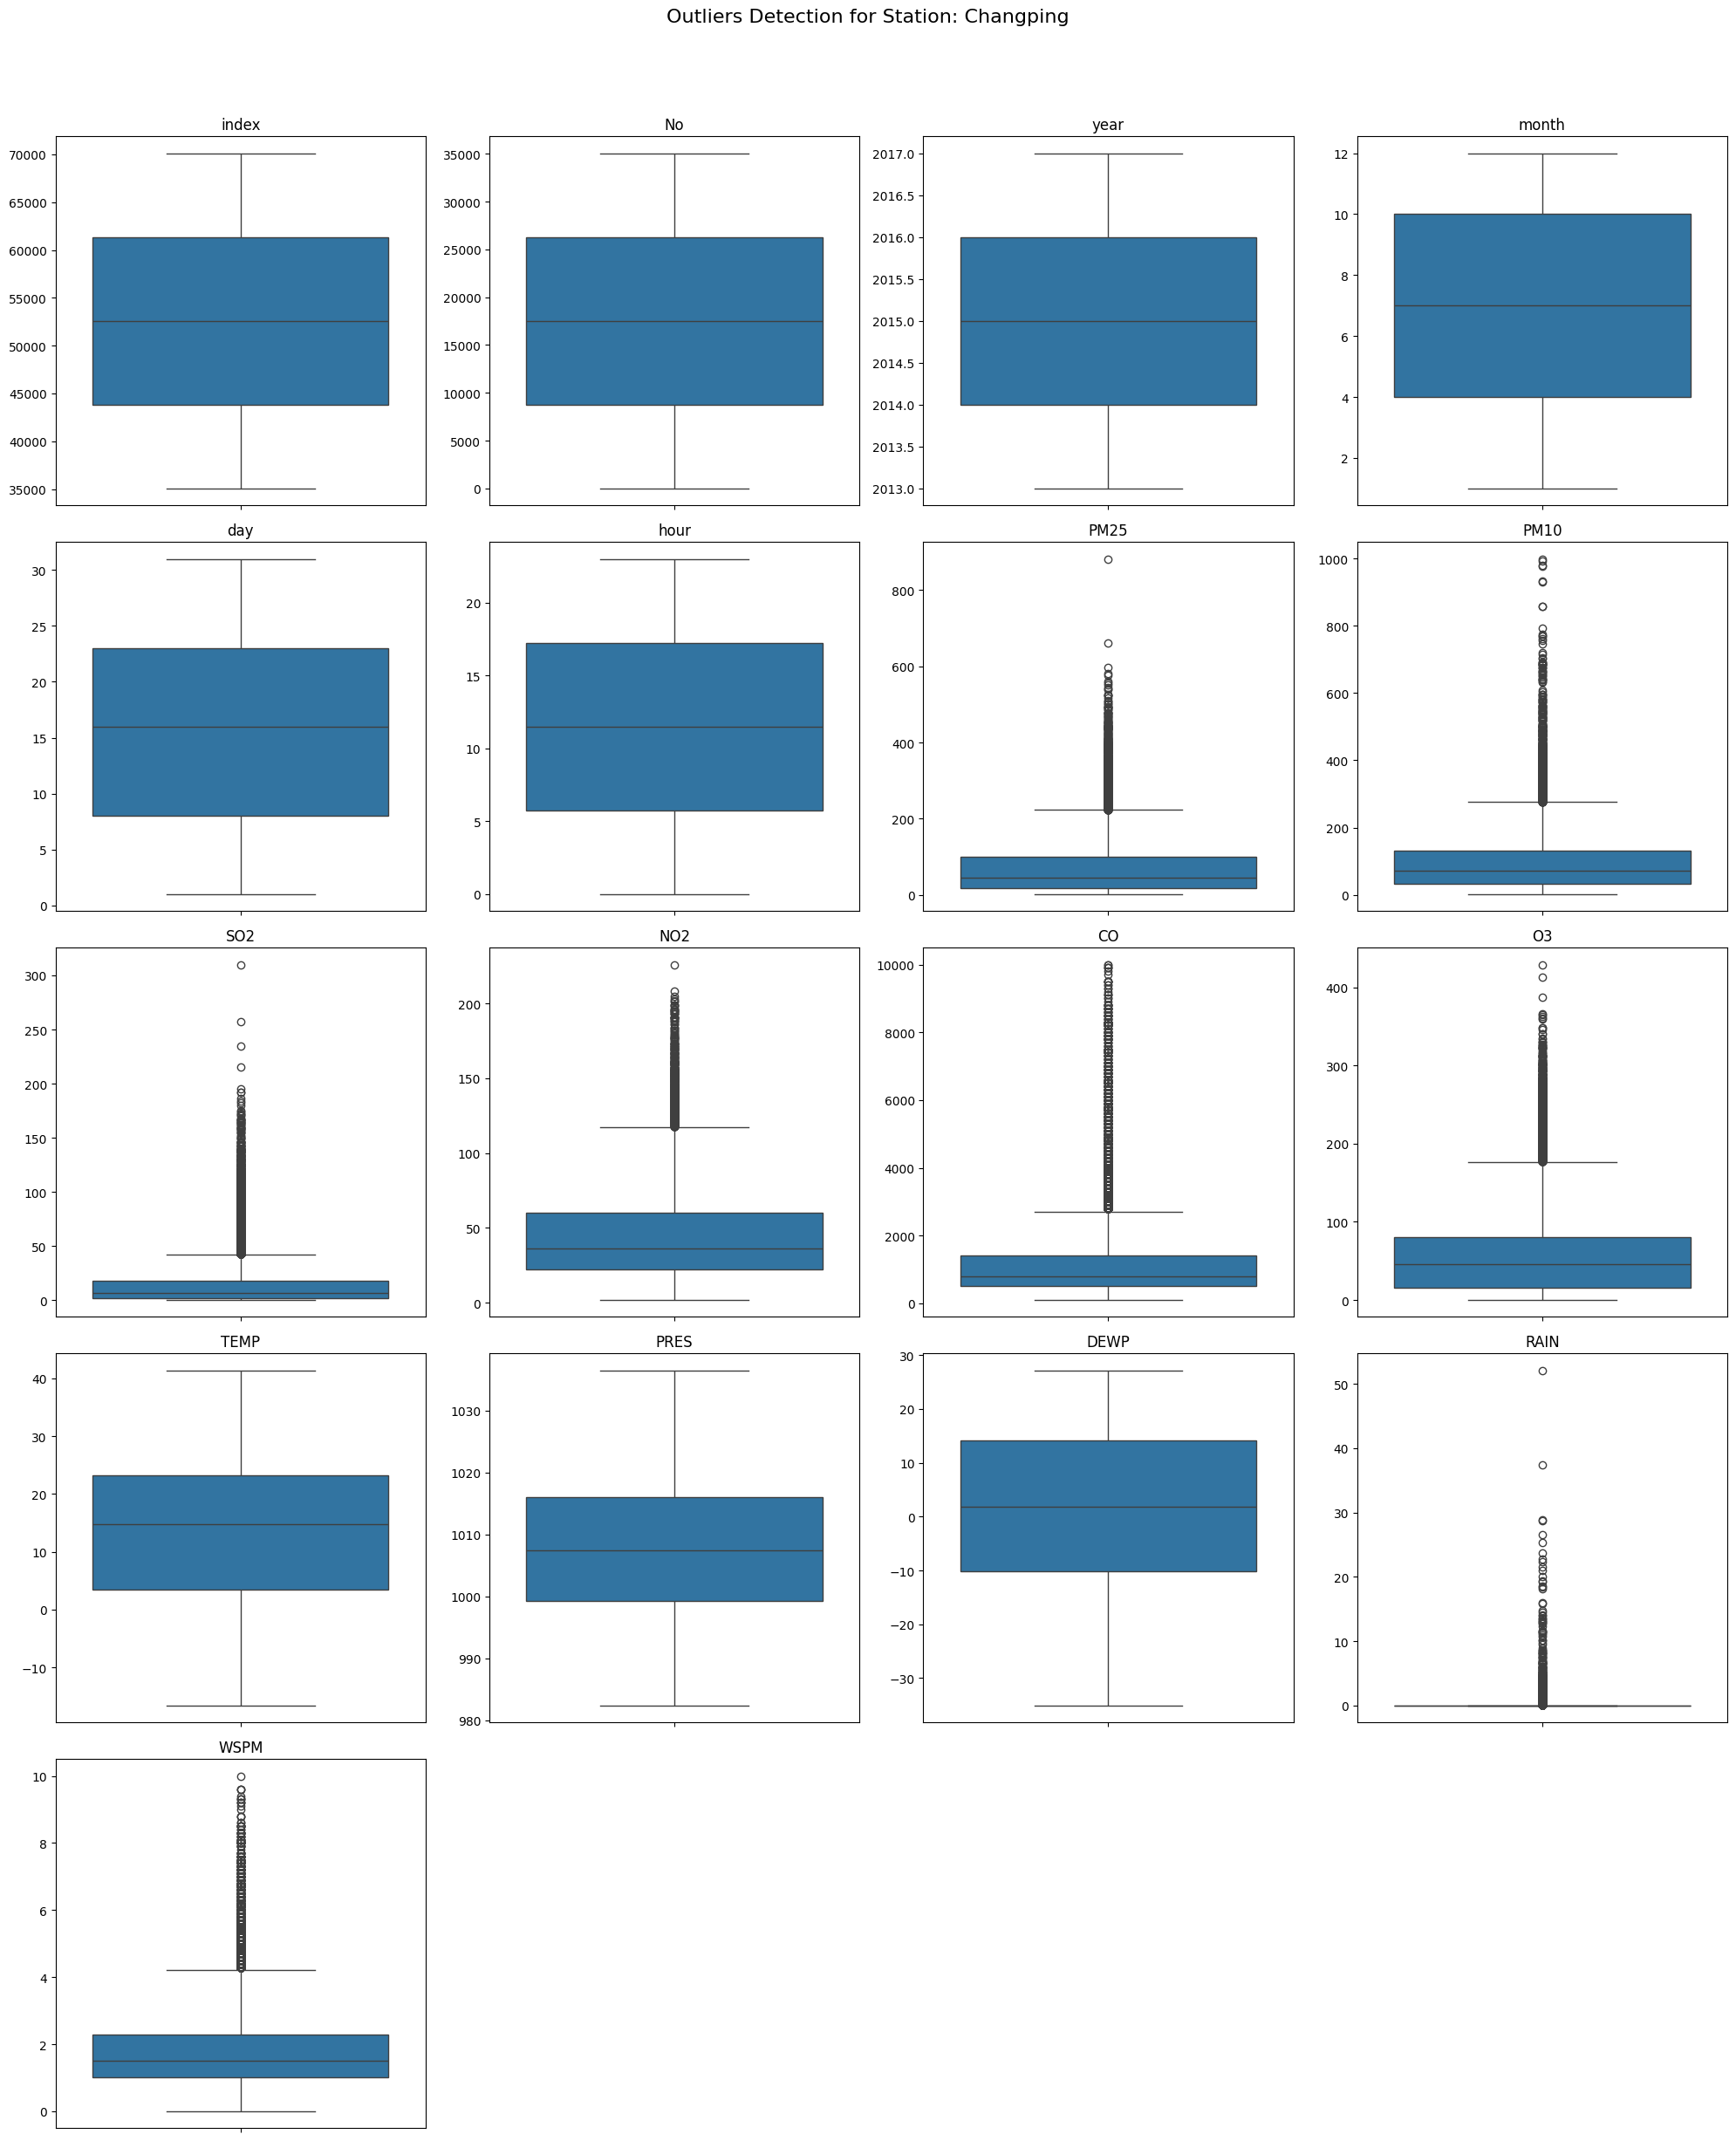

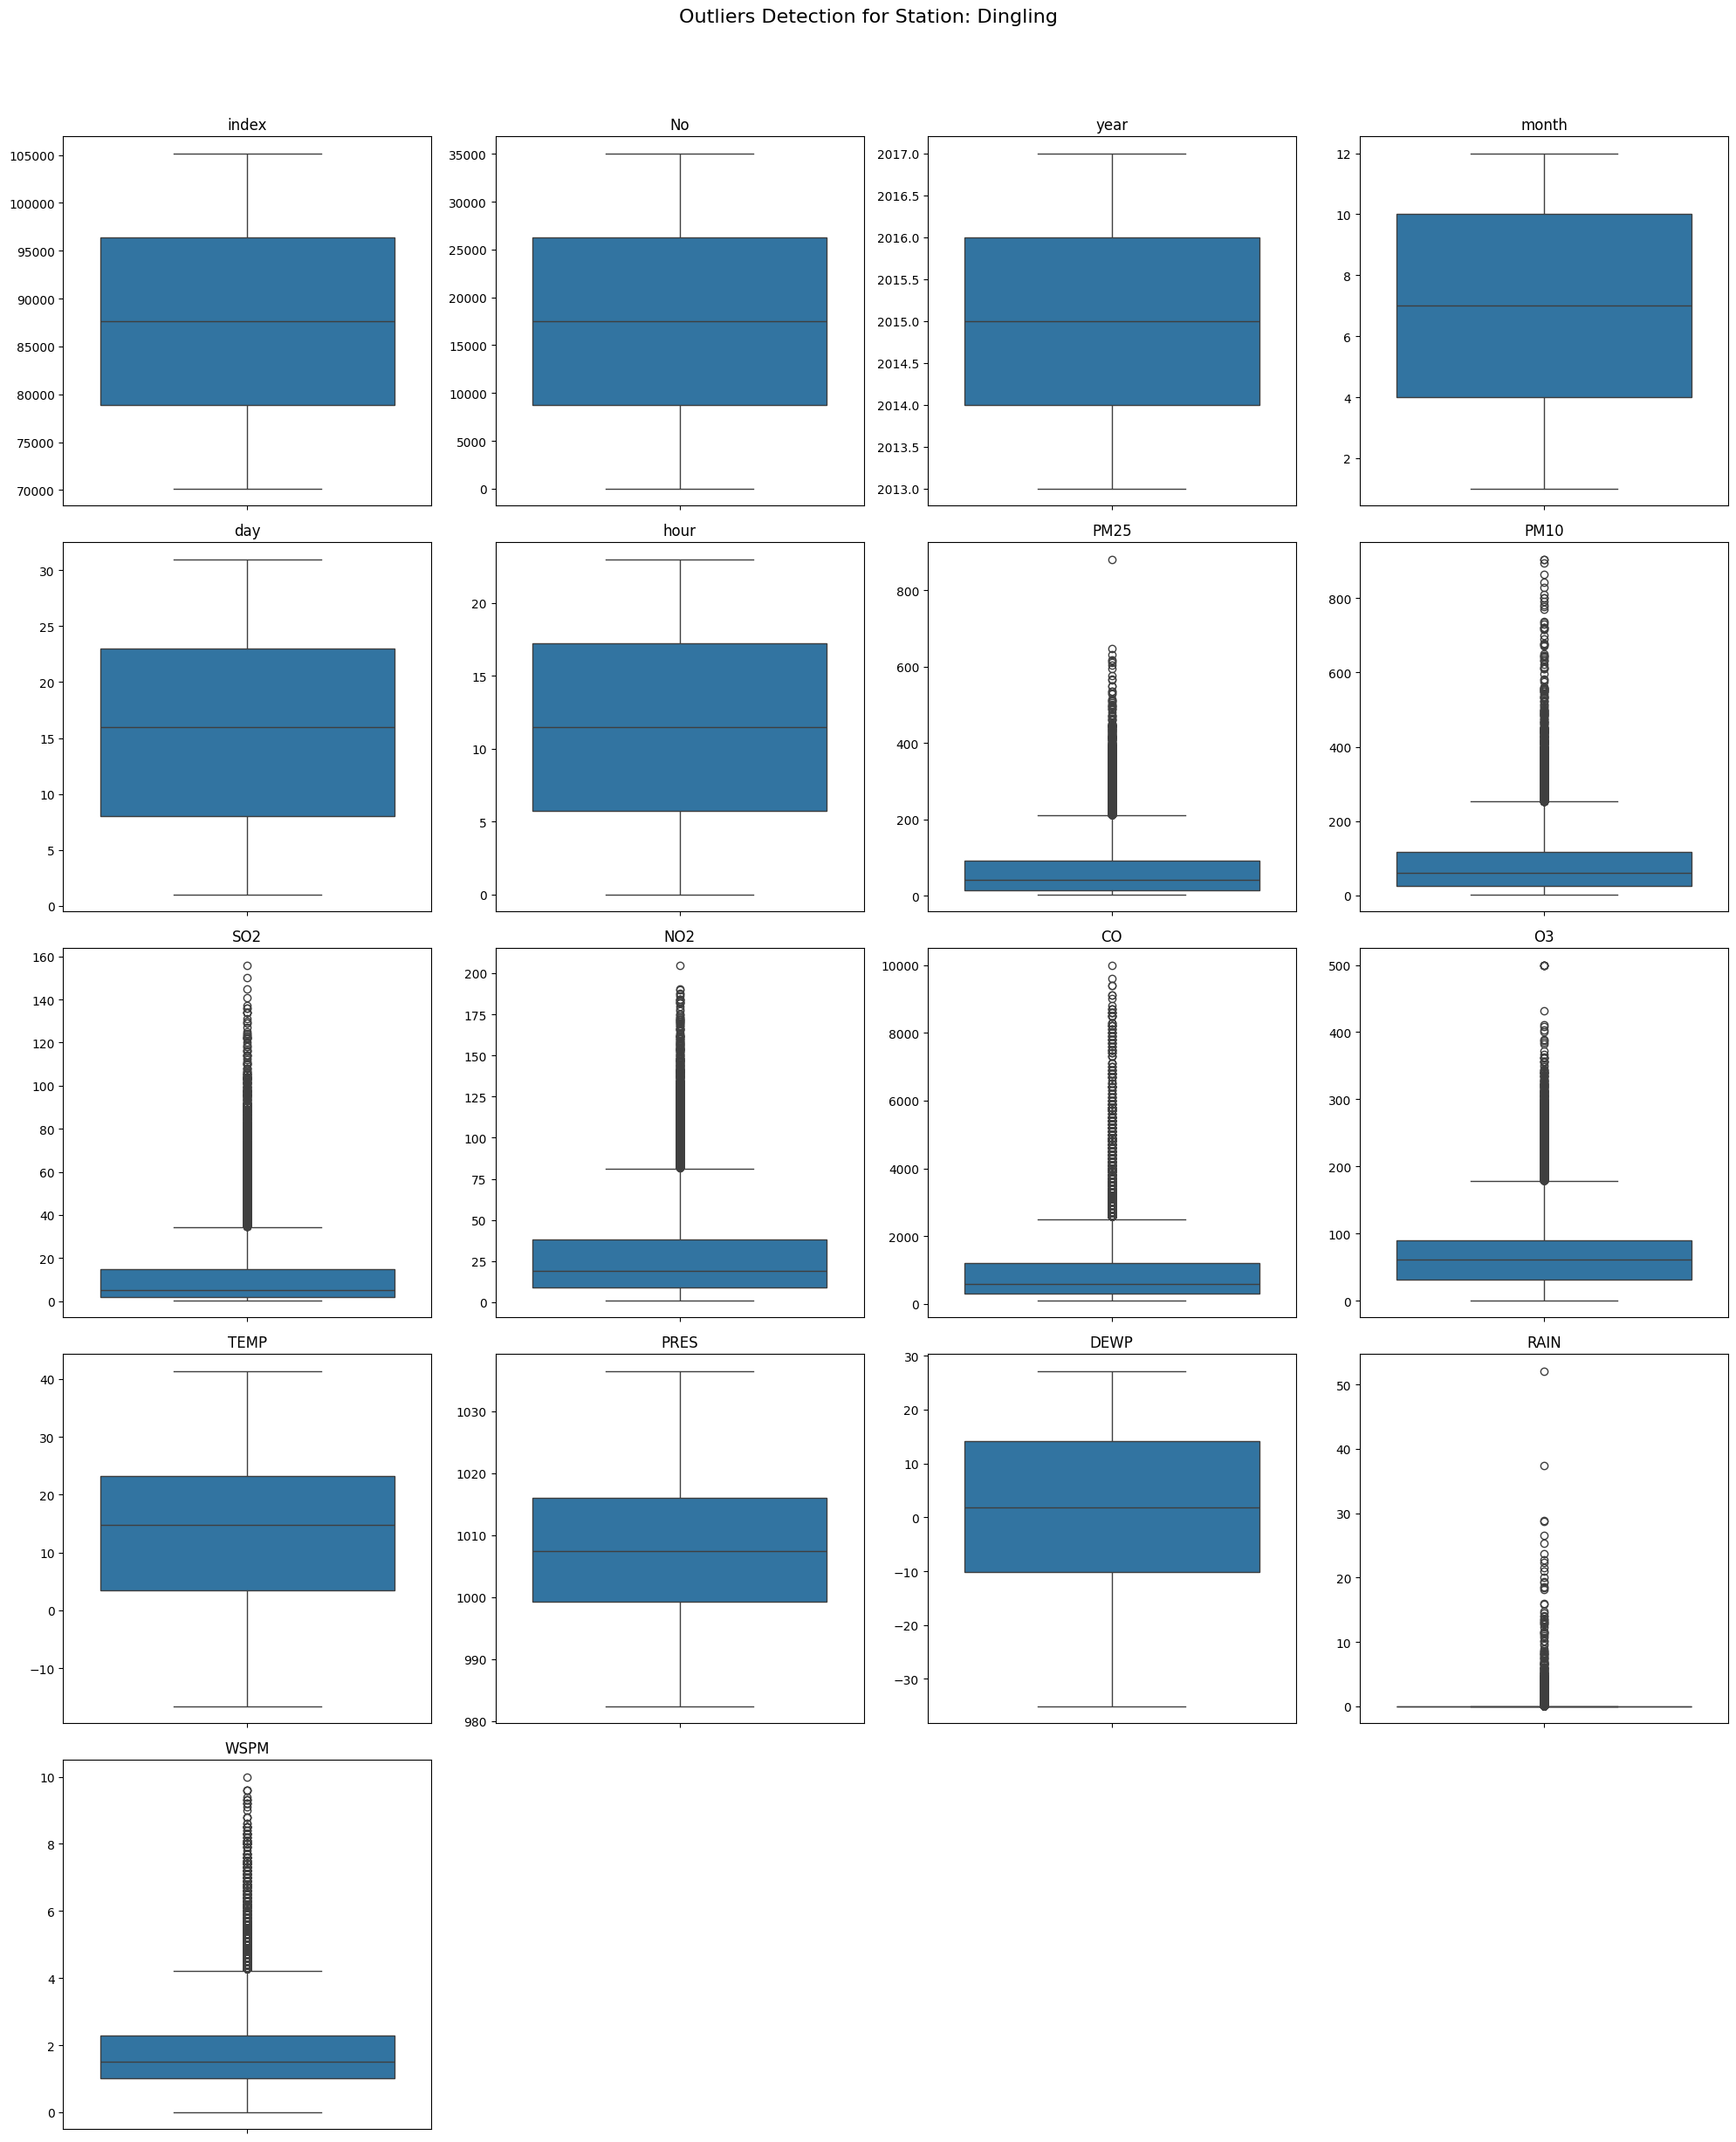

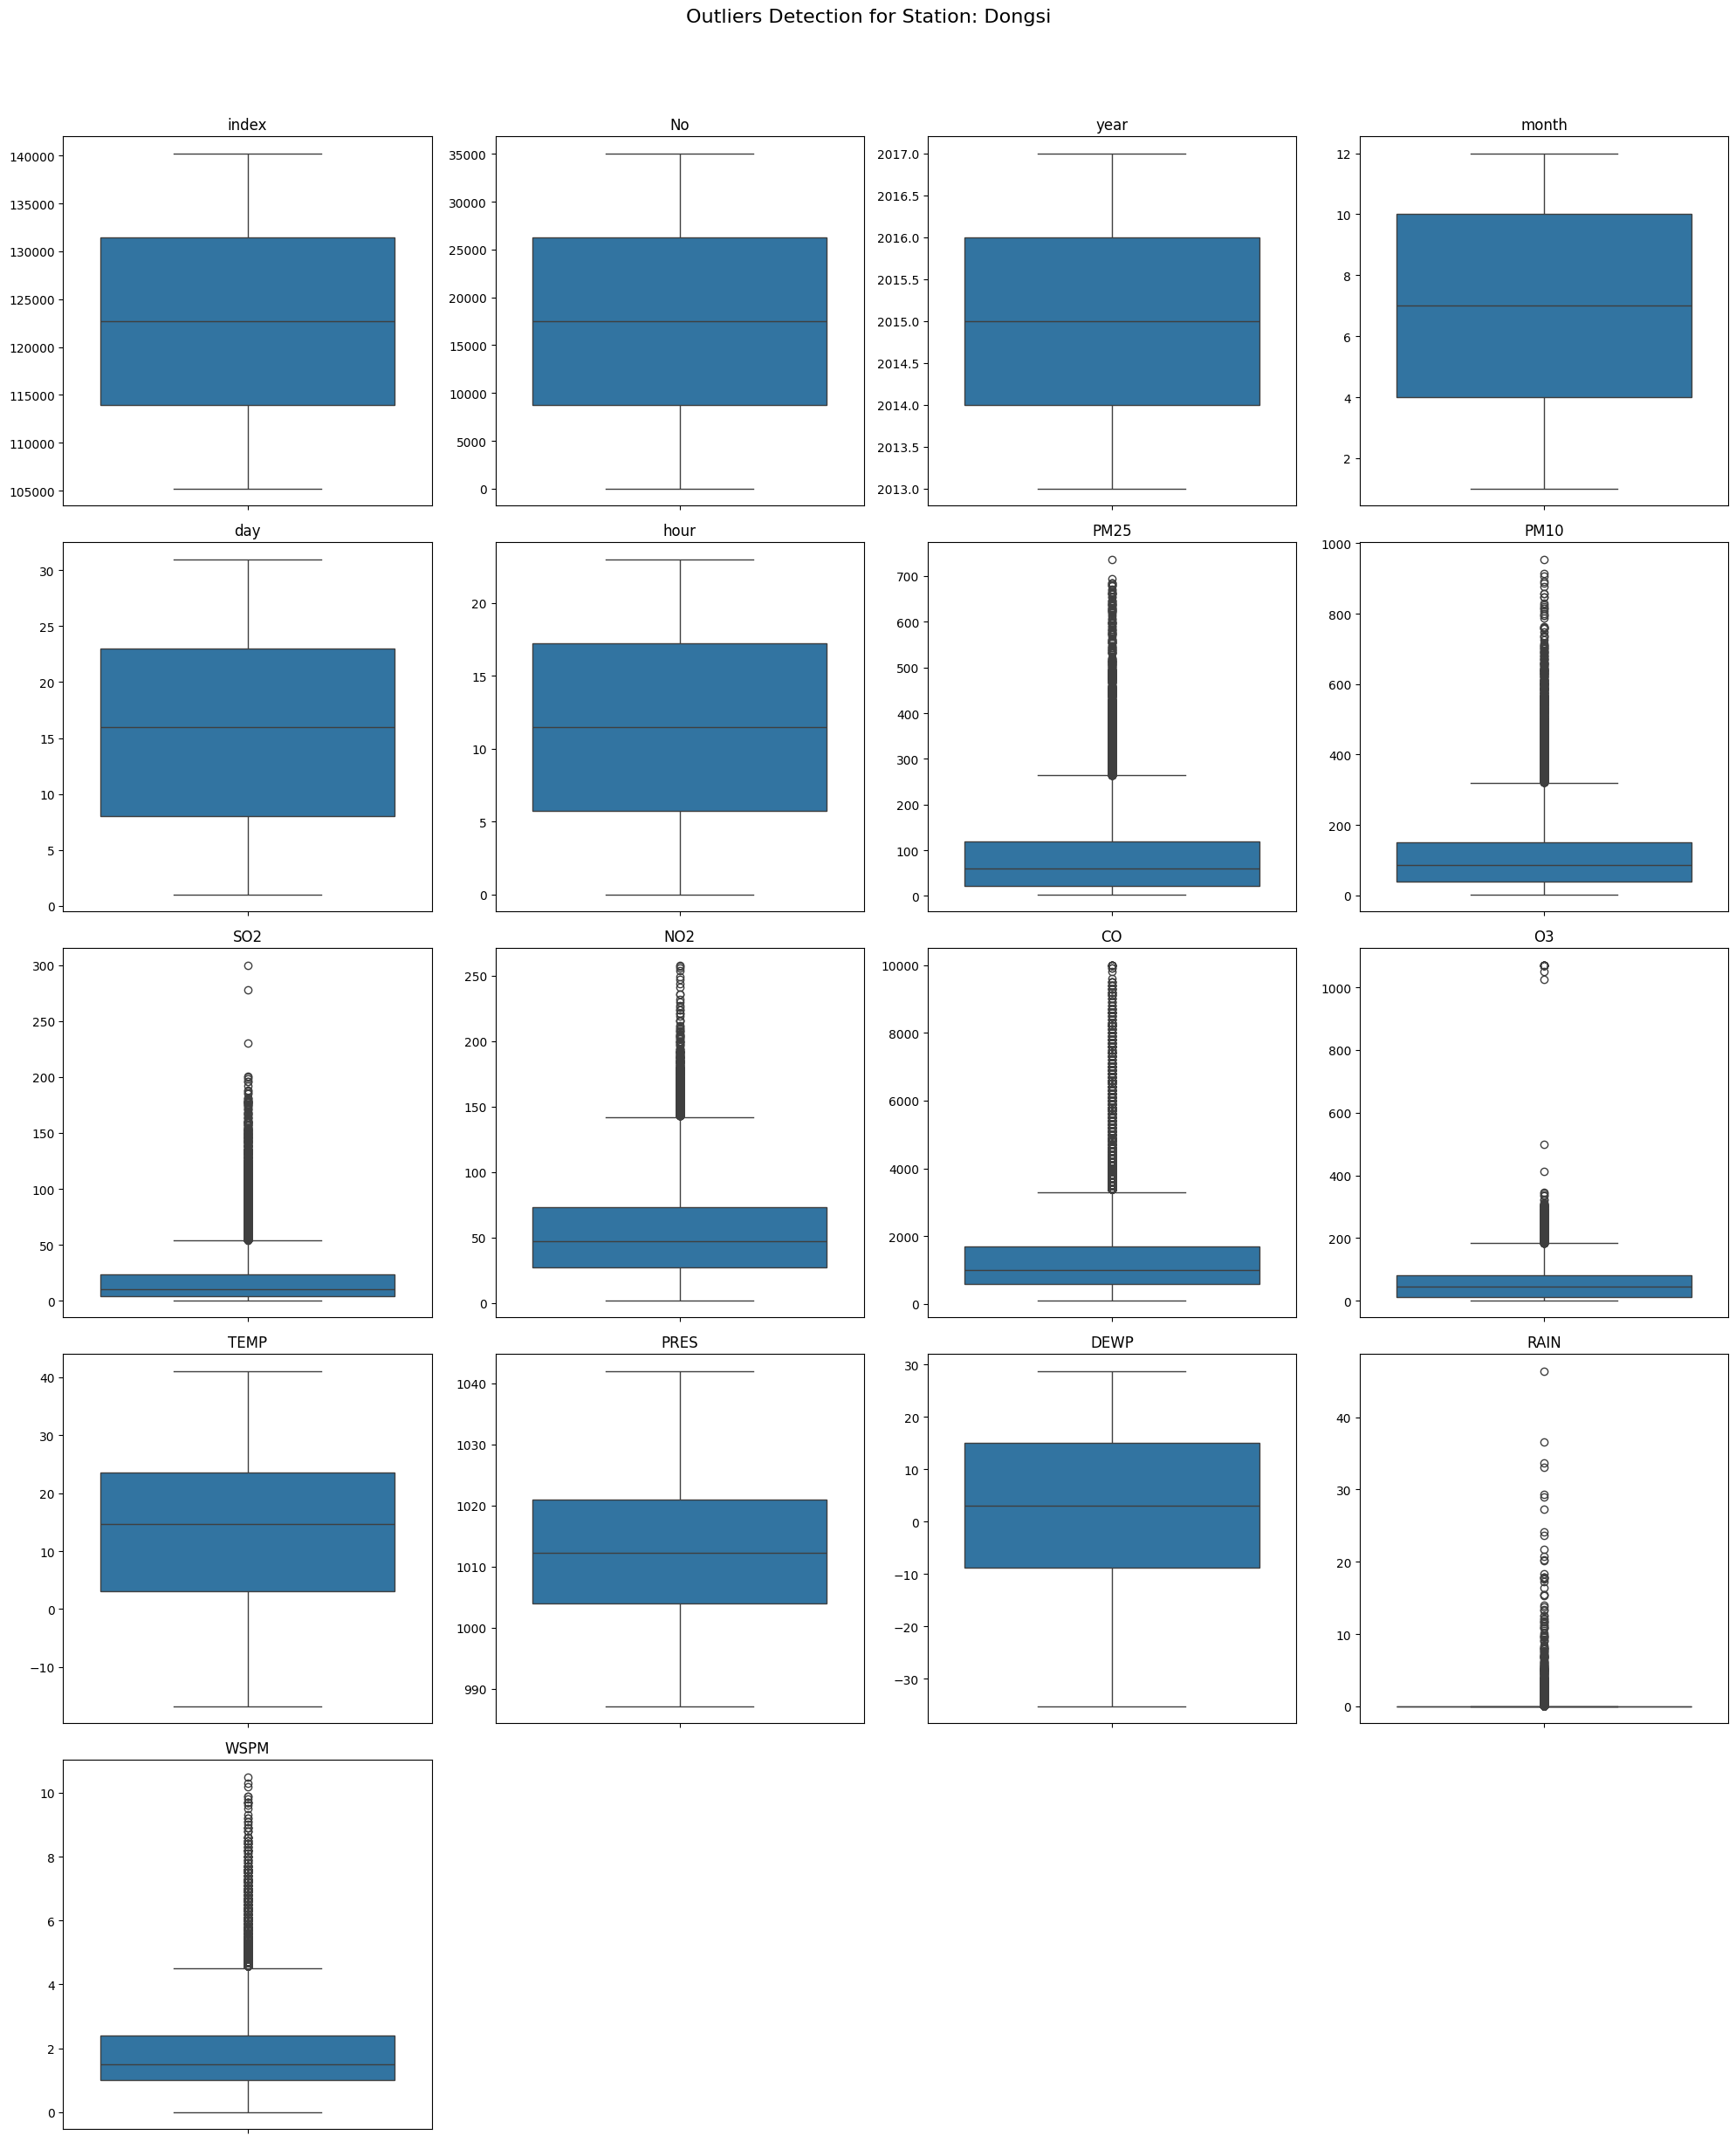

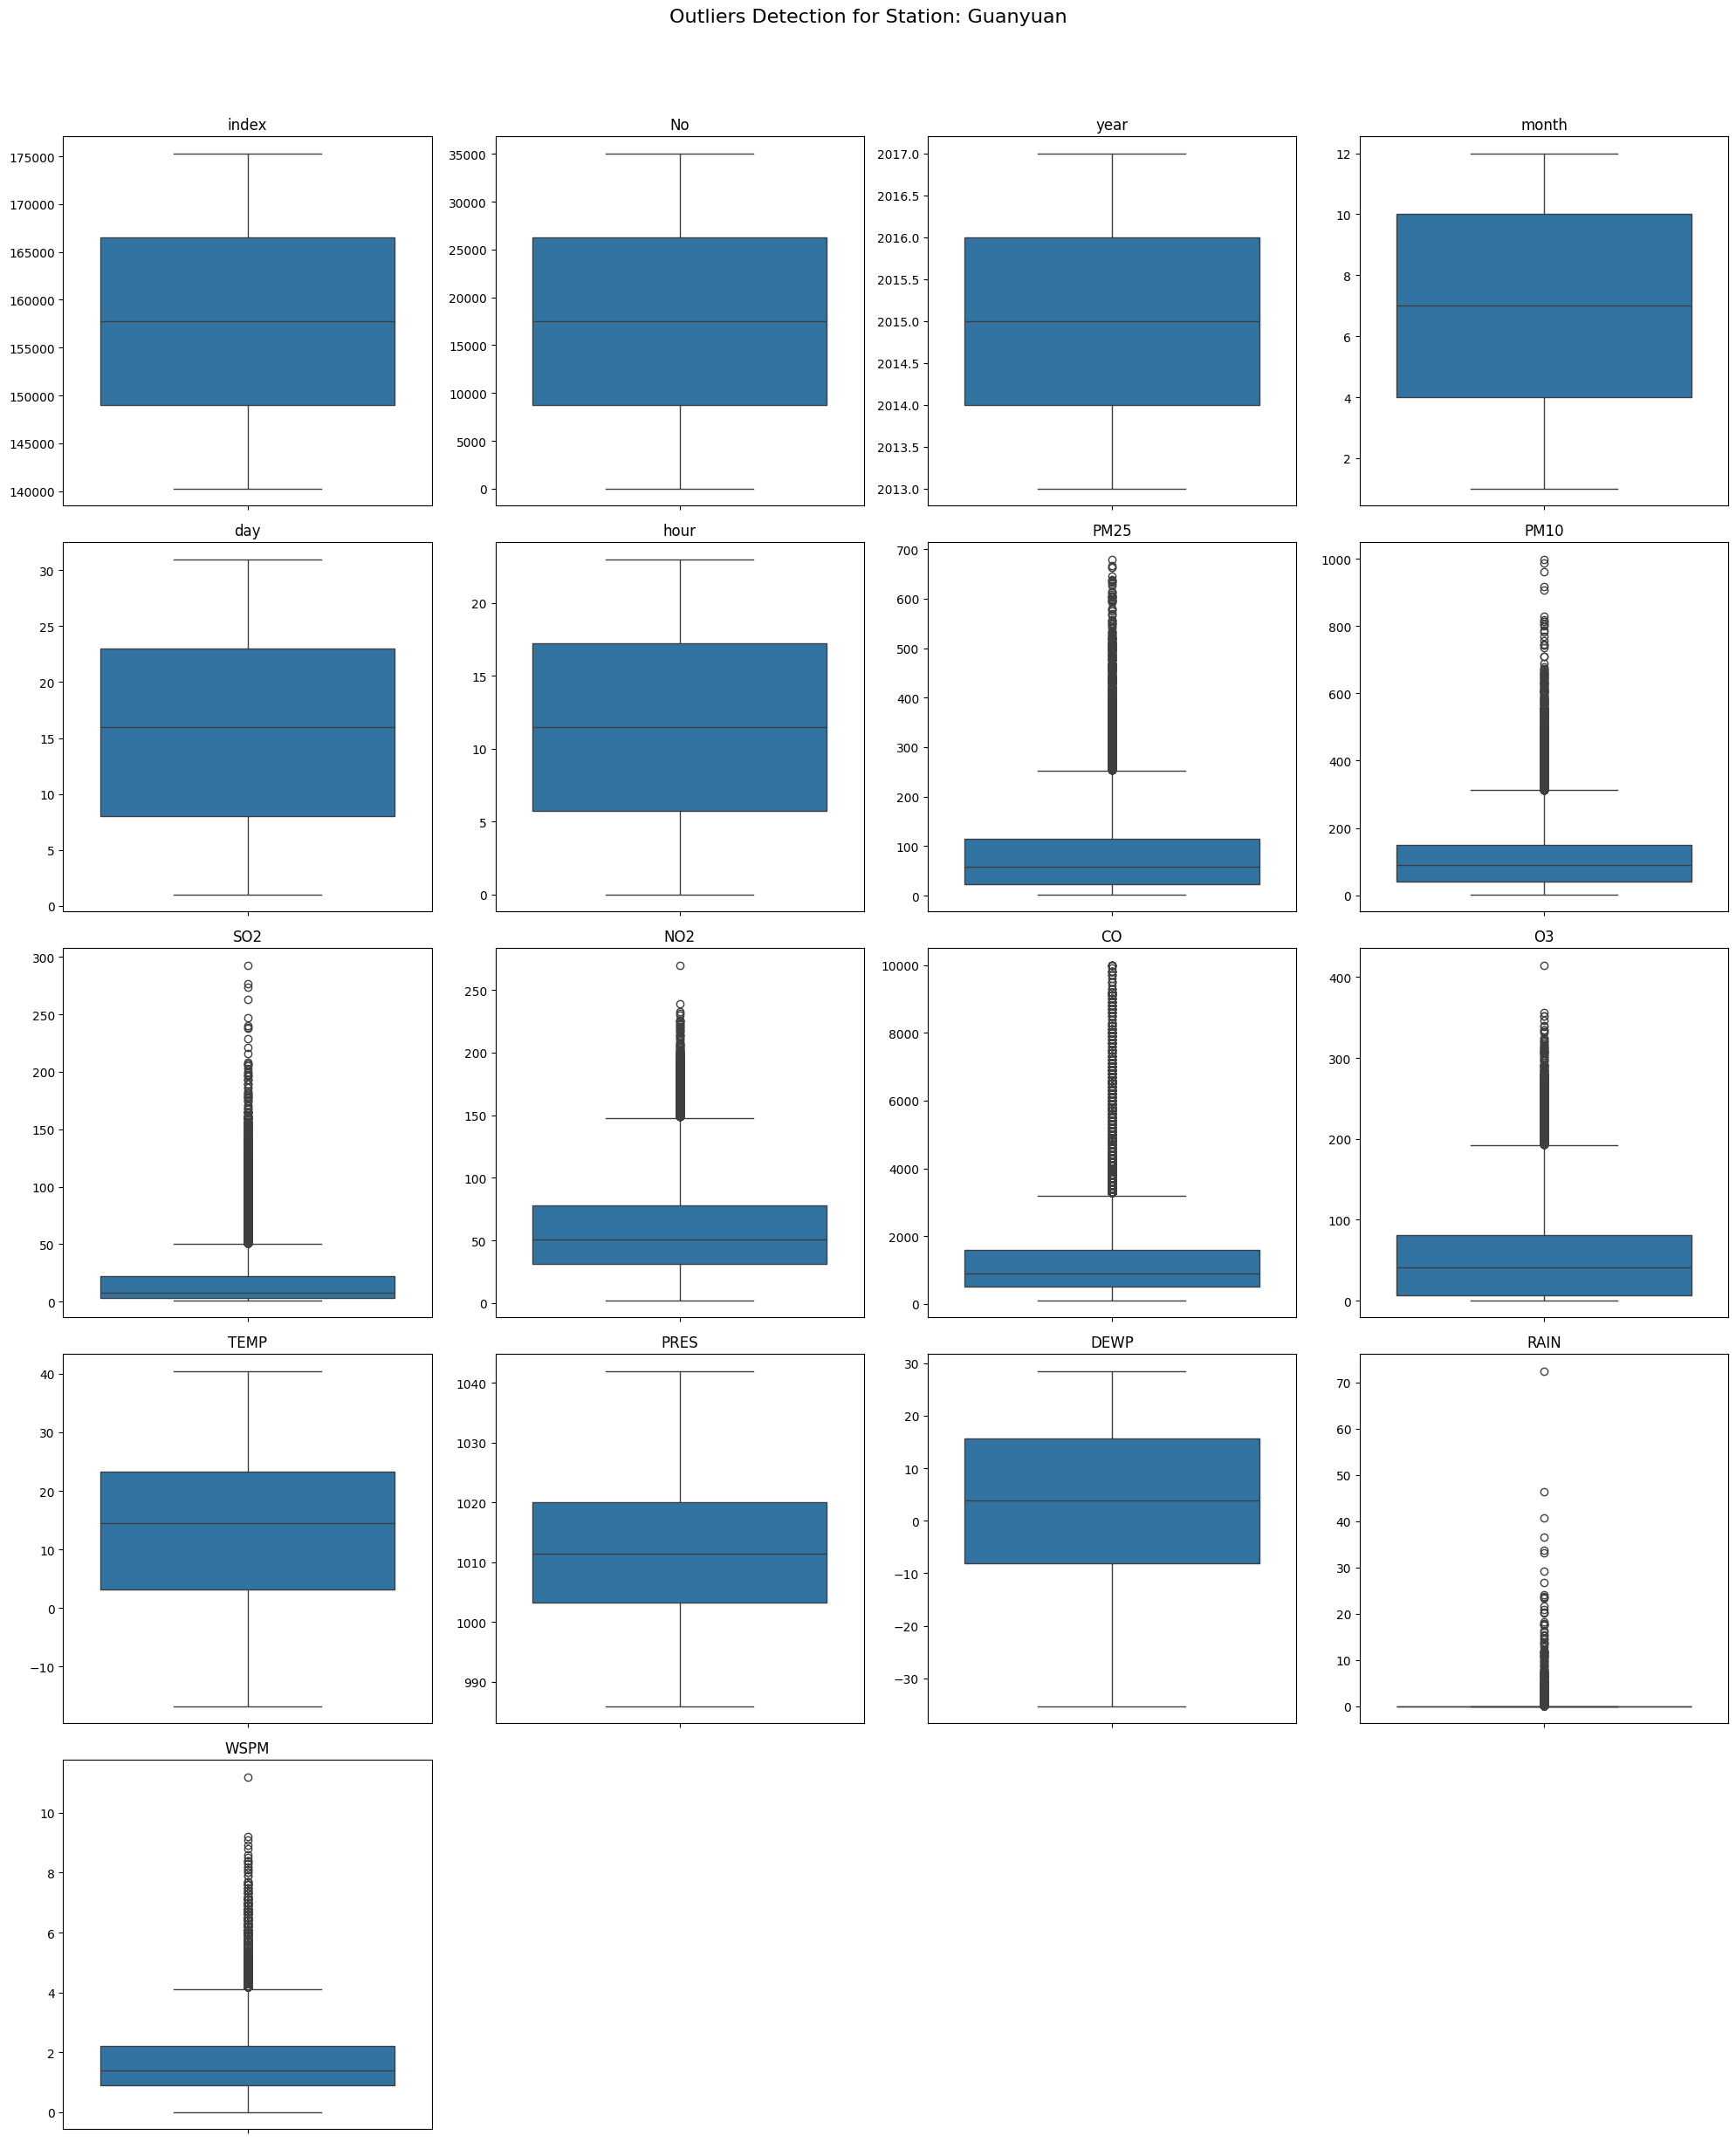

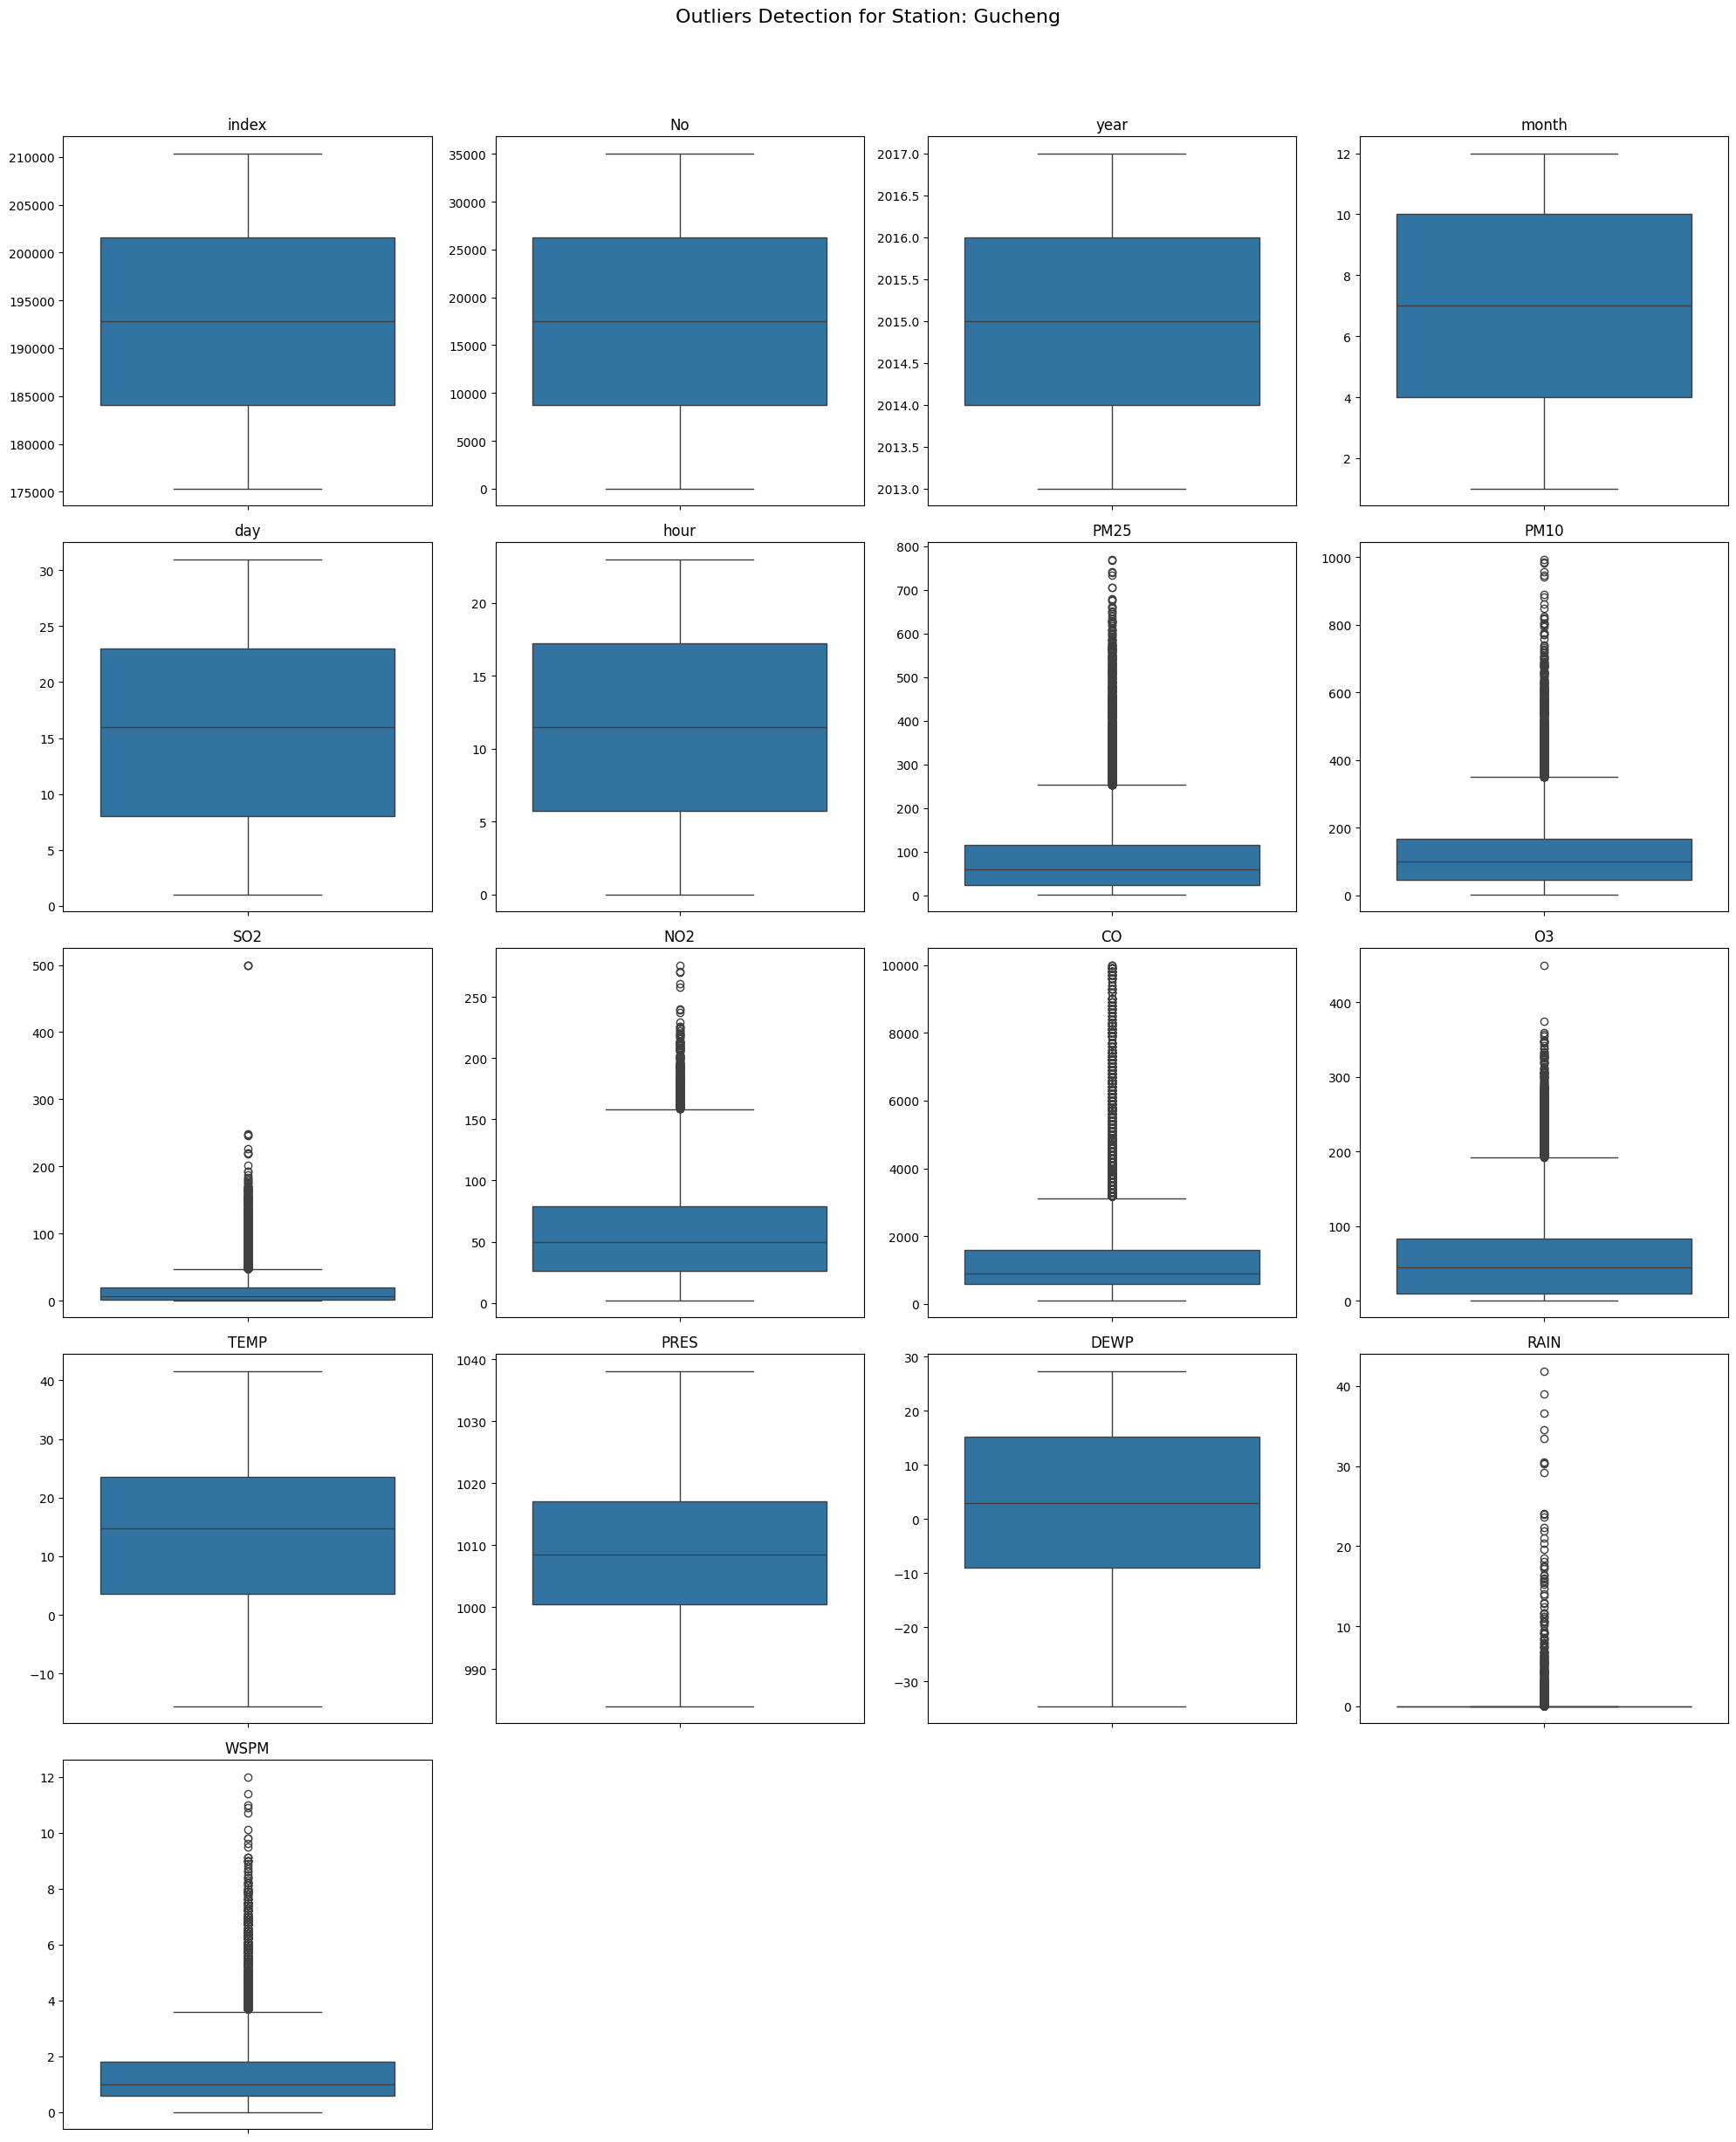

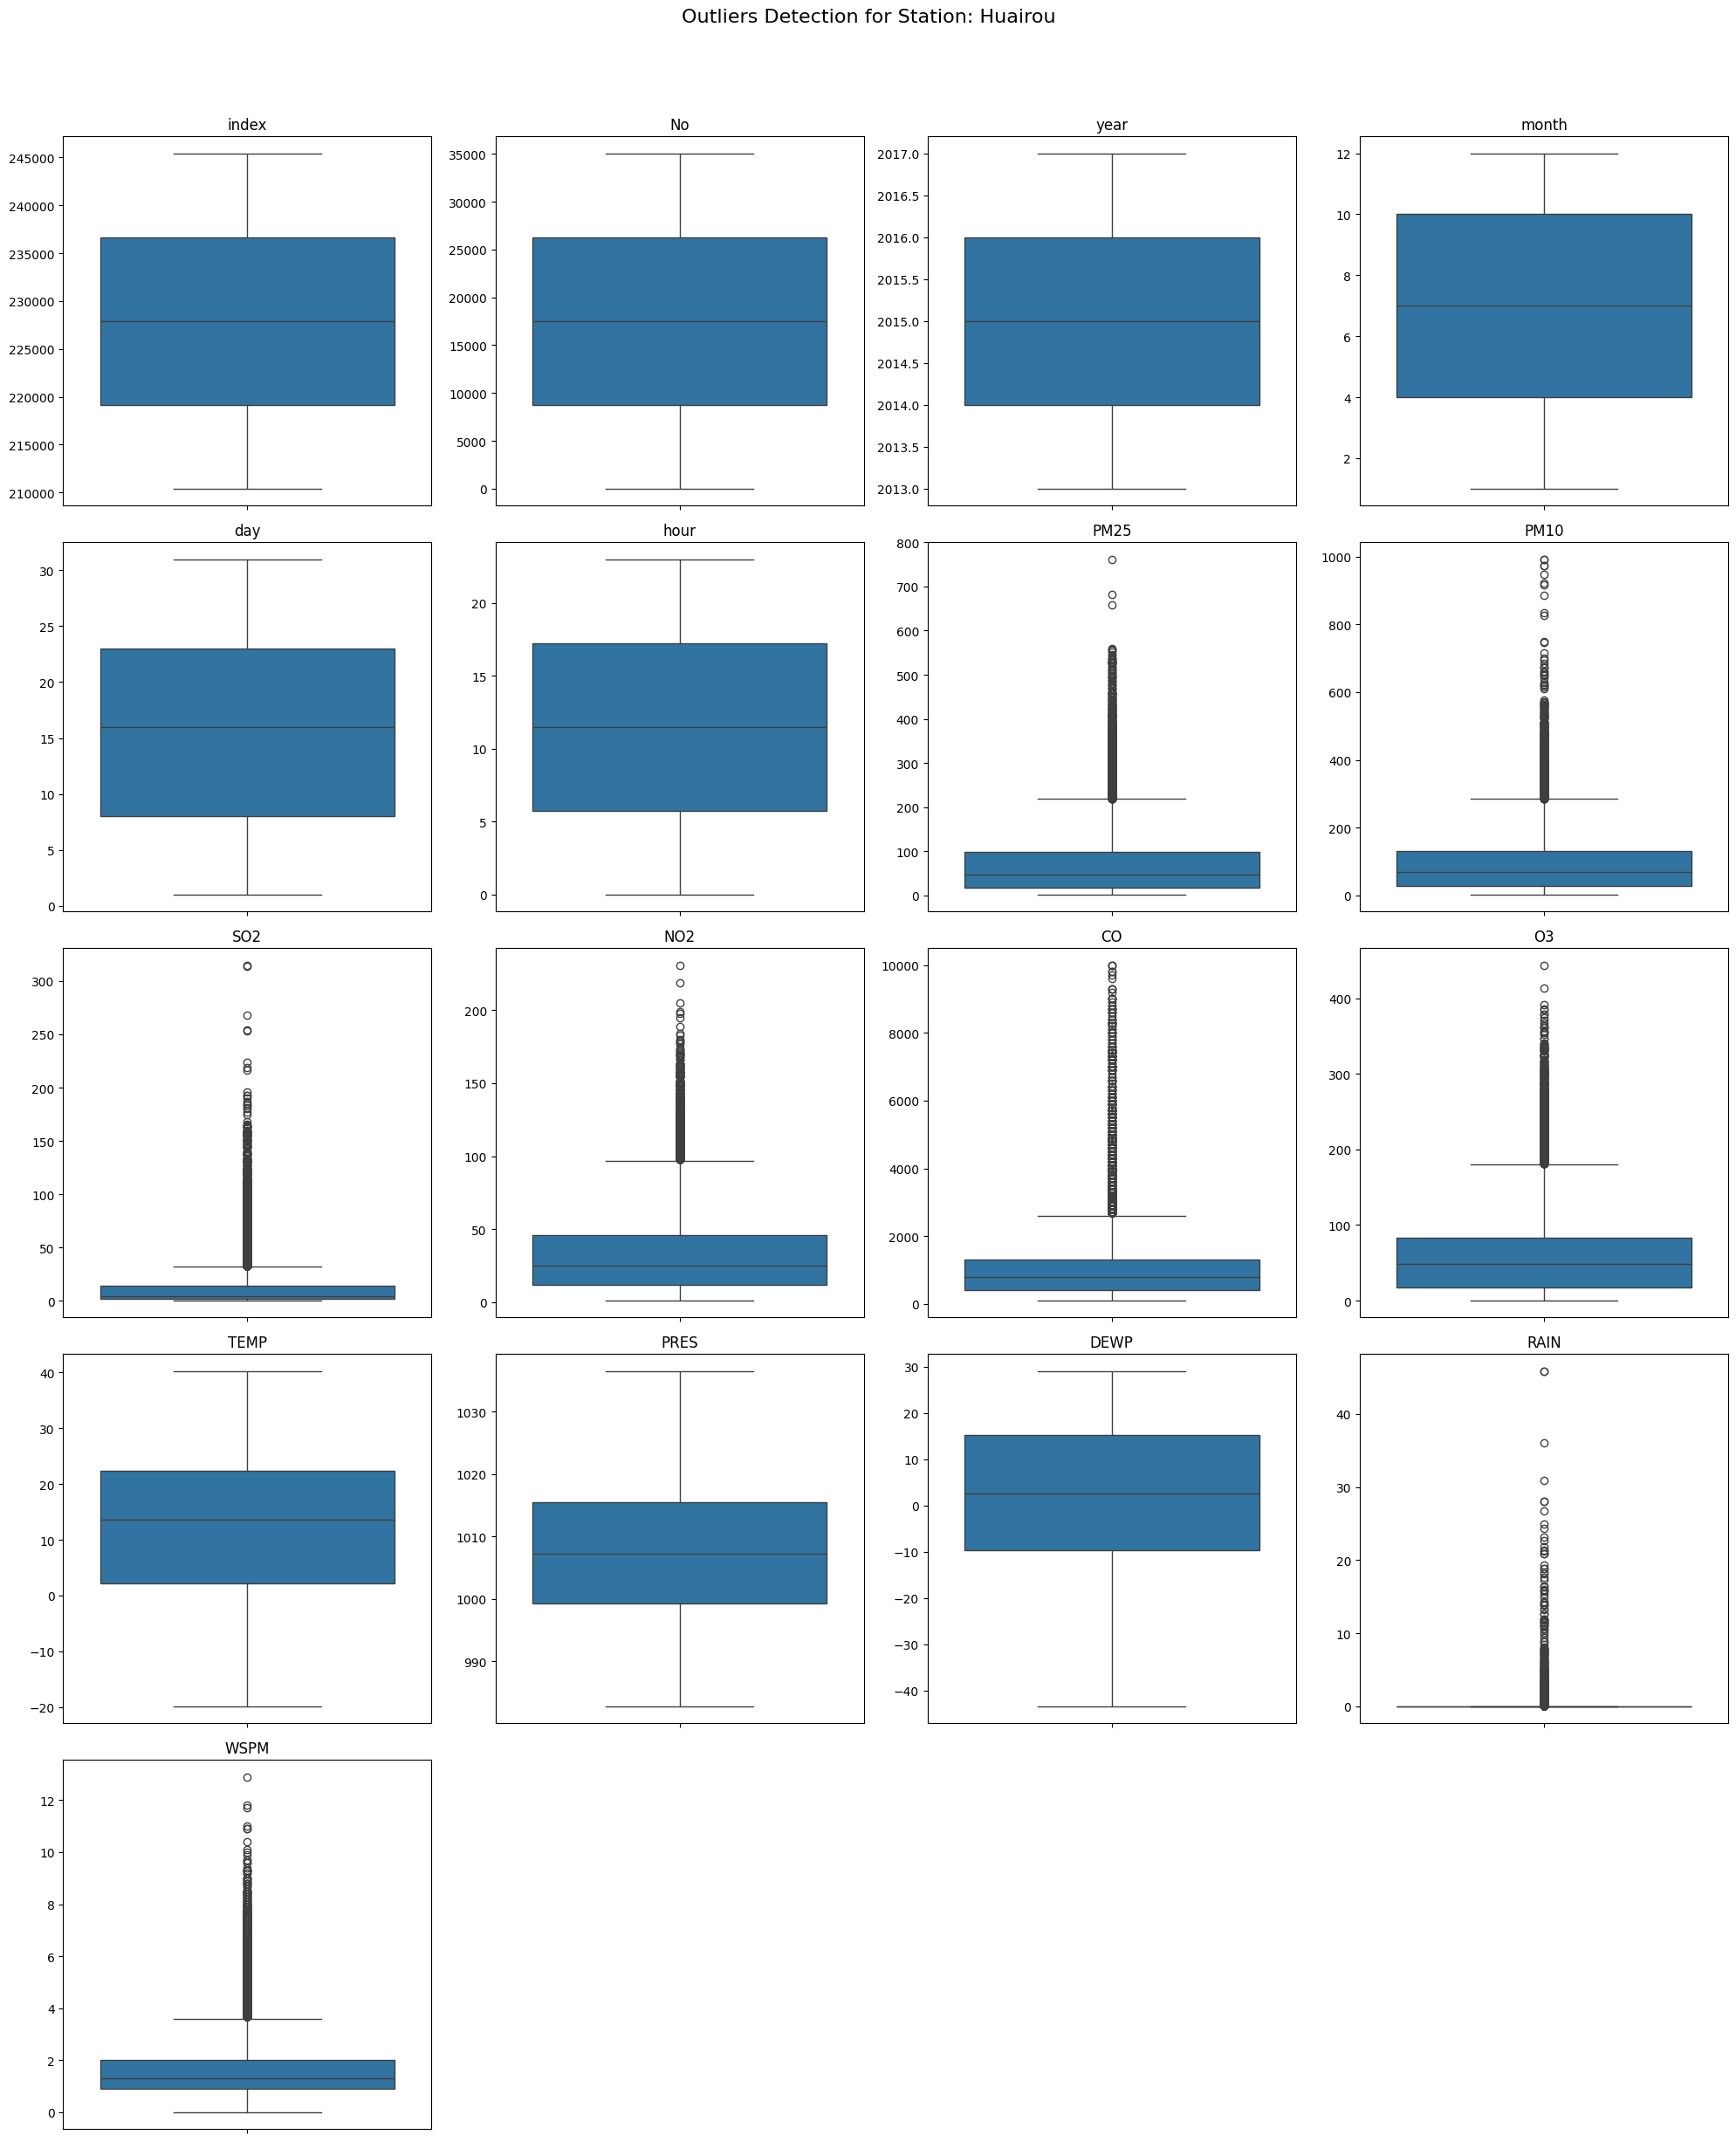

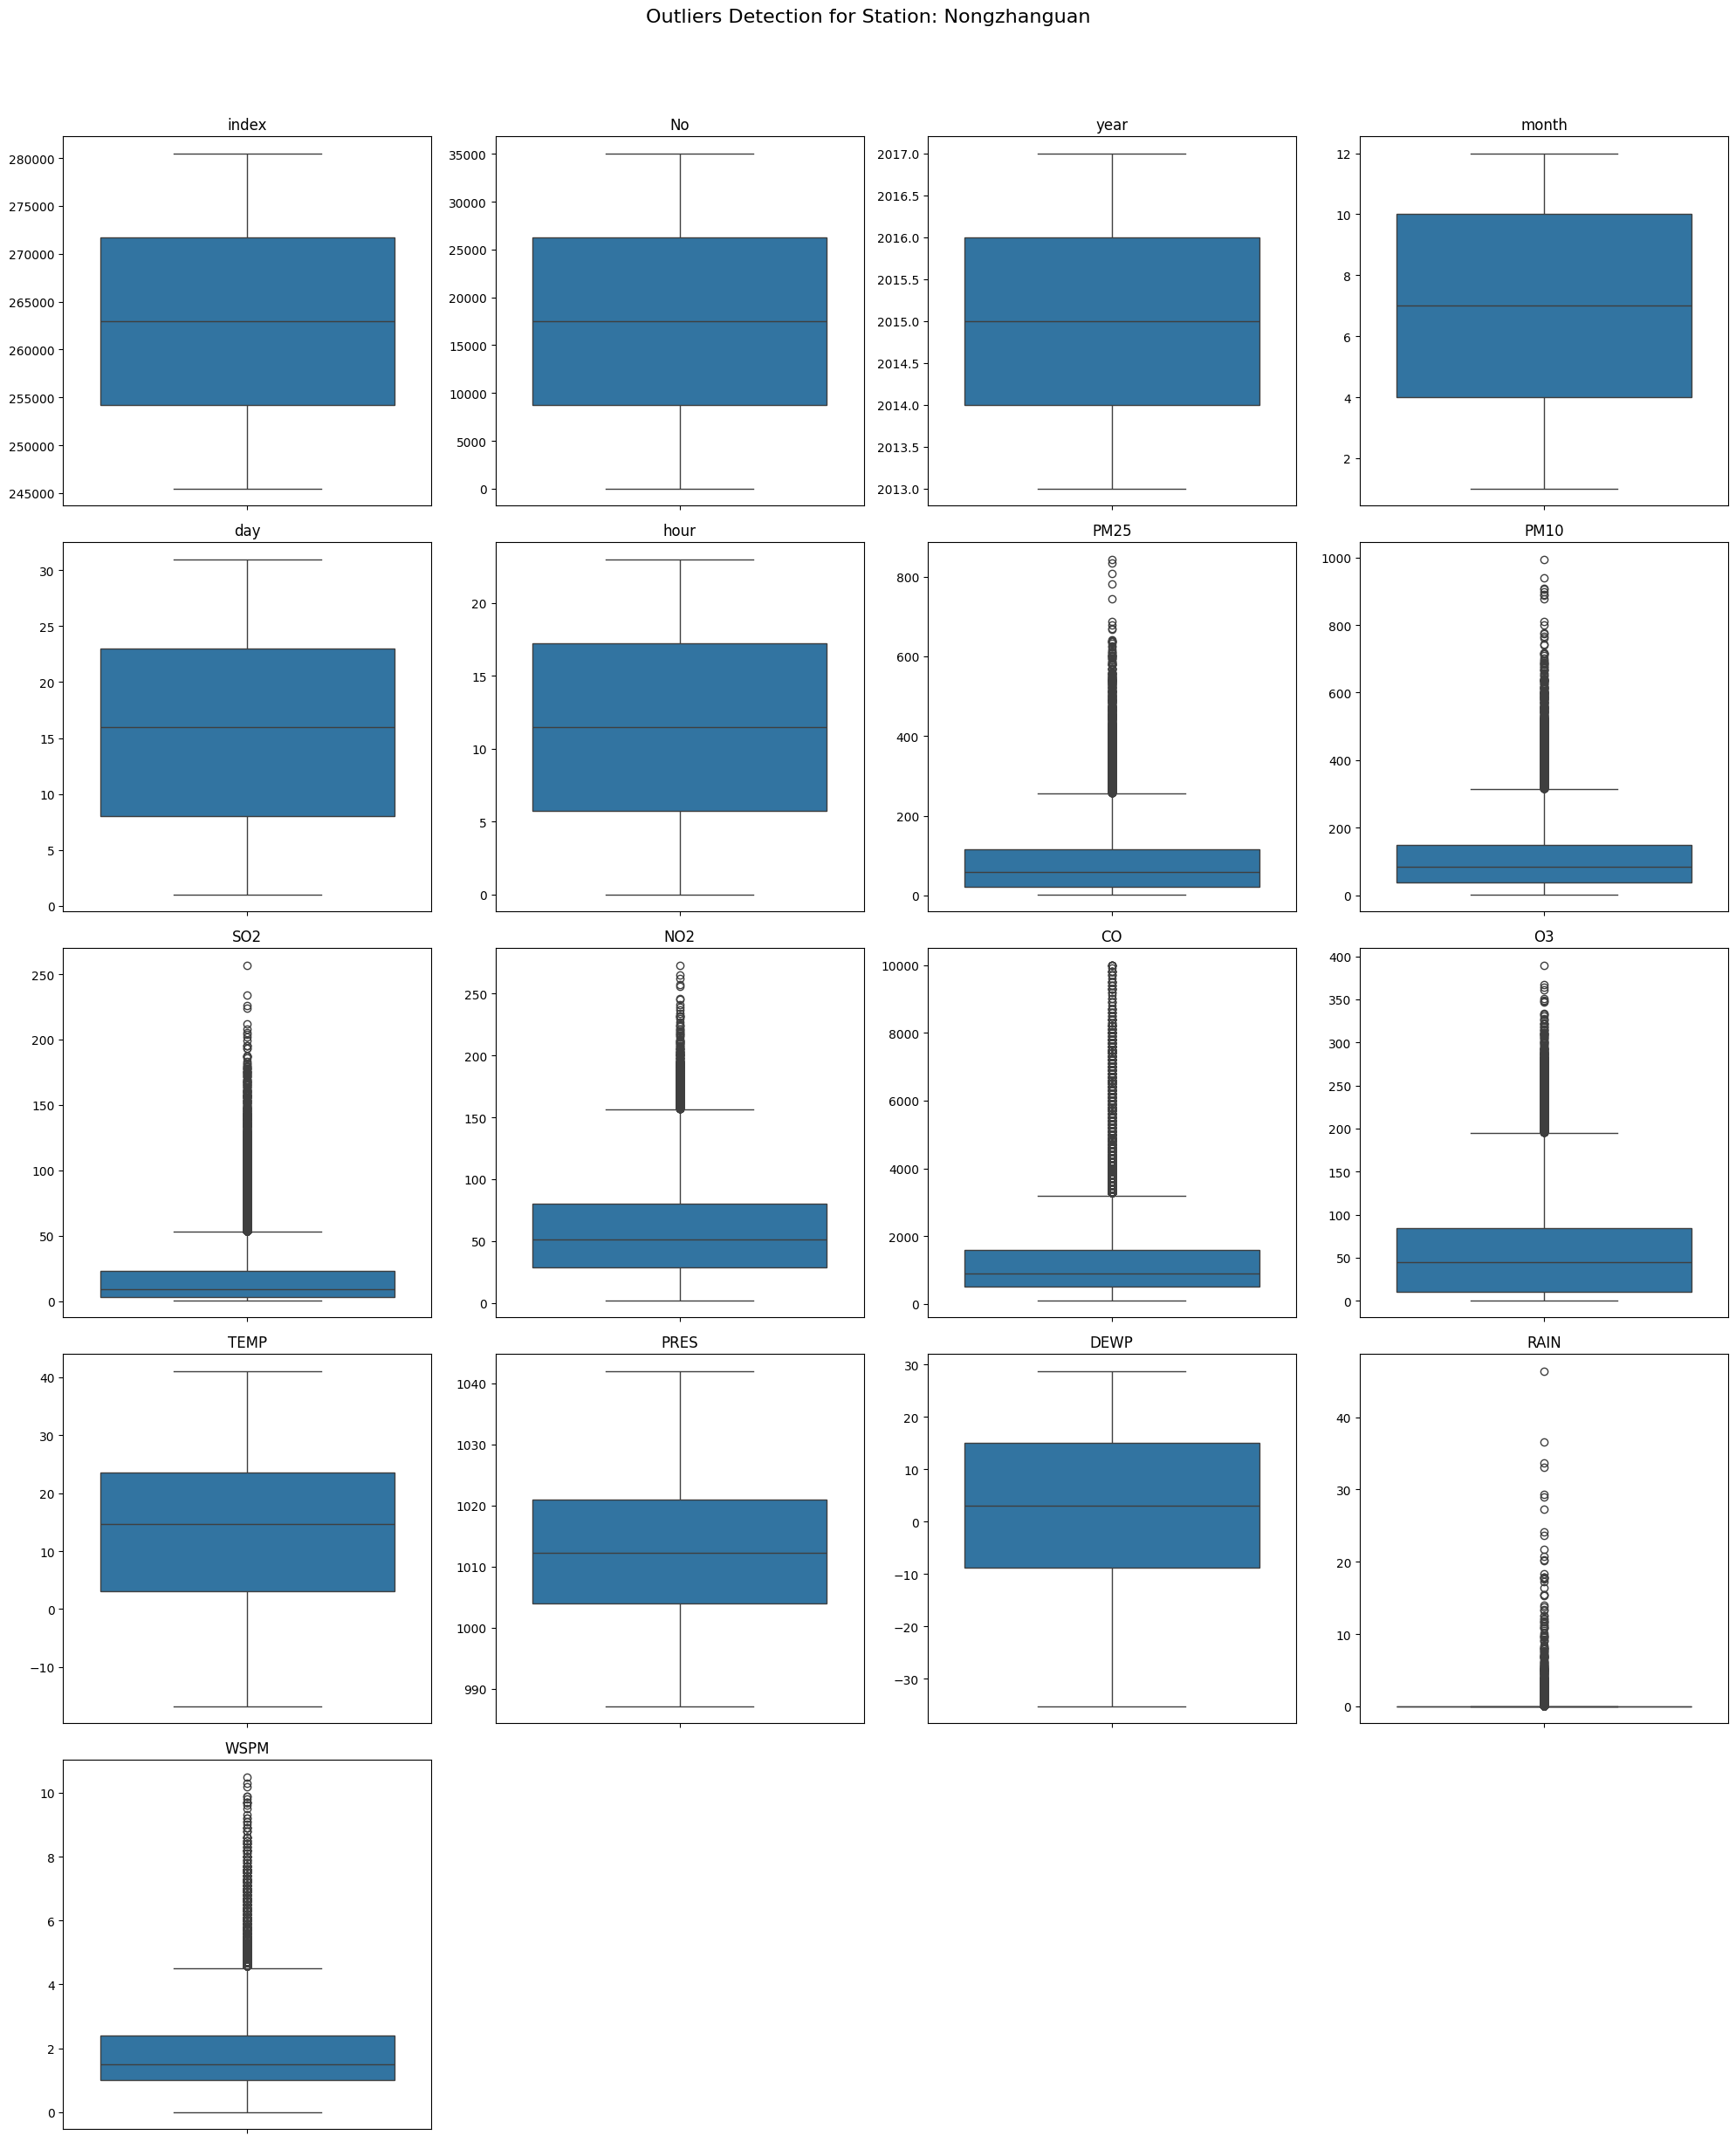

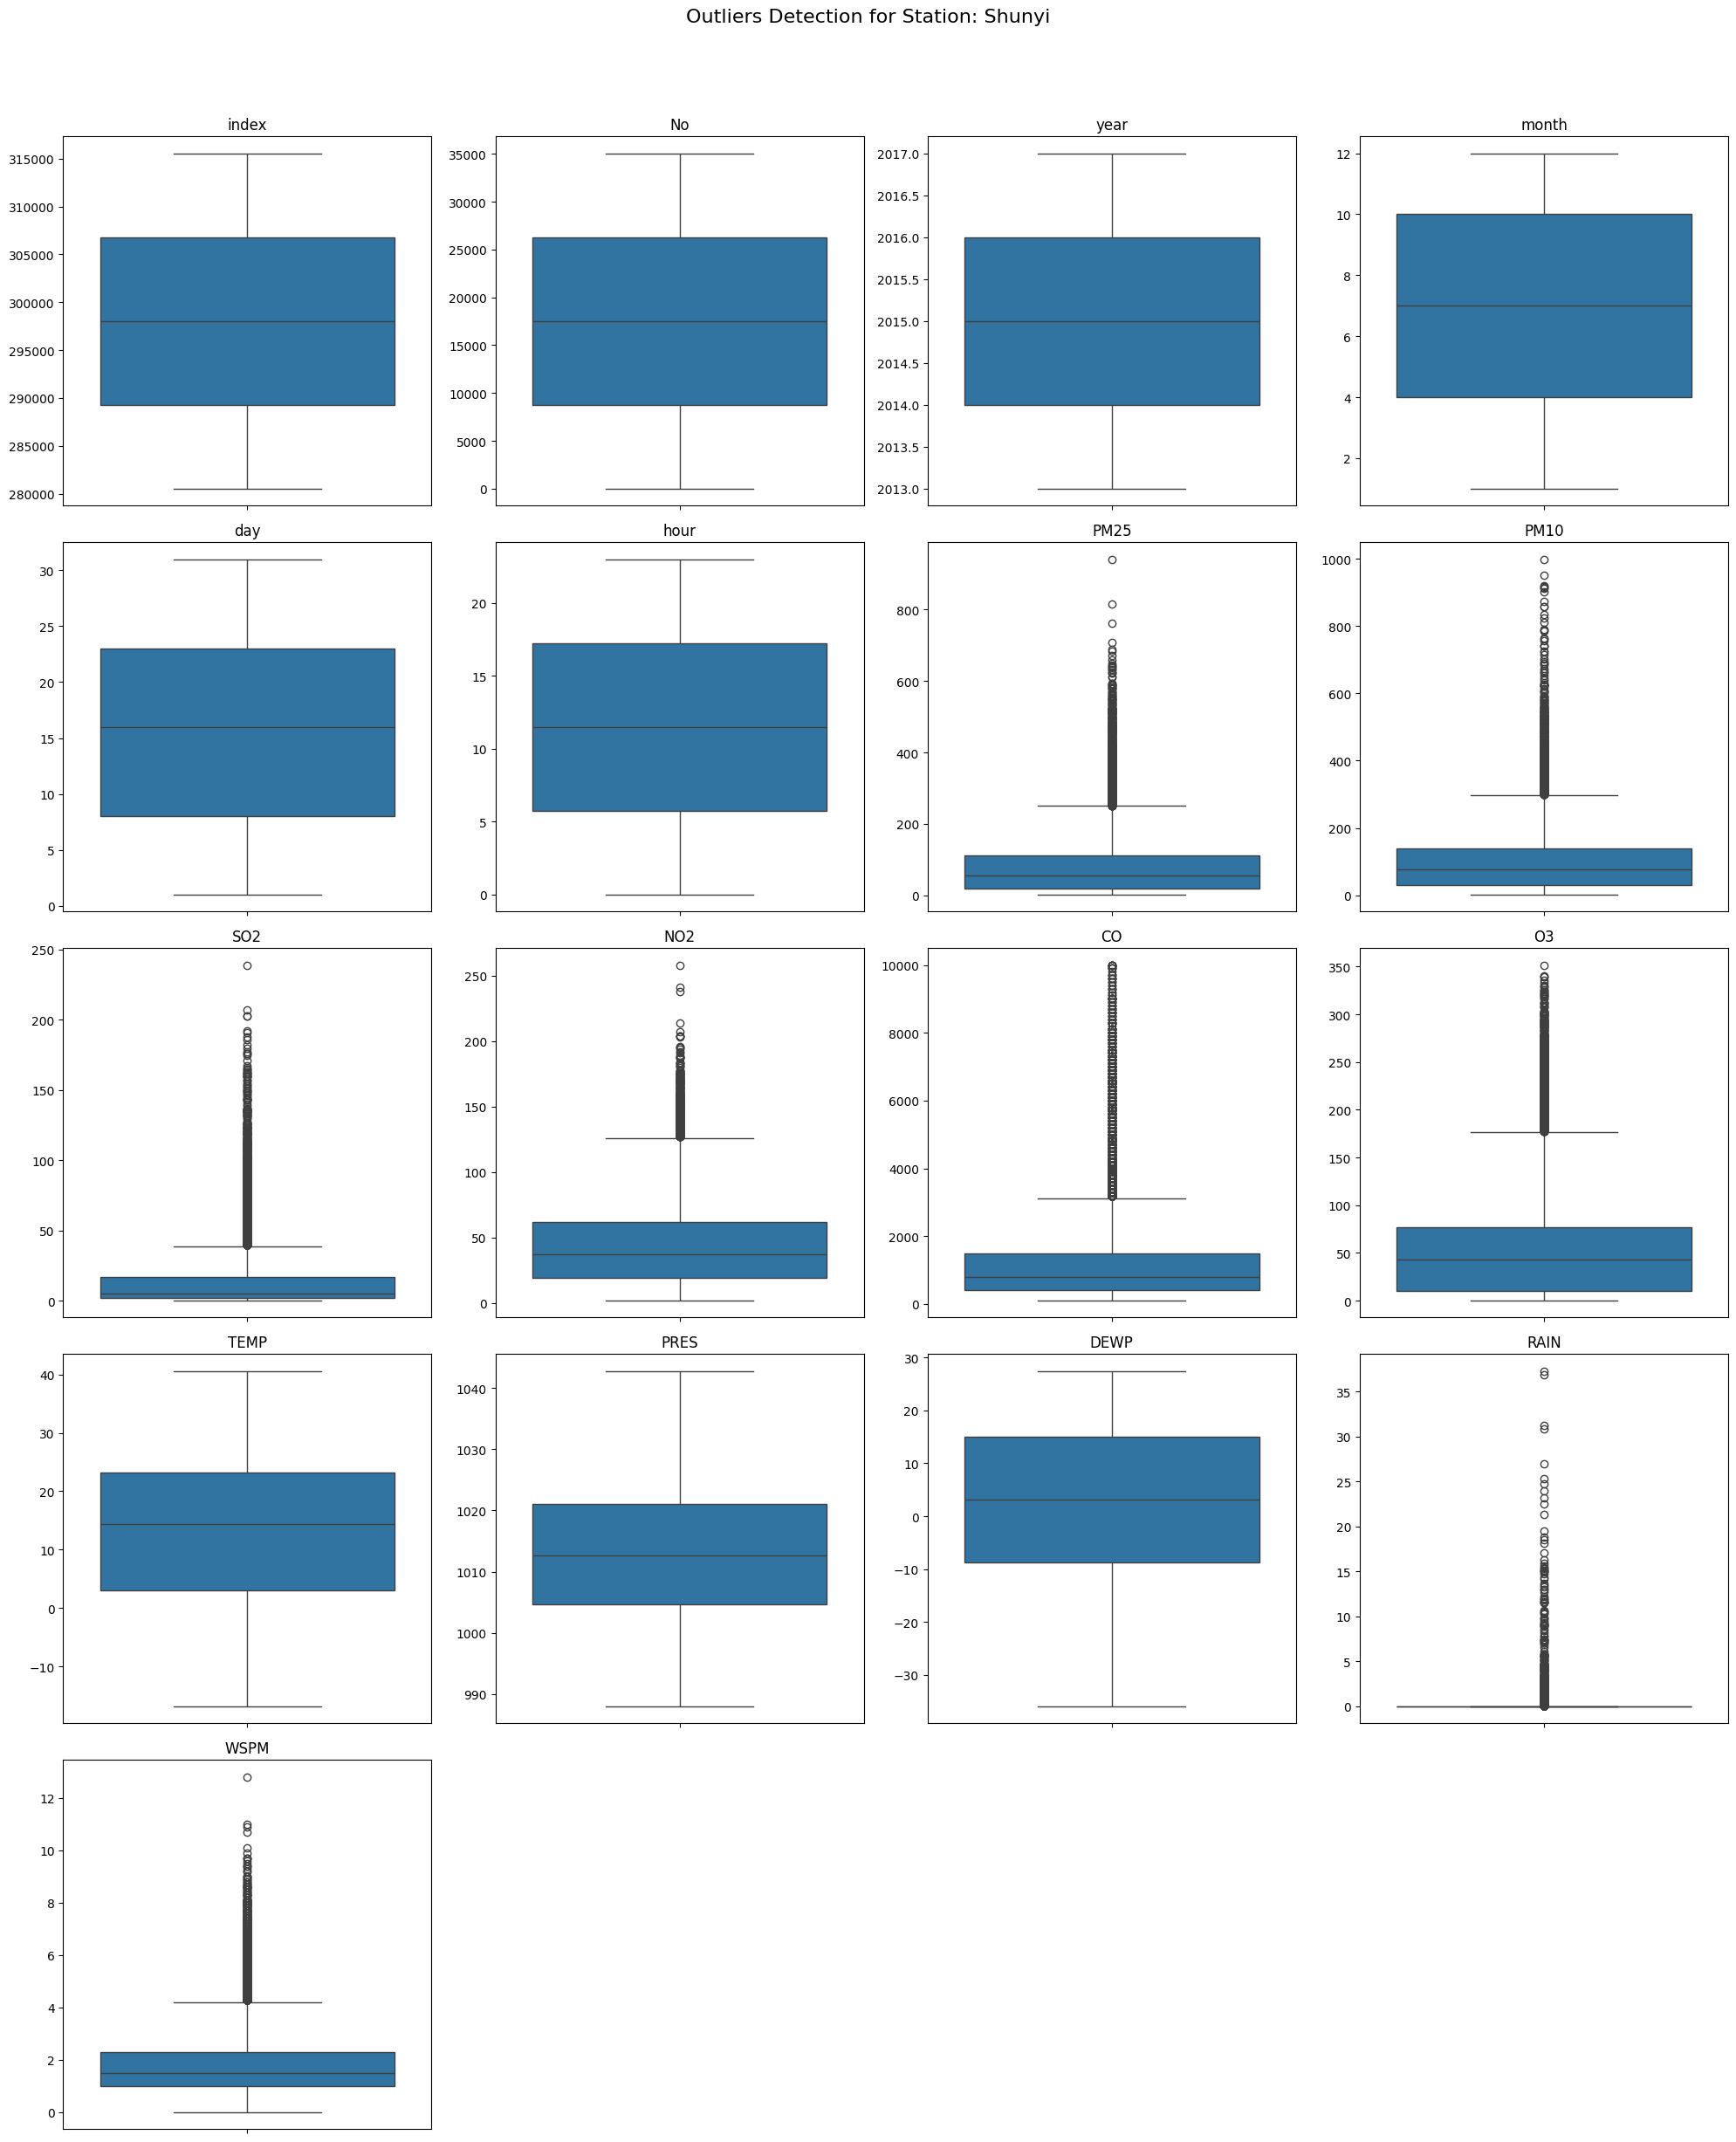

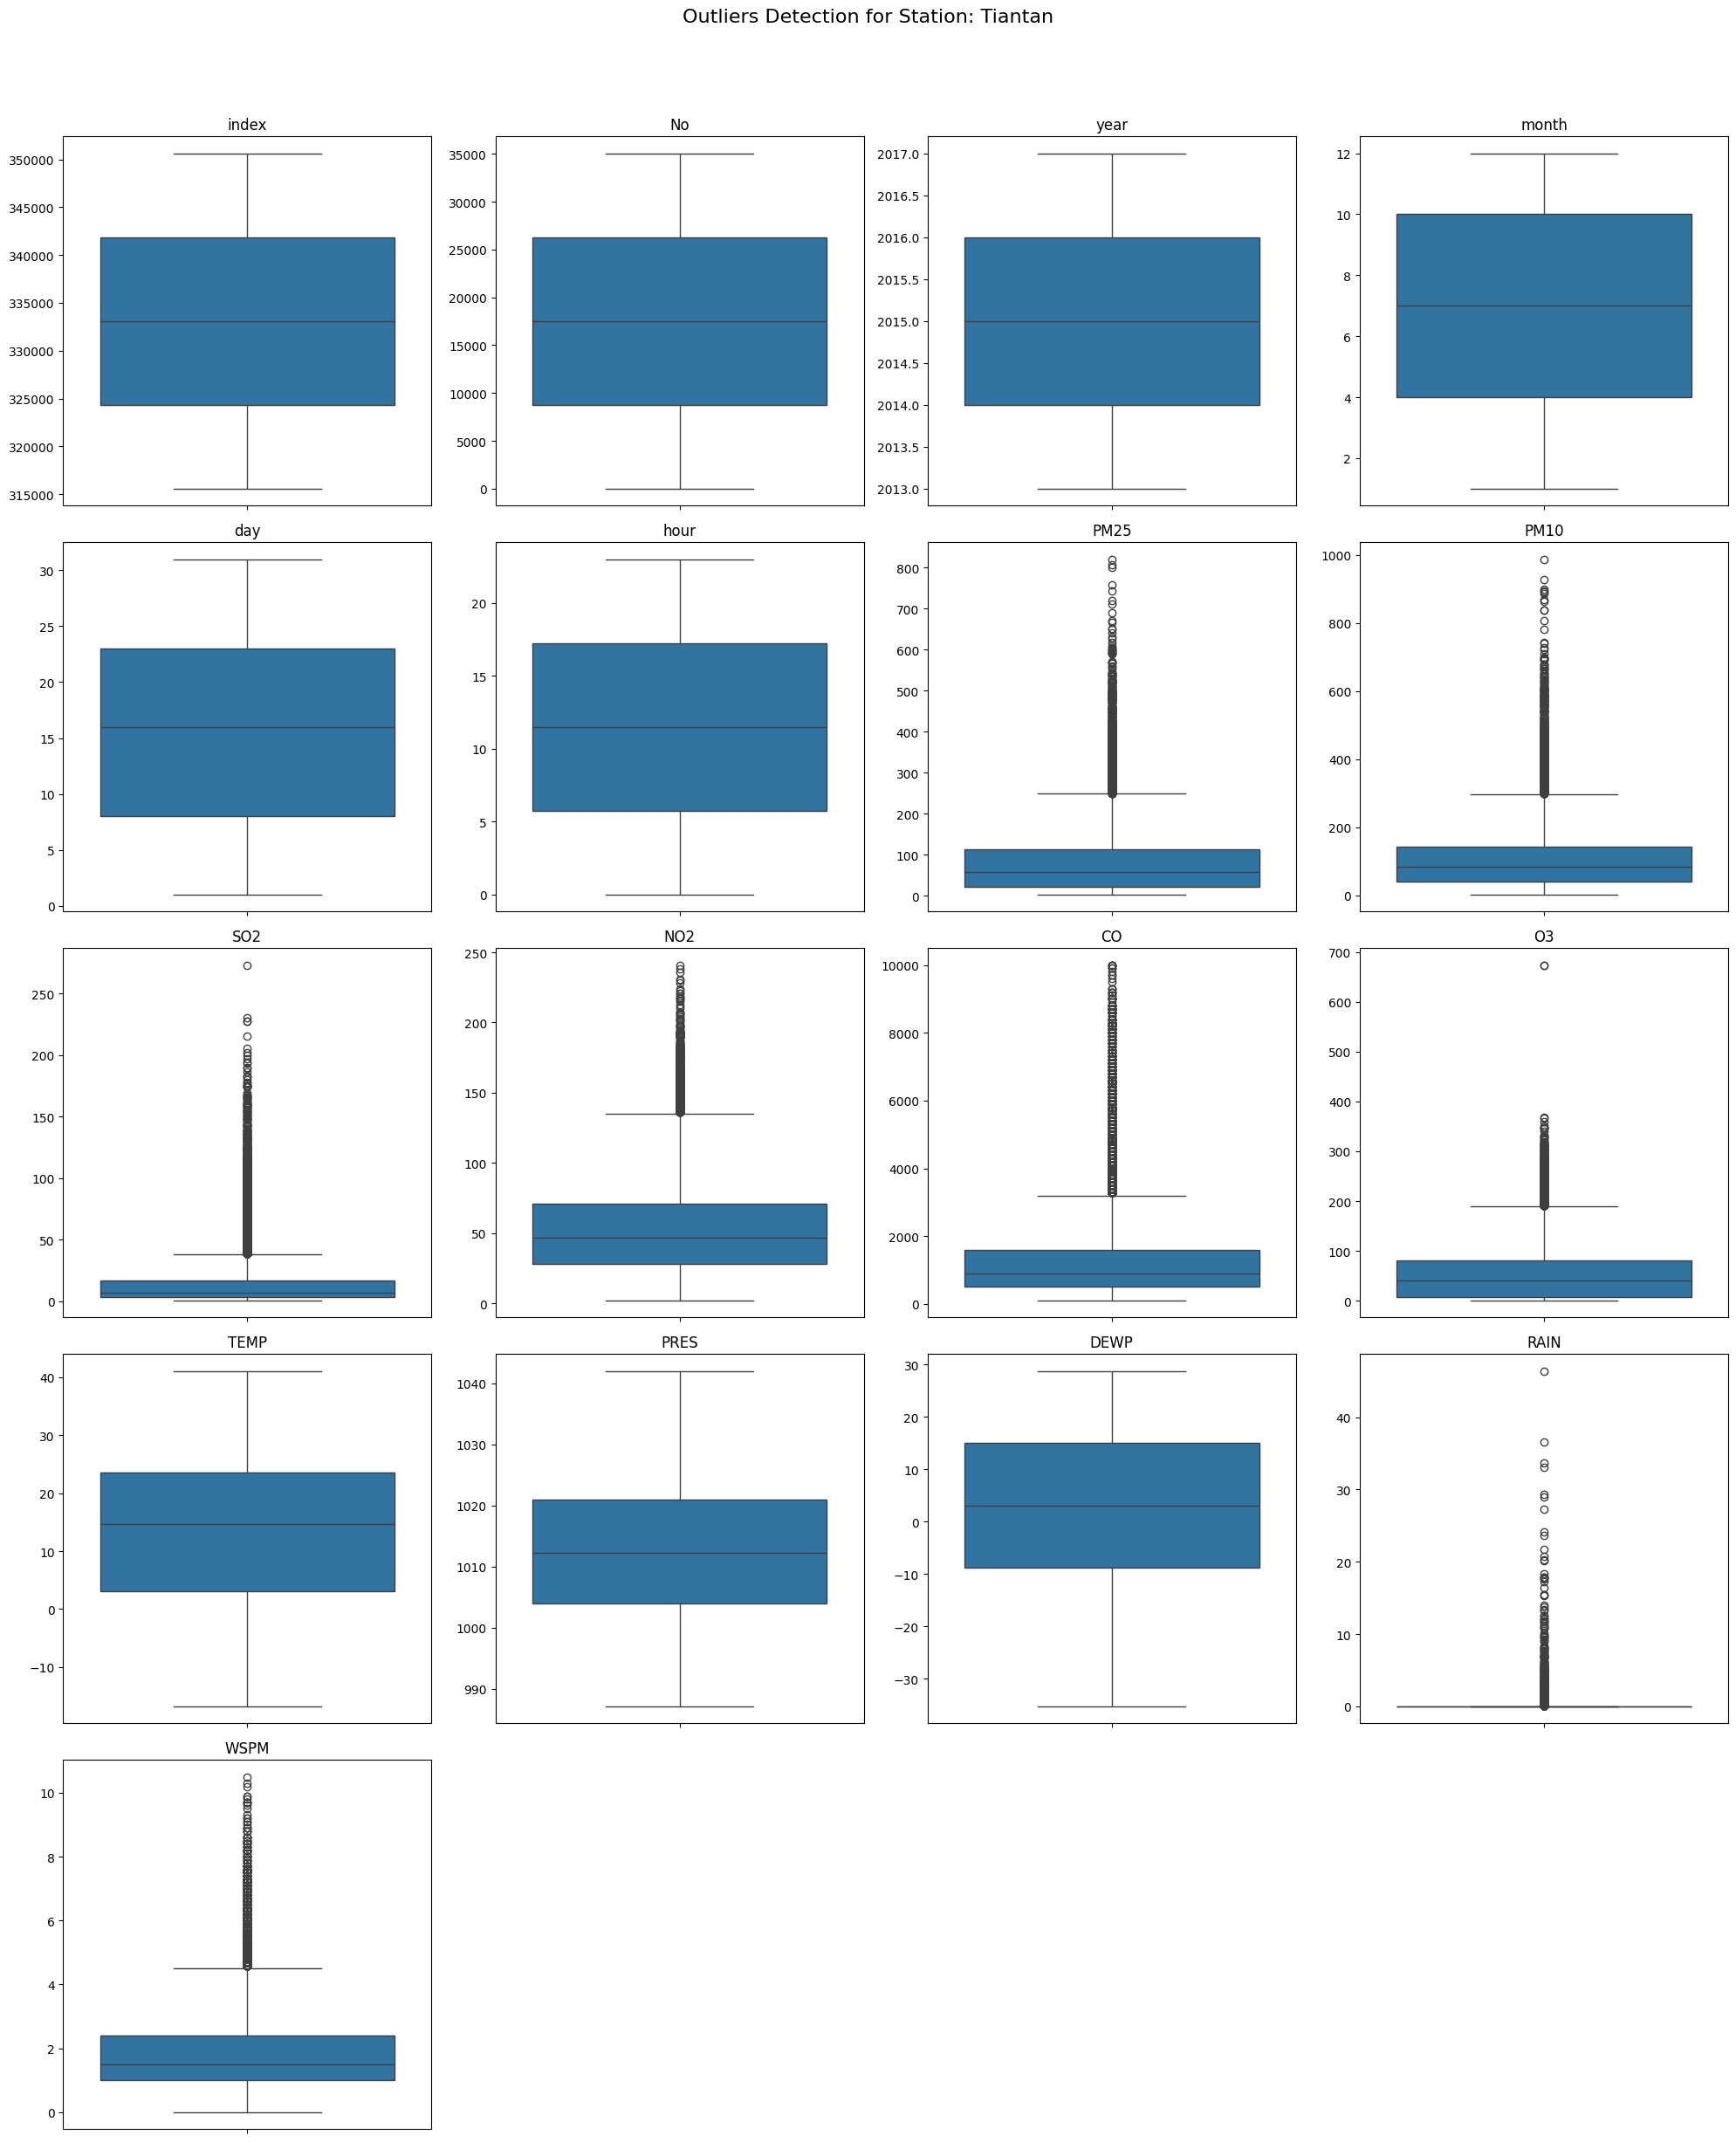

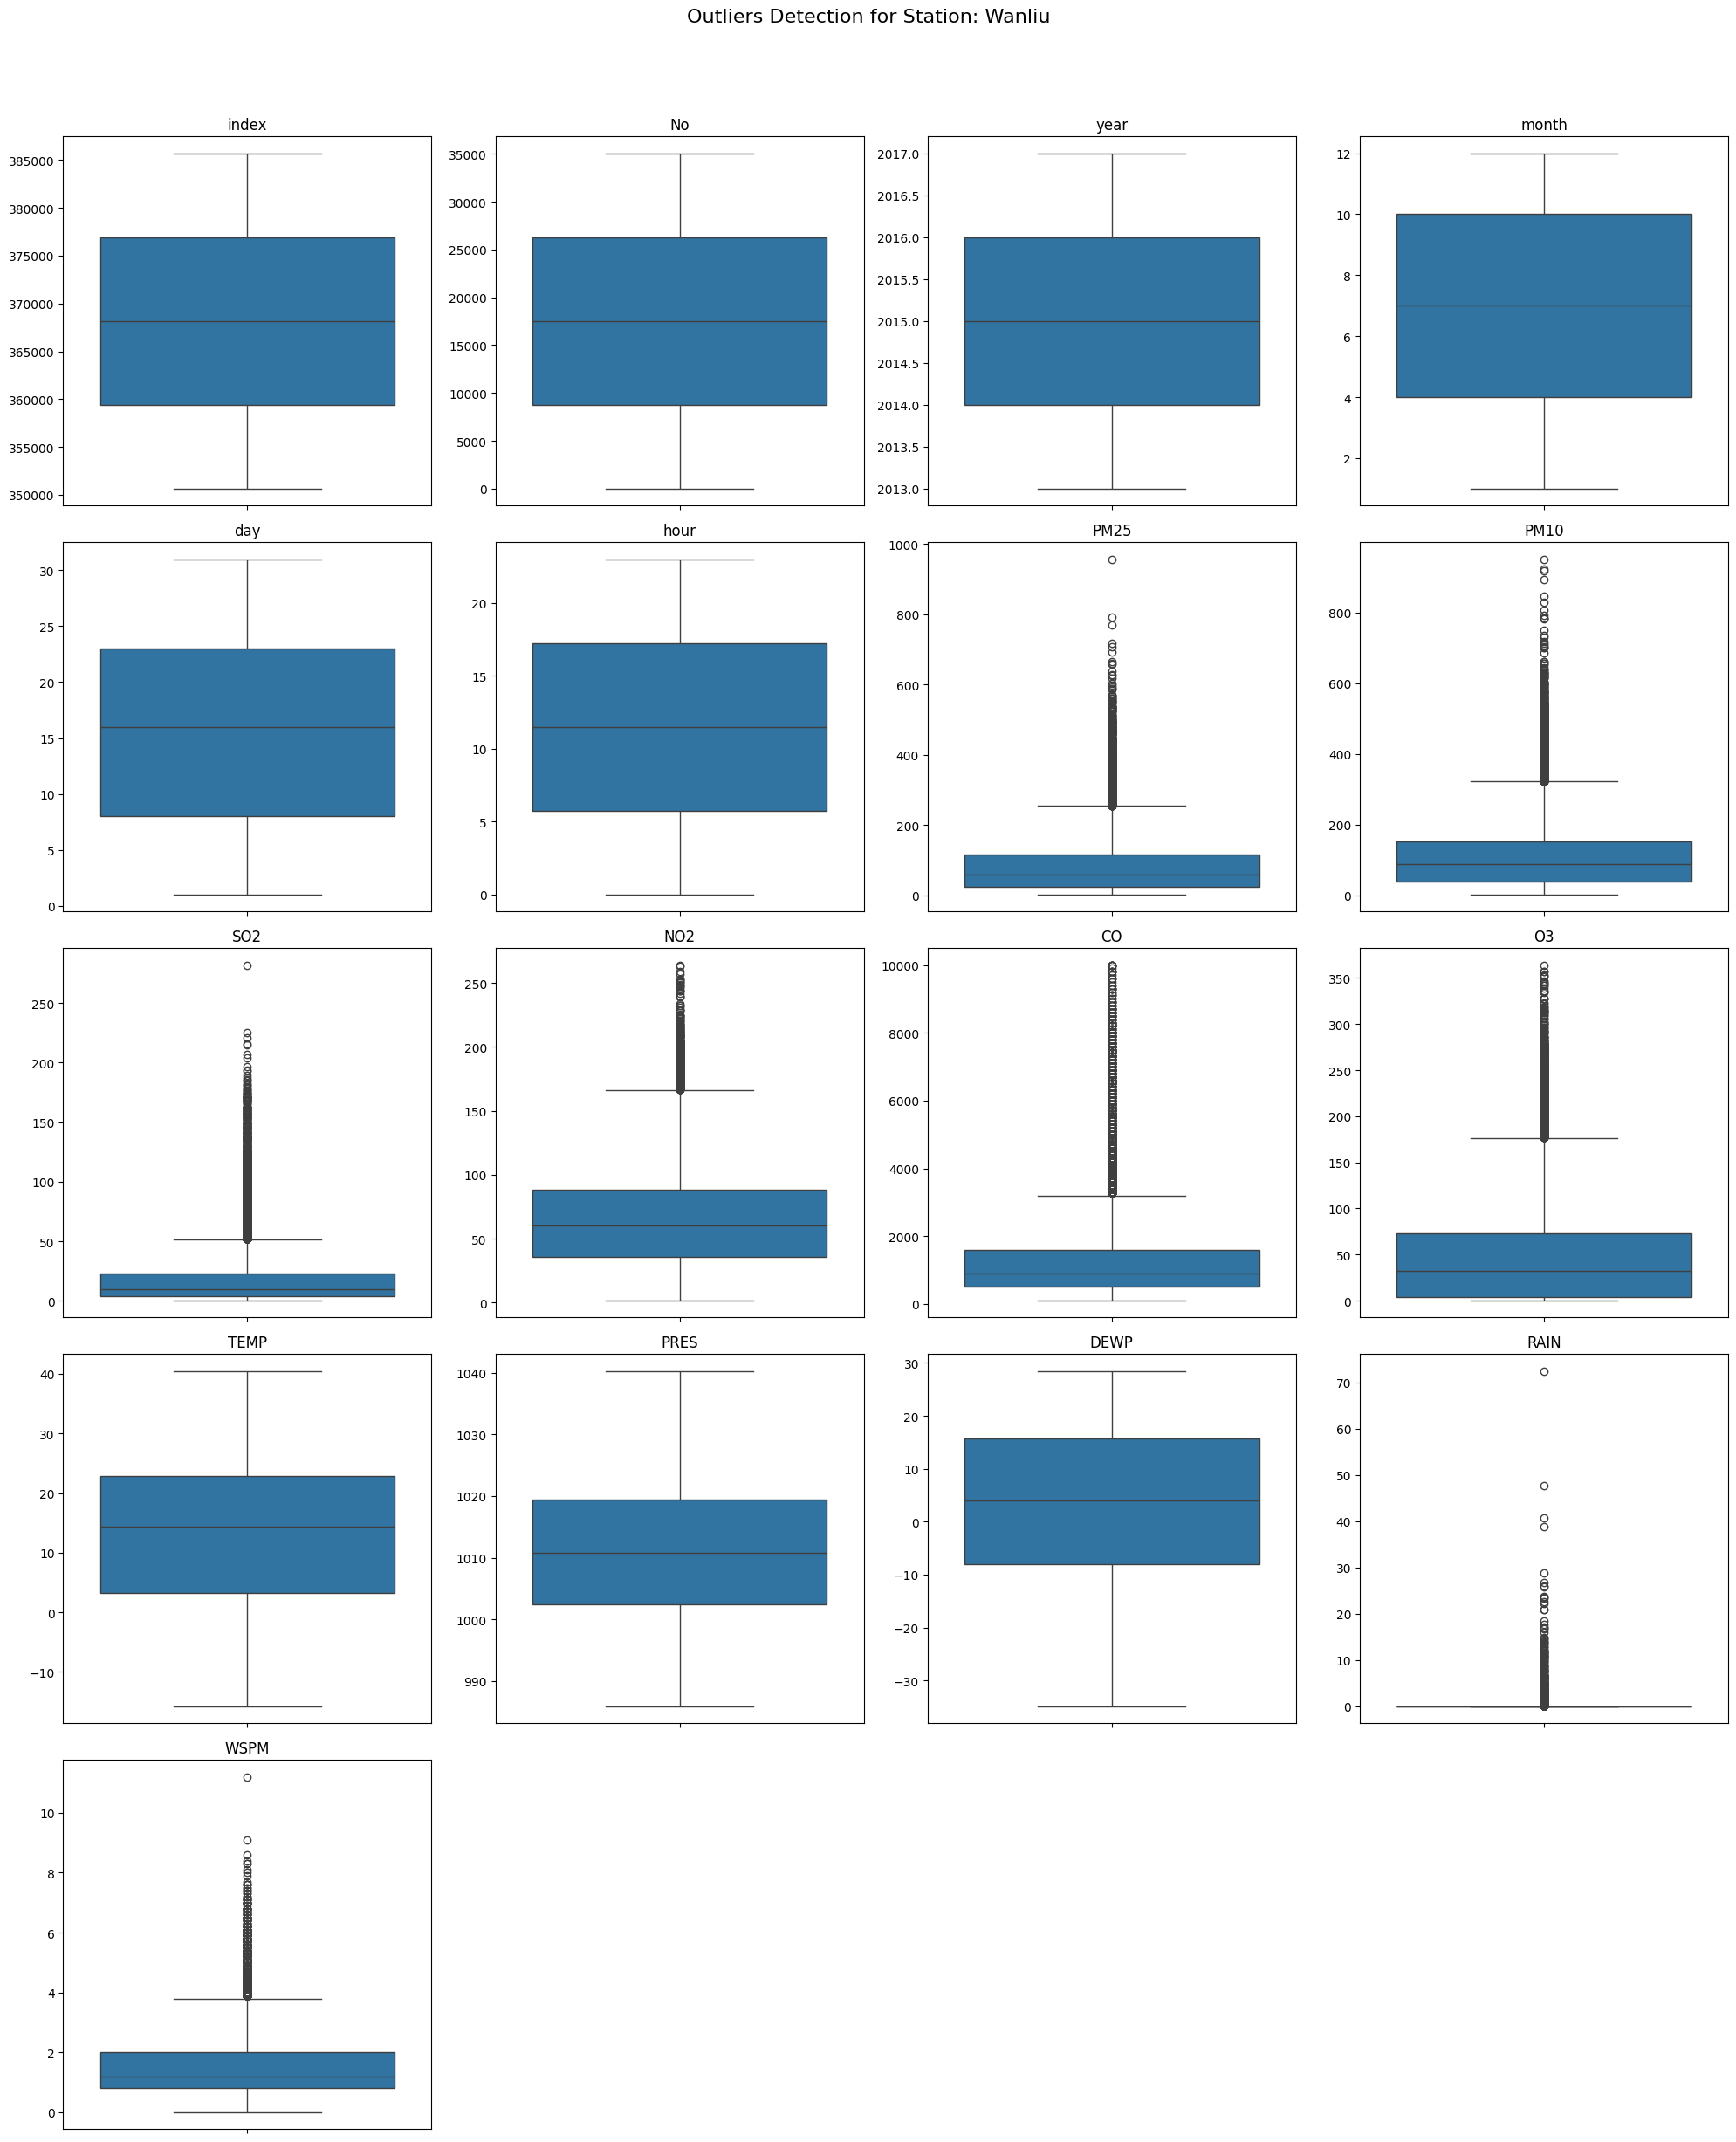

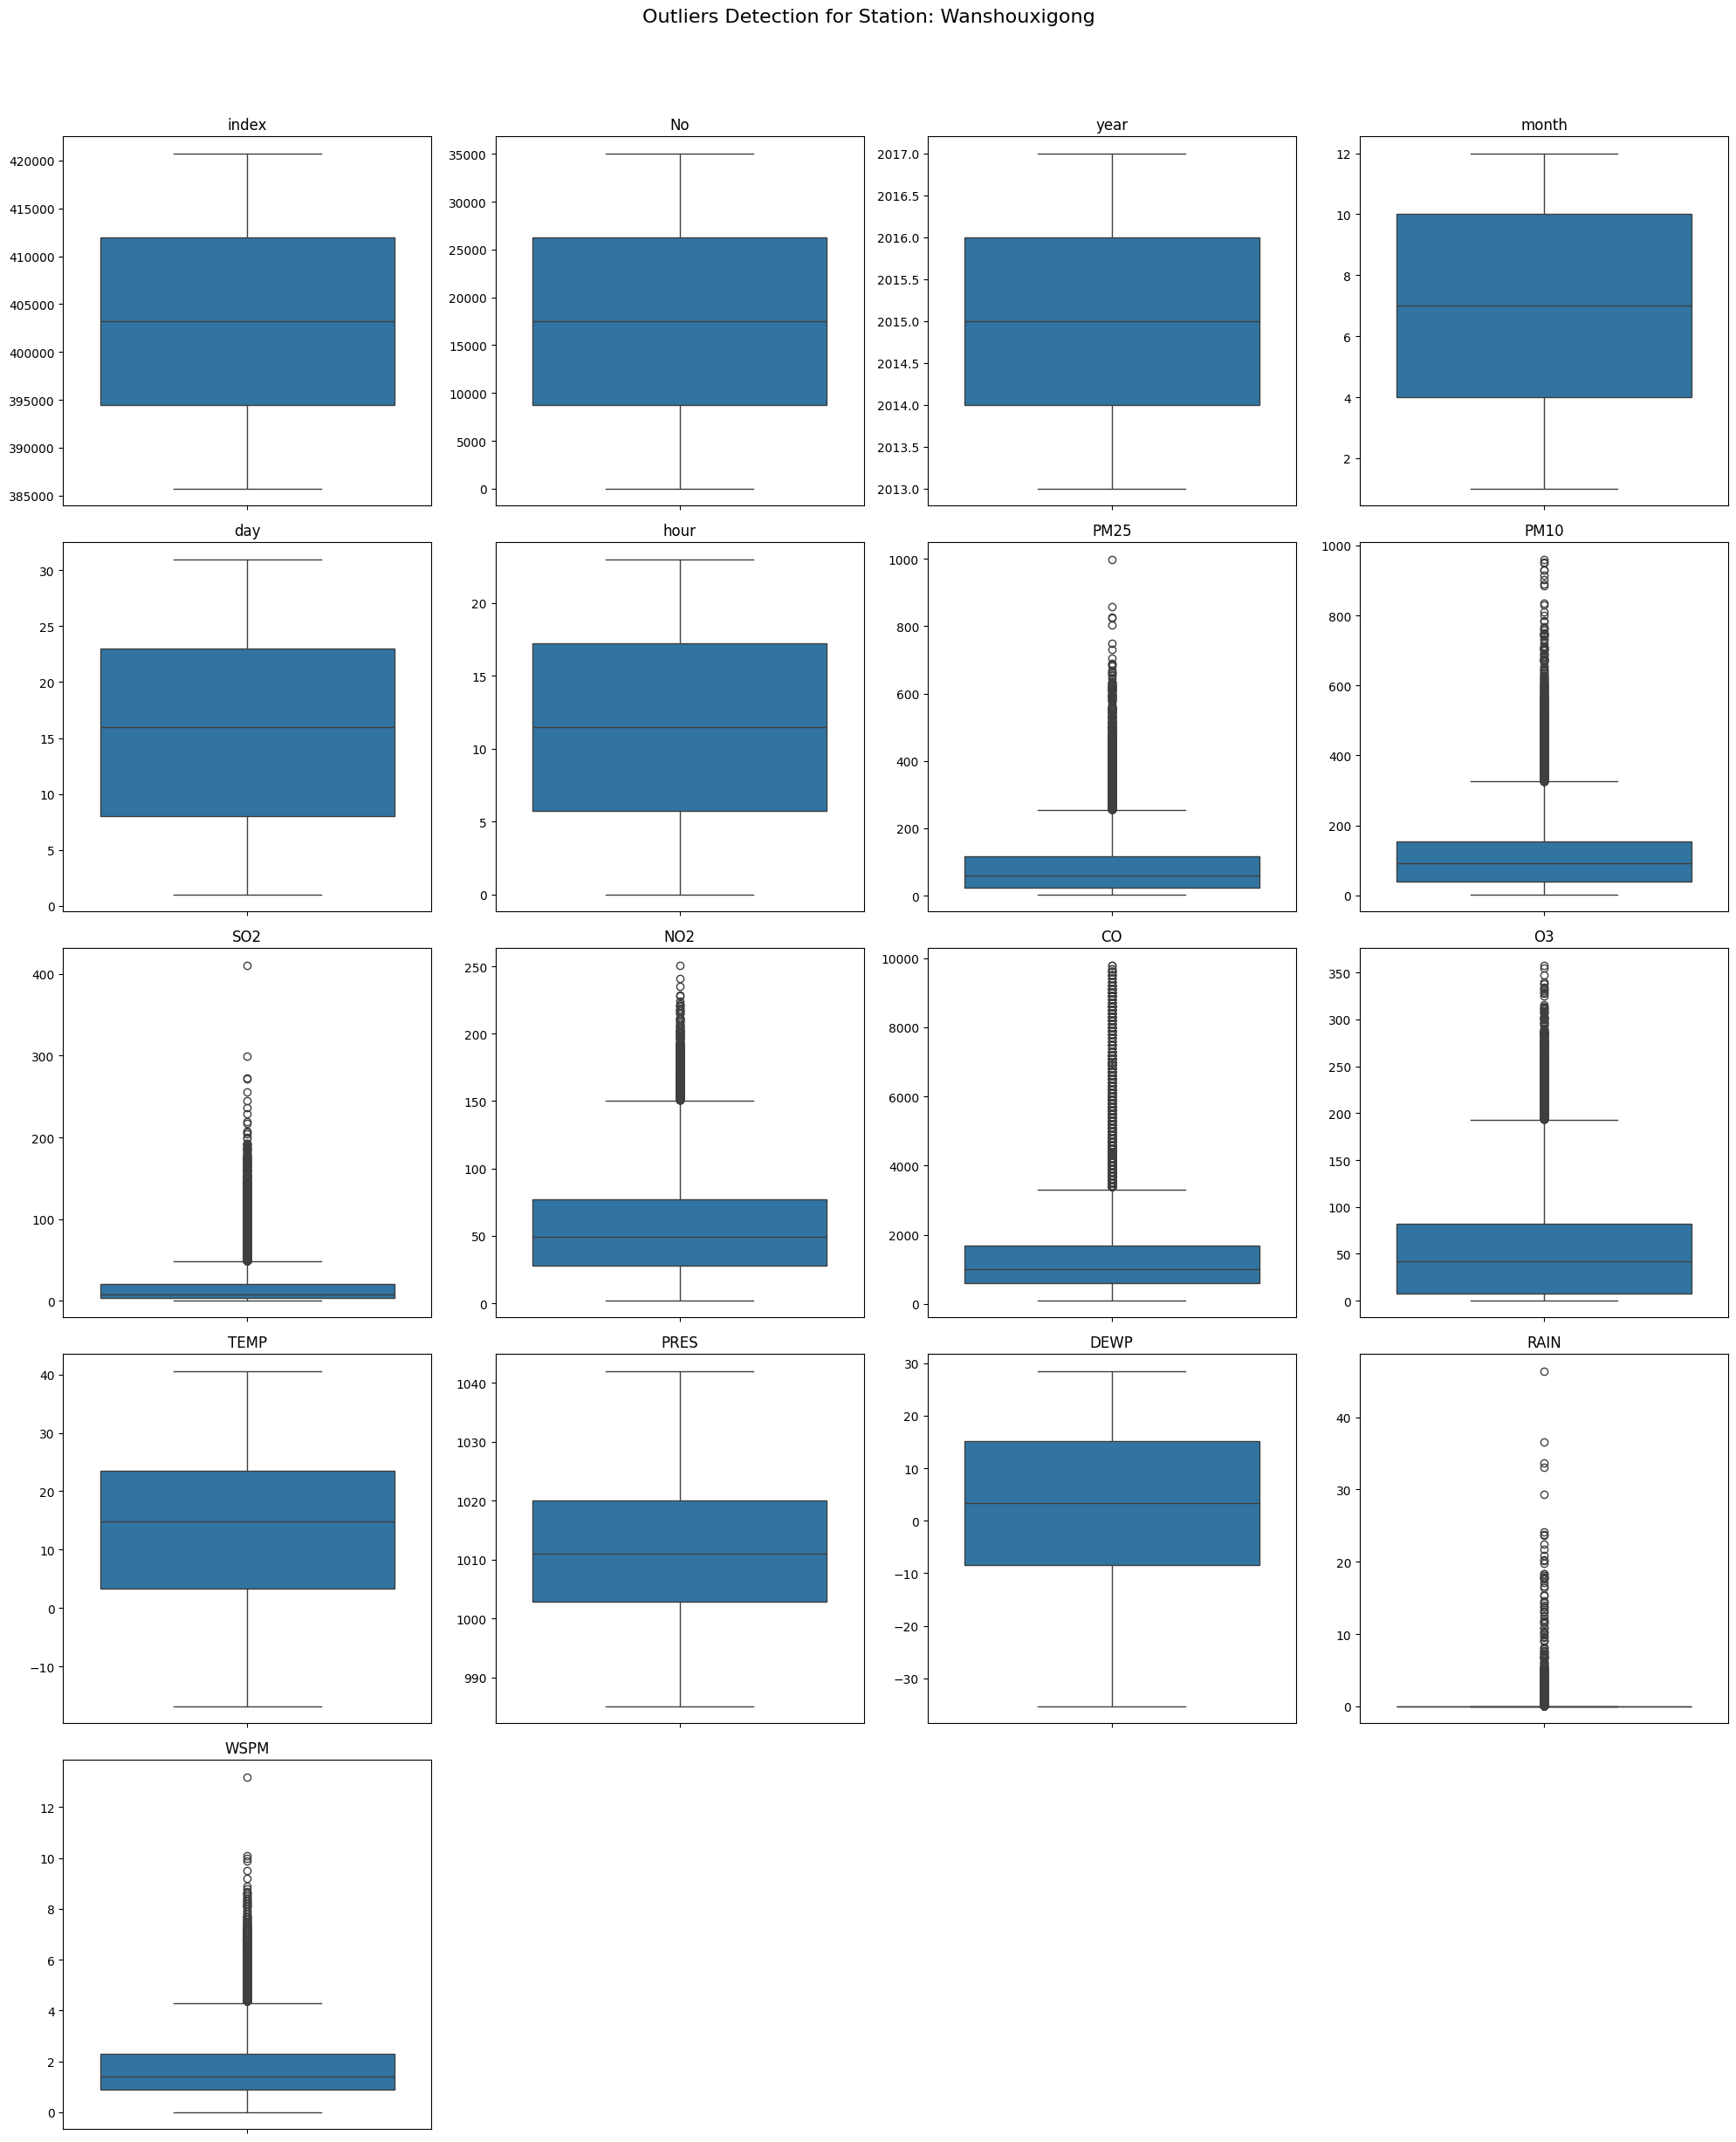

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def visualize_outliers(big_data):
    # Loop melalui setiap stasiun
    for station_name, df in big_data.items():
        # Mendapatkan kolom numerik
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        
        # Tentukan jumlah baris dan kolom berdasarkan jumlah kolom yang ada
        num_columns = len(numeric_columns)
        num_rows = math.ceil(num_columns / 4)
        
        # Membuat subplots secara dinamis
        plt.figure(figsize=(20, num_rows * 5))
        plt.suptitle(f'Outliers Detection for Station: {station_name}', fontsize=16)
        
        # Loop melalui setiap kolom numerik dan buat boxplot
        for i, col in enumerate(numeric_columns, 1):
            plt.subplot(num_rows, 4, i)
            sns.boxplot(y=df[col])
            plt.title(f'{col}')
            plt.ylabel('')

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Visualisasikan outliers untuk semua stasiun
visualize_outliers(big_data)


Dengan melihat visualisasi diatas, terdapat banyak data outlier. Data outlier ini kemungkinan terjadi karena adanya cuaca yang ekstrem pada setiap daerah stasiun. Oleh karena itu, data outlier ini merupakan suatu hal yang penting.

**Insight:**
- Data memiliki beberapa nilai yang hilang (missing values), terutama pada variabel-variabel seperti PM2.5, PM10, SO2, NO2, CO, dan O3, yang dapat mempengaruhi kualitas analisis jika tidak ditangani.
- Tidak terdapat data duplikat pada masing-masing stasiun, menunjukkan bahwa tidak ada pengulangan data yang tidak diinginkan.
- Statistik deskriptif memberikan gambaran umum tentang persebaran data dan menunjukkan variasi yang ada di antara stasiun, terutama pada parameter kualitas udara seperti PM2.5 dan PM10.
- Data outlier ditemukan di beberapa variabel utama, terutama yang terkait dengan polutan udara, yang kemungkinan disebabkan oleh kondisi cuaca ekstrem. Outlier ini dianggap relevan dan penting dalam analisis karena mencerminkan kondisi lingkungan yang mungkin ekstrem atau tidak biasa.

### Cleaning Data

#### Membuat Datetime dan menghapus kolom yang tidak diperlukan

In [14]:
# Fungsi untuk menggabungkan kolom year, month, day, hour menjadi datetime dan menghapus kolom yang tidak diperlukan
def convert_to_datetime_and_drop(df):
    # Membuat salinan eksplisit
    df = df.copy()
    
    # Gabungkan kolom year, month, day, hour menjadi datetime
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

    # Hapus kolom yang tidak diperlukan
    df = df.loc[:, ~df.columns.isin(['index','No','year', 'month', 'day', 'hour'])]

    # Susun ulang kolom sehingga datetime berada di posisi pertama
    cols = ['datetime'] + [col for col in df.columns if col != 'datetime']
    df = df[cols]

    return df

In [15]:
# Looping melalui setiap stasiun untuk mengubah format datetime
for station_name, df in big_data.items():
    big_data[station_name] = convert_to_datetime_and_drop(df)

In [16]:
# Contoh untuk melihat hasilnya
for station_name, df in big_data.items():
    print(f"{station_name}:")
    print(df[['datetime']].head())
    print("\n" + "-"*50 + "\n")

Aotizhongxin:
             datetime
0 2013-03-01 00:00:00
1 2013-03-01 01:00:00
2 2013-03-01 02:00:00
3 2013-03-01 03:00:00
4 2013-03-01 04:00:00

--------------------------------------------------

Changping:
                 datetime
35064 2013-03-01 00:00:00
35065 2013-03-01 01:00:00
35066 2013-03-01 02:00:00
35067 2013-03-01 03:00:00
35068 2013-03-01 04:00:00

--------------------------------------------------

Dingling:
                 datetime
70128 2013-03-01 00:00:00
70129 2013-03-01 01:00:00
70130 2013-03-01 02:00:00
70131 2013-03-01 03:00:00
70132 2013-03-01 04:00:00

--------------------------------------------------

Dongsi:
                  datetime
105192 2013-03-01 00:00:00
105193 2013-03-01 01:00:00
105194 2013-03-01 02:00:00
105195 2013-03-01 03:00:00
105196 2013-03-01 04:00:00

--------------------------------------------------

Guanyuan:
                  datetime
140256 2013-03-01 00:00:00
140257 2013-03-01 01:00:00
140258 2013-03-01 02:00:00
140259 2013-03-01 03:

Proses diatas merupakan tahap pembuatan kolom dengan format datetime berdasarkan kolom year, month, day, dan hour. Kolom-kolom tersebut digabungkan dan dibuat sebuah kolom dengan format datetime dan menghapus kolom-kolom tersebut karena tidak diperlukan lagi.

#### Menangani Missing Value

In [17]:
# Inisialisasi nama kolom untuk dilakukan interpolasi
cols_numeric = ['PM25', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Melakukan interpolasi untuk setiap kolom
for columns in big_data.keys():
    # Penggantian dengan nilai mode(modus) untuk kolom kategorikal
    mode_value = big_data[columns]['wd'].mode()[0]
    big_data[columns]['wd'] = big_data[columns]['wd'].fillna(mode_value)

    # Interpolasi linear untuk kolom numerik
    big_data[columns][cols_numeric] = big_data[columns][cols_numeric].interpolate()

In [18]:
# Mengecek kembali jumlah missing value
missing_values = {}

for key, df in big_data.items():
    missing_values[key] = df.isna().sum()

missing_values_df = pd.DataFrame(missing_values)
missing_values_df

,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
datetime,0,0,0,0,0,0,0,0,0,0,0,0
PM25,0,0,0,0,0,0,0,0,0,0,0,0
PM10,0,0,0,0,0,0,0,0,0,0,0,0
SO2,0,0,0,0,0,0,0,0,0,0,0,0
NO2,0,0,2,0,0,20,0,0,0,0,0,0
CO,0,0,0,0,0,0,0,0,0,0,0,0
O3,0,0,0,0,0,0,0,0,0,0,0,0
TEMP,0,0,0,0,0,0,0,0,0,0,0,0
PRES,0,0,0,0,0,0,0,0,0,0,0,0
DEWP,0,0,0,0,0,0,0,0,0,0,0,0


Pada proses diatas merupakan sebuah proses interpolasi yang burtujuan mengisi nilai-nilai yang hilang. Namun, setelah dilakukan interpolasi, masih terdapat beberapa kolom yang memiliki nilai yang kosong. Nilai kosong ini kemungkinan terjadi dikarenakan nilai tersebut merupakan nilai yang memiliki datetime lebih lama dibanding nilai-nilai lainnya, sehingga tidak dapat dilakukan interpolasi karena nilai tersebut berada pada awal data.

In [19]:
# Melihat nilai null pada dataset kota Gucheng
big_data["Gucheng"][big_data["Gucheng"].isnull().any(axis=1)]

,datetime,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
175320,2013-03-01 00:00:00,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
175321,2013-03-01 01:00:00,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
175322,2013-03-01 02:00:00,5.0,18.0,5.5,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
175323,2013-03-01 03:00:00,6.0,20.0,6.0,NaN,650.0,62.5,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
175324,2013-03-01 04:00:00,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng
175325,2013-03-01 05:00:00,4.0,11.0,3.0,NaN,700.0,87.0,-1.8,1023.6,-21.9,0.0,E,1.2,Gucheng
175326,2013-03-01 06:00:00,3.0,6.0,3.0,NaN,700.0,92.0,-2.6,1024.3,-20.4,0.0,ENE,1.2,Gucheng
175327,2013-03-01 07:00:00,5.0,5.0,3.0,NaN,800.0,86.0,-0.9,1025.6,-20.5,0.0,ENE,1.1,Gucheng
175328,2013-03-01 08:00:00,5.0,9.0,5.0,NaN,900.0,81.0,0.1,1026.1,-20.3,0.0,ENE,3.0,Gucheng
175329,2013-03-01 09:00:00,4.0,10.0,6.0,NaN,900.0,82.0,1.1,1026.1,-20.6,0.0,NE,2.8,Gucheng


In [20]:
# Melihat nilai null pada dataset kota Dingling
big_data["Dingling"][big_data["Dingling"].isnull().any(axis=1)]

,datetime,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
70128,2013-03-01 00:00:00,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
70129,2013-03-01 01:00:00,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling


In [21]:
# Melakukan pengisian nilai kosong dengan median untuk setiap kolom numerik
for columns in big_data.keys():
    for col in cols_numeric:
        # Isi nilai NA dengan median dari kolom tersebut
        median_value = big_data[columns][col].median()
        big_data[columns][col] = big_data[columns][col].fillna(median_value)

Nilai yang masih kosong tersebut, diisi dengan nilai tengah (median). Nilai tengah ini digunakan karena pada data terdapat banyak outlier.

In [22]:
# Mengecek kembali jumlah missing value untuk memastikan tidak ada nilai yang kosong
missing_values = {}
for key, df in big_data.items():
    missing_values[key] = df.isna().sum()

missing_values_df = pd.DataFrame(missing_values)
missing_values_df

,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
datetime,0,0,0,0,0,0,0,0,0,0,0,0
PM25,0,0,0,0,0,0,0,0,0,0,0,0
PM10,0,0,0,0,0,0,0,0,0,0,0,0
SO2,0,0,0,0,0,0,0,0,0,0,0,0
NO2,0,0,0,0,0,0,0,0,0,0,0,0
CO,0,0,0,0,0,0,0,0,0,0,0,0
O3,0,0,0,0,0,0,0,0,0,0,0,0
TEMP,0,0,0,0,0,0,0,0,0,0,0,0
PRES,0,0,0,0,0,0,0,0,0,0,0,0
DEWP,0,0,0,0,0,0,0,0,0,0,0,0


Dapat dilihat pada tabel diatas sudah tidak terdapat missing value. Oleh karena itu, data tersebut sudah bisa dilakukan tahap selanjutnya yaitu tahap eksplorasi data.

In [23]:
# Menggabungkan semua DataFrame dalam dictionary big_data menjadi satu DataFrame besar
combined_df = pd.concat(big_data.values(), ignore_index=True)

# Menyimpan DataFrame gabungan ke file CSV tunggal
combined_df.to_csv('data/all_stations_cleaned.csv', index=False)

print("Semua data telah disimpan dalam satu file CSV bernama 'all_stations_cleaned.csv'.")


Semua data telah disimpan dalam satu file CSV bernama 'all_stations_cleaned.csv'.


Sebelum ke tahap selanjutnya, alangkah lebih baik menyimpan data yang sudah dibersihkan tersebut.

In [24]:
data = pd.read_csv('data/all_stations_cleaned.csv')

**Insight:**
- Kolom-kolom `year`, `month`, `day`, dan `hour` telah digabungkan menjadi kolom `datetime`, dan kolom yang tidak diperlukan telah dihapus, sehingga data lebih terstruktur dan siap untuk analisis berbasis waktu.
- Missing values pada kolom kategorikal seperti `wd` diisi dengan nilai modus, sedangkan missing values pada kolom numerik diisi menggunakan interpolasi linear. Namun, beberapa missing values pada awal data tidak dapat diisi dengan interpolasi.
- Missing values yang tersisa, terutama pada data awal, telah diatasi menggunakan median, yang merupakan pendekatan efektif mengingat adanya outlier dalam data.
- Setelah proses ini, tidak ada lagi missing values, memastikan data sudah bersih dan siap untuk dianalisis lebih lanjut.
- Semua data dari berbagai stasiun telah digabungkan dan disimpan dalam satu file CSV untuk memudahkan proses analisis berikutnya.

## Exploratory Data Analysis (EDA)

### Explore Distribution of Stations

C:\Users\harry\AppData\Local\Temp\ipykernel_32352\3522340348.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=station_counts.index, y=station_counts.values, palette="viridis")


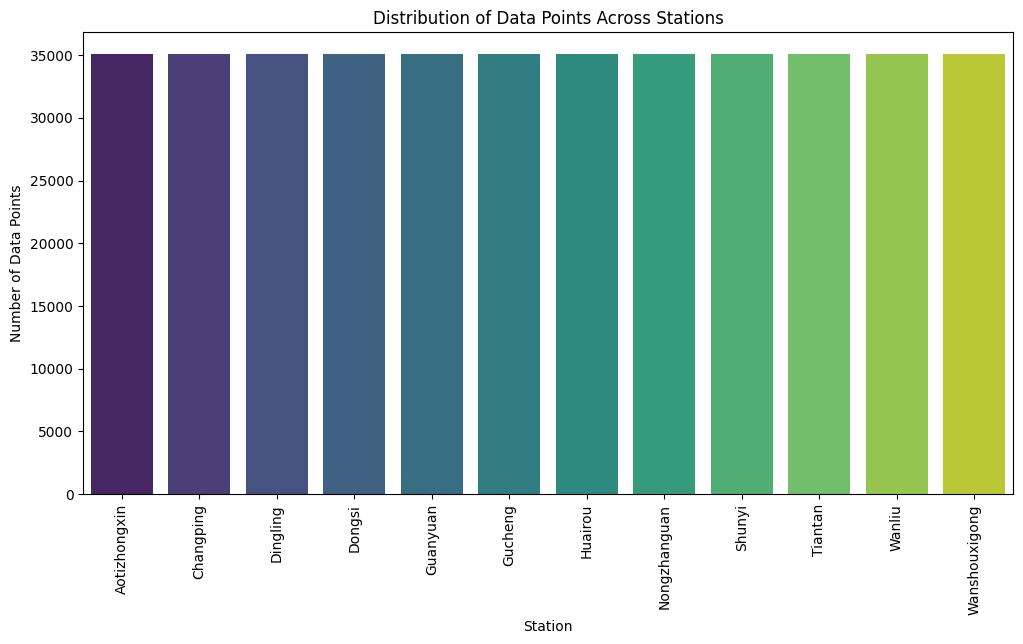

In [ ]:
# distribution of stations in the dataset
station_counts = data['station'].value_counts()

# Plot the distribution of data points across different stations
plt.figure(figsize=(12, 6))
sns.barplot(x=station_counts.index, y=station_counts.values, palette="viridis")
plt.title('Distribution of Data Points Across Stations')
plt.xlabel('Station')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=90)
plt.show()

Pada gambar diatas, terlihat bahwa distribusi data setiap stasiun merata yang berkisaran 35000 data setiap stasiunnya

### Explore Distribution of Air Quality Metrics

In [ ]:
# Descriptive statistics for air quality metrics across all stations
air_quality_metrics = ['PM25', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
summary_stats = {}

for station, df in big_data.items():
    summary_stats[station] = df[air_quality_metrics].describe()

# Convert the summary statistics into a DataFrame
summary_stats_df = pd.concat(summary_stats, axis=1)
summary_stats_df


Aotizhongxin                                                          \
               PM25          PM10           SO2           NO2            CO   
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      82.540623    110.210033     17.459251     59.074106   1264.692405   
std       81.956401     95.262531     22.702284     37.000918   1239.411826   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      114.000000    154.000000     22.000000     81.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                        Changping                                            \
                 O3          PM25          PM10           SO2           NO2   
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      55.328626     70.986438     94.788575     14.943066     44.206153   
std       57.327470     72.397726     83.928515     21.012174     29.502709   
min        0.214200      2.000000      2.000000      0.285600      1.847700   
25%        8.000000     18.000000     34.000000      2.000000     22.000000   
50%       41.000000     46.000000     72.000000      7.000000     36.000000   
75%       81.000000    100.000000    131.000000     18.000000     60.000000   
max      423.000000    882.000000    999.000000    310.000000    226.000000   

       ...        Wanliu                                            \
       ...           SO2           NO2            CO            O3   
count  ...  35064.000000  35064.000000  35064.000000  35064.000000   
mean   ...     18.409514     65.668418   1328.761180     46.909375   
std    ...     22.679906     37.966984   1263.218948     54.451718   
min    ...      0.285600      1.642400    100.000000      0.214200   
25%    ...      4.000000     36.543400    600.000000      3.000000   
50%    ...     10.000000     61.000000    900.000000     29.000000   
75%    ...     23.000000     89.000000   1600.000000     70.000000   
max    ...    282.000000    264.000000  10000.000000    364.000000   

      Wanshouxigong                                                          \
               PM25          PM10           SO2           NO2            CO   
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      85.067548    112.505795     17.363354     55.495402   1373.618569   
std       85.999698     98.132120     24.171627     35.833026   1228.161525   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       23.000000     39.000000      3.000000     28.000000    600.000000   
50%       60.000000     91.000000      8.000000     49.000000   1000.000000   
75%      116.000000    154.000000     21.000000     77.000000   1700.000000   
max      999.000000    961.000000    411.000000    251.000000   9800.000000   

                     
                 O3  
count  35064.000000  
mean      55.919979  
std       57.156365  
min        0.214200  
25%        8.000000  
50%       42.000000  
75%       82.000000  
max      358.000000  

[8 rows x 72 columns]

Berdasarkan angka statistik diatas, dapat dilihat bahwa setiap stasiun memiliki kesamaan pada distribusi nilai pada variabel PM2.5, PM10, SO2, NO2, CO, dan O3. Artinya suatu stasiun dapat mewakili atau dapat digeneralisasi untuk stasiun-stasiun lainnya

### Explore Seasonal Patterns in Temperature, Pressure, and Dew Point

In [27]:
# Monthly statistics for TEMP, PRES, and DEWP
seasonal_metrics = ['TEMP', 'PRES', 'DEWP']
monthly_stats = {}

for station, df in big_data.items():
    monthly_stats[station] = df.groupby(df['datetime'].dt.month)[seasonal_metrics].describe()

monthly_stats_df = pd.concat(monthly_stats, axis=1)
monthly_stats_df

Aotizhongxin                                                      \
                 TEMP                                                       
                count       mean       std   min     25%    50%       75%   
datetime                                                                    
1              2976.0  -1.634114  4.305789 -16.8  -4.500  -1.60   1.12125   
2              2712.0   1.299502  4.477783 -12.2  -1.925   1.10   4.10000   
3              2976.0   8.403951  6.205705  -7.3   3.600   8.10  12.70000   
4              2880.0  15.309271  5.923917  -1.3  11.000  15.10  19.60000   
5              2976.0  21.419657  5.707051   5.4  17.600  21.30  25.50000   
6              2880.0  24.561424  4.501994  14.4  20.900  24.20  27.90000   
7              2976.0  27.195262  3.963930  17.0  24.000  26.80  30.20000   
8              2976.0  26.715121  4.167562  13.8  23.500  26.60  30.00000   
9              2880.0  20.916237  4.464026   6.3  17.975  20.50  24.10000   
10             2976.0  13.510233  4.926960  -0.3  10.300  13.70  16.70000   
11             2880.0   4.683438  5.224527  -9.7   0.900   4.75   8.10000   
12             2976.0  -0.133031  3.934145 -10.1  -3.000  -0.40   2.40000   

                                     ... Wanshouxigong                  \
                  PRES               ...          PRES            DEWP   
           max   count         mean  ...           75%     max   count   
datetime                             ...                                 
1         14.0  2976.0  1023.257275  ...        1027.3  1042.0  2976.0   
2         15.9  2712.0  1021.383346  ...        1025.7  1036.1  2712.0   
3         26.0  2976.0  1014.972116  ...        1019.7  1034.2  2976.0   
4         31.9  2880.0  1009.360347  ...        1012.6  1030.6  2880.0   
5         40.5  2976.0  1003.427655  ...        1007.6  1018.9  2976.0   
6         37.3  2880.0  1000.316250  ...        1002.4  1011.1  2880.0   
7         38.8  2976.0   999.078730  ...        1001.4  1010.2  2976.0   
8         36.4  2976.0  1002.197077  ...        1005.2  1014.5  2976.0   
9         33.6  2880.0  1009.669410  ...        1012.2  1026.9  2880.0   
10        28.4  2976.0  1015.940409  ...        1019.0  1036.4  2976.0   
11        20.9  2880.0  1020.321215  ...        1024.9  1038.5  2880.0   
12        14.8  2976.0  1022.891868  ...        1027.1  1037.0  2976.0   

                                                                
                                                                
               mean       std   min     25%    50%   75%   max  
datetime                                                        
1        -14.328999  6.672046 -35.3 -19.100 -14.60  -8.7   0.9  
2        -12.710140  6.841789 -31.3 -17.900 -13.10  -7.4   4.7  
3         -7.706216  8.329598 -31.9 -13.900  -6.70  -1.9  11.8  
4          0.615035  7.500576 -23.4  -4.400   1.30   6.0  16.5  
5          7.051210  6.851076 -17.7   3.100   8.00  12.1  22.3  
6         15.715312  4.226656  -6.0  13.700  16.40  18.6  24.8  
7         19.992204  3.574453   3.7  18.000  20.80  22.6  27.3  
8         18.989012  4.509597  -5.1  16.675  19.50  22.3  28.5  
9         14.048576  4.671883  -3.4  12.100  15.30  17.3  21.7  
10         5.753360  7.004494 -22.4   1.400   6.70  11.7  18.6  
11        -4.338507  7.052199 -30.9  -8.700  -2.95   0.6  10.3  
12       -11.490860  6.092752 -28.0 -15.800 -11.50  -6.9   2.2  

[12 rows x 288 columns]

- Analisis Suhu:
Suhu pada bulan November hingga Maret lebih rendah, artinya iklim pada rentang bulan November hingga Maret cenderung lebih dingin. Sedangkan suhu pada bulan April hingga Oktober lebih tinggi. Puncak suhu tertinggi terdapat pada bulan Juli, artinya iklim pada rentang bulan April hingga Oktober cenderung lebih panas.

- Analisis Tekanan:
Pembacaan tekanan mempunyai kisaran yang relatif sempit, dengan nilai rata-rata sekitar 980 hingga 1050 hPa.
Variasi tekanannya kecil, menunjukkan kondisi atmosfer yang stabil.

- Analisis Titik Embun:
Pada data ini kemungkinan besar mewakili statistik cuaca musiman atau bulanan untuk beberapa lokasi. Kesimpulan umum yang dapat diambil adalah bahwa periode pengamatan memiliki kondisi dingin dan kering dengan tekanan atmosfer yang stabil.

### Explore Variation of Air Quality Over Time (Monthly, Daily, Hourly)

In [28]:
# Group by month, day, and hour to see variations in air quality metrics
time_variation_stats = {}

for station, df in big_data.items():
    time_variation_stats[station] = {
        'Monthly': df.groupby(df['datetime'].dt.month)[air_quality_metrics].mean(),
        'Daily': df.groupby(df['datetime'].dt.day)[air_quality_metrics].mean(),
        'Hourly': df.groupby(df['datetime'].dt.hour)[air_quality_metrics].mean()
    }

# Example: Monthly variation for all stations
monthly_variation_df = pd.concat({station: stats['Monthly'] for station, stats in time_variation_stats.items()}, axis=1)
monthly_variation_df

Aotizhongxin                                                 \
                 PM25        PM10        SO2        NO2           CO   
datetime                                                               
1           92.414180  113.627386  34.903226  65.716700  1944.438844   
2           87.214049  105.727876  31.686025  54.344395  1467.348820   
3           99.936761  150.492507  31.676069  63.294524  1372.356015   
4           78.473785  131.610069  16.439925  52.765205   844.499653   
5           67.337399  115.376714  16.012332  48.965222   792.146841   
6           71.348611   87.050521   8.441715  49.436039   943.982118   
7           74.890625   84.755712   5.739655  47.724934   828.525034   
8           55.851815   72.099496   4.449185  48.483620   780.174731   
9           64.400104   87.080139   7.055196  59.289108   911.647917   
10          97.224294  120.466230  10.734731  74.607958  1178.729839   
11          98.544132  123.656354  15.854062  72.984653  1860.373264   
12         102.705141  129.810652  27.069778  70.798583  2253.990255   

                     Changping                                    ...  \
                 O3       PM25        PM10        SO2        NO2  ...   
datetime                                                          ...   
1         27.142305  84.348757  104.949395  32.186660  57.565860  ...   
2         43.218105  81.794063   99.163532  29.815450  48.657817  ...   
3         47.291080  84.001428  130.078696  25.761494  55.263030  ...   
4         64.546367  70.376389  109.755556  11.528907  41.336468  ...   
5         88.450649  60.602050   96.509173  11.956421  34.200588  ...   
6         94.112582  59.516632   76.324201   6.960300  29.769862  ...   
7         96.529238  62.473790   75.347278   4.862033  26.956316  ...   
8         84.964026  46.796976   63.266297   4.367385  27.512412  ...   
9         51.514170  55.301389   67.432812   4.894563  38.033167  ...   
10        27.899234  81.100302   99.009073   6.836165  53.603845  ...   
11        17.103327  78.482951  104.761111  15.060698  56.384365  ...   
12        20.290430  87.347446  110.580309  25.718046  61.220474  ...   

             Wanliu                                    Wanshouxigong  \
                SO2        NO2           CO         O3          PM25   
datetime                                                               
1         35.452856  75.722816  2265.288978  18.557232    106.912903   
2         33.514196  73.574115  1605.106932  30.888090     96.340524   
3         32.247216  86.985551  1443.340558  36.562219     97.080141   
4         16.208119  72.119550   838.350694  56.881874     76.192882   
5         14.770800  57.508233   817.613575  80.663389     64.007023   
6         10.230133  52.334451  1102.098438  83.955913     71.570833   
7          7.214900  47.740682   837.379704  84.320184     72.441028   
8          7.631489  47.881100   786.088710  75.988332     55.105847   
9          7.808851  56.280097   887.551042  44.078796     61.757569   
10        10.718527  72.086173  1158.971774  21.285868     92.962870   
11        16.228646  69.168087  1896.579645  13.946964    104.881875   
12        29.481192  76.909493  2312.231392  14.724528    121.722681   

                                                                    
                PM10        SO2        NO2           CO         O3  
datetime                                                            
1         130.619456  35.905007  70.358300  2028.377016  23.086962  
2         114.782264  33.034108  56.343289  1526.272124  37.564528  
3         143.434980  31.433332  60.902506  1383.077285  49.893669  
4         116.080382  15.427388  47.082503   936.660764  67.762986  
5         109.450974  15.068086  45.065096   888.417171  89.837191  
6          90.328819   8.281964  42.900074  1069.611632  98.009483  
7          85.862567   5.325688  39.611584  1027.515121  95.409853  
8          76.362567   4.198411  42.539801   986.928763  89.5

Tingkat PM2.5 dan PM10 relatif tinggi, menunjukkan kualitas udara yang buruk di sebagian besar lokasi. Hal ini mungkin disebabkan oleh tingkat polusi yang tinggi atau faktor musiman tertentu. Polutan lain seperti SO2, NO2, CO, dan O3 juga menunjukkan variasi yang signifikan, dengan lokasi tertentu mengalami konsentrasi yang lebih tinggi, kemungkinan disebabkan oleh aktivitas industri atau kepadatan lalu lintas. Data menunjukkan tekanan atmosfer yang stabil dan suhu rendah, yang dapat mempengaruhi penyebaran polutan.

Secara keseluruhan, data tersebut menunjukkan kualitas udara yang buruk, terutama dalam hal tingkat PM2.5 dan PM10, kemungkinan besar disebabkan oleh faktor musiman atau sumber polusi lokal. Hal ini memerlukan langkah-langkah perbaikan kualitas udara yang ditargetkan.

### Explore Variation Across Stations

In [29]:
# Group by station to see variations in air quality metrics
station_variation_stats = {}

for station, df in big_data.items():
    station_variation_stats[station] = df[air_quality_metrics].describe()

station_variation_stats_df = pd.concat(station_variation_stats, axis=1)
station_variation_stats_df

Aotizhongxin                                                          \
               PM25          PM10           SO2           NO2            CO   
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      82.540623    110.210033     17.459251     59.074106   1264.692405   
std       81.956401     95.262531     22.702284     37.000918   1239.411826   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      114.000000    154.000000     22.000000     81.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                        Changping                                            \
                 O3          PM25          PM10           SO2           NO2   
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      55.328626     70.986438     94.788575     14.943066     44.206153   
std       57.327470     72.397726     83.928515     21.012174     29.502709   
min        0.214200      2.000000      2.000000      0.285600      1.847700   
25%        8.000000     18.000000     34.000000      2.000000     22.000000   
50%       41.000000     46.000000     72.000000      7.000000     36.000000   
75%       81.000000    100.000000    131.000000     18.000000     60.000000   
max      423.000000    882.000000    999.000000    310.000000    226.000000   

       ...        Wanliu                                            \
       ...           SO2           NO2            CO            O3   
count  ...  35064.000000  35064.000000  35064.000000  35064.000000   
mean   ...     18.409514     65.668418   1328.761180     46.909375   
std    ...     22.679906     37.966984   1263.218948     54.451718   
min    ...      0.285600      1.642400    100.000000      0.214200   
25%    ...      4.000000     36.543400    600.000000      3.000000   
50%    ...     10.000000     61.000000    900.000000     29.000000   
75%    ...     23.000000     89.000000   1600.000000     70.000000   
max    ...    282.000000    264.000000  10000.000000    364.000000   

      Wanshouxigong                                                          \
               PM25          PM10           SO2           NO2            CO   
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      85.067548    112.505795     17.363354     55.495402   1373.618569   
std       85.999698     98.132120     24.171627     35.833026   1228.161525   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       23.000000     39.000000      3.000000     28.000000    600.000000   
50%       60.000000     91.000000      8.000000     49.000000   1000.000000   
75%      116.000000    154.000000     21.000000     77.000000   1700.000000   
max      999.000000    961.000000    411.000000    251.000000   9800.000000   

                     
                 O3  
count  35064.000000  
mean      55.919979  
std       57.156365  
min        0.214200  
25%        8.000000  
50%       42.000000  
75%       82.000000  
max      358.000000  

[8 rows x 72 columns]

Polutan yang diukur di berbagai stasiun, dan data menunjukkan bahwa tingkat polutan ini dapat sangat bervariasi tergantung pada lokasi dan kondisi lainnya.

Standar deviasi yang tinggi pada sebagian besar kolom menunjukkan bahwa data memiliki variasi yang sangat besar, mengindikasikan bahwa beberapa pengukuran mungkin sangat berbeda dari nilai rata-rata.

Median dan rata-rata nilai polutan menunjukkan bahwa sebagian besar pengukuran berada di kisaran yang lebih rendah, namun adanya nilai yang sangat tinggi (outlier) mendorong rata-rata menjadi jauh lebih tinggi dari median.

### Explore Correlation Between Variables

In [30]:
# Correlation matrix for air quality metrics and weather conditions
corr_matrices = {}

for station, df in big_data.items():
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    # Compute the correlation matrix for the numeric columns
    corr_matrices[station] = numeric_df.corr()

# Combine the correlation matrices for all stations
corr_matrices_df = pd.concat(corr_matrices, axis=1)
corr_matrices_df

Aotizhongxin                                                              \
             PM25      PM10       SO2       NO2        CO        O3      TEMP   
PM25     1.000000  0.875198  0.479025  0.682795  0.786052 -0.160271 -0.122505   
PM10     0.875198  1.000000  0.469399  0.650040  0.682026 -0.141969 -0.109321   
SO2      0.479025  0.469399  1.000000  0.430005  0.523269 -0.206802 -0.352274   
NO2      0.682795  0.650040  0.430005  1.000000  0.687243 -0.495797 -0.232562   
CO       0.786052  0.682026  0.523269  0.687243  1.000000 -0.320600 -0.359192   
O3      -0.160271 -0.141969 -0.206802 -0.495797 -0.320600  1.000000  0.589316   
TEMP    -0.122505 -0.109321 -0.352274 -0.232562 -0.359192  0.589316  1.000000   
PRES    -0.008796 -0.035391  0.205117  0.074193  0.206537 -0.422749 -0.827183   
DEWP     0.123277  0.061443 -0.284395  0.072417 -0.096834  0.296920  0.823197   
RAIN    -0.013780 -0.027816 -0.041565 -0.039261 -0.016204  0.026881  0.036607   
WSPM    -0.275836 -0.179647 -0.112397 -0.487331 -0.275605  0.342127  0.037862   

                                    ... Wanshouxigong                      \
          PRES      DEWP      RAIN  ...          PM10       SO2       NO2   
PM25 -0.008796  0.123277 -0.013780  ...      0.886600  0.502309  0.697233   
PM10 -0.035391  0.061443 -0.027816  ...      1.000000  0.504534  0.677723   
SO2   0.205117 -0.284395 -0.041565  ...      0.504534  1.000000  0.489754   
NO2   0.074193  0.072417 -0.039261  ...      0.677723  0.489754  1.000000   
CO    0.206537 -0.096834 -0.016204  ...      0.735707  0.558202  0.742340   
O3   -0.422749  0.296920  0.026881  ...     -0.146845 -0.190224 -0.520428   
TEMP -0.827183  0.823197  0.036607  ...     -0.146343 -0.355623 -0.309047   
PRES  1.000000 -0.776443 -0.060416  ...     -0.003036  0.206296  0.142016   
DEWP -0.776443  1.000000  0.080772  ...      0.041379 -0.289492 -0.028393   
RAIN -0.060416  0.080772  1.000000  ...     -0.033835 -0.042728 -0.047344   
WSPM  0.071479 -0.304990  0.022449  ...     -0.230682 -0.138180 -0.475279   

                                                                            
            CO        O3      TEMP      PRES      DEWP      RAIN      WSPM  
PM25  0.813376 -0.194620 -0.185844  0.033790  0.074192 -0.020684 -0.298422  
PM10  0.735707 -0.146845 -0.146343 -0.003036  0.041379 -0.033835 -0.230682  
SO2   0.558202 -0.190224 -0.355623  0.206296 -0.289492 -0.042728 -0.138180  
NO2   0.742340 -0.520428 -0.309047  0.142016 -0.028393 -0.047344 -0.475279  
CO    1.000000 -0.331974 -0.339264  0.167627 -0.051200 -0.015993 -0.338315  
O3   -0.331974  1.000000  0.618409 -0.454880  0.332672  0.024152  0.317749  
TEMP -0.339264  0.618409  1.000000 -0.828498  0.817555  0.039019  0.061364  
PRES  0.167627 -0.454880 -0.828498  1.000000 -0.770045 -0.063393  0.054139  
DEWP -0.051200  0.332672  0.817555 -0.770045  1.000000  0.088307 -0.278064  
RAIN -0.015993  0.024152  0.039019 -0.063393  0.088307  1.000000  0.030869  
WSPM -0.338315  0.317749  0.061364  0.054139 -0.278064  0.030869  1.000000  

[11 rows x 132 columns]

Korelasi yang tinggi antara beberapa polutan, seperti antara PM25 dan PM10, menunjukkan bahwa ketika satu jenis polutan meningkat, polutan lainnya cenderung meningkat juga. Ini bisa mengindikasikan sumber emisi yang sama atau kondisi lingkungan yang mempengaruhi kedua jenis polutan secara bersamaan.

Variabel seperti suhu (TEMP), tekanan udara (PRES), dan hujan (RAIN) juga memiliki korelasi tertentu dengan tingkat polutan. Misalnya, beberapa polutan mungkin memiliki korelasi negatif dengan hujan, menunjukkan bahwa hujan bisa membantu membersihkan udara dari polutan tertentu.

Beberapa stasiun menunjukkan pola korelasi yang serupa, yang bisa mengindikasikan bahwa mereka terpengaruh oleh faktor lingkungan atau sumber polusi yang serupa.

Adanya korelasi negatif yang kuat, seperti antara O3 dan polutan lainnya, bisa menunjukkan bahwa peningkatan O3 terjadi dalam kondisi yang berbeda dibandingkan dengan polutan lain seperti PM25 dan NO2.

## Visualization & Explanatory Analysis

### Faktor-faktor apa saja yang paling mempengaruhi kualitas udara (PM2.5 dan PM10)?

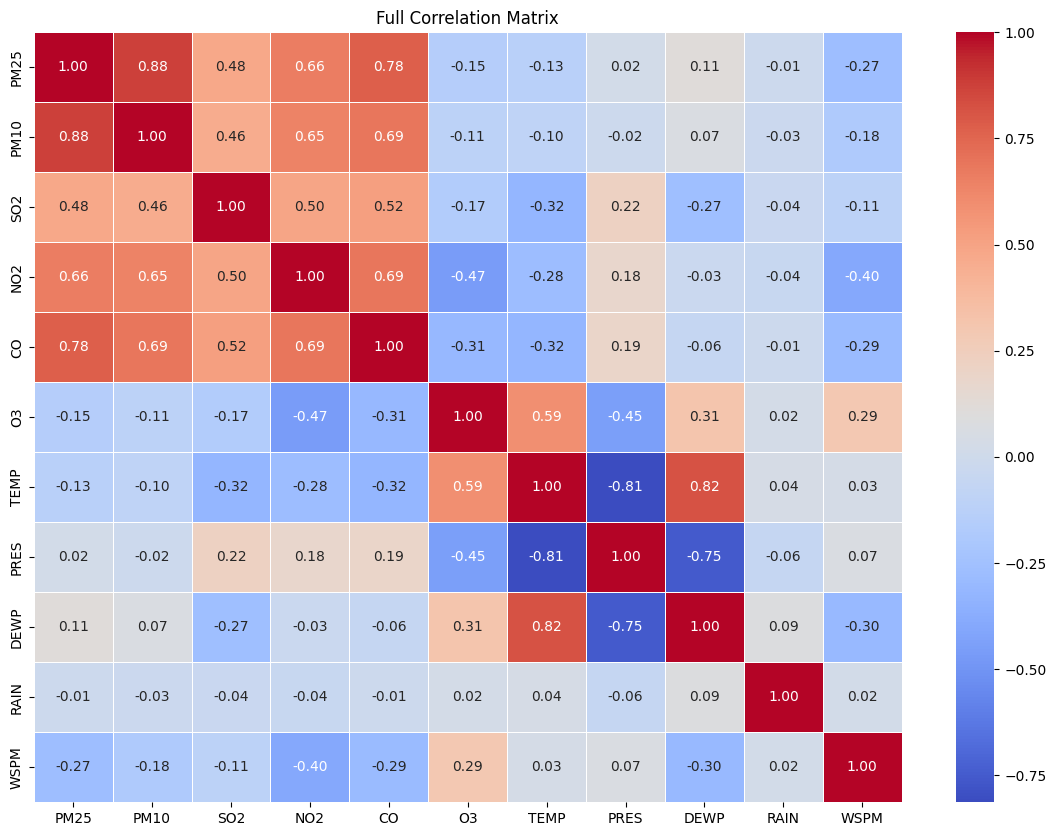

In [31]:
def plot_full_correlations(df):
    # Select only numeric columns for correlation calculation
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Compute the correlation matrix
    corr_matrix = numeric_df.corr()
    
    # Plot the correlation matrix
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Full Correlation Matrix')
    plt.show()

# Plot the full correlation matrix
plot_full_correlations(data)

Berdasarkan matrix korelasi diatas, terdapat 3 poin penting yang dapat diambil.
- Faktor-faktor utama yang paling mempengaruhi kualitas udara (berdasarkan PM2.5 dan PM10) adalah CO, NO2, dan SO2, dengan CO menjadi faktor yang paling signifikan.
- O3 berperan sebagai indikator yang berlawanan dengan polutan seperti PM2.5 dan PM10, di mana peningkatan O3 biasanya berhubungan dengan penurunan polutan lainnya.
- Suhu dan tekanan udara juga berperan dalam memengaruhi kadar ozon (O3) di udara, yang secara tidak langsung mempengaruhi kualitas udara.

### Bagaimana distribusi kualitas udara (PM2.5 dan PM10) sepanjang tahun pada salah satu stasiun?

In [47]:
# Visualize air quality metrics over time
def plot_air_quality_over_time(station_name, df, metric):
    plt.figure(figsize=(30, 10))
    sns.lineplot(x=df[station_name]['datetime'], y=df[station_name][metric], label=metric)
    plt.title(f'Air Quality Metrics Over Time at {station_name}')
    plt.xlabel('Date')
    plt.ylabel('Concentration (µg/m³)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.legend()
    plt.show()

#### Huairou

##### PM25

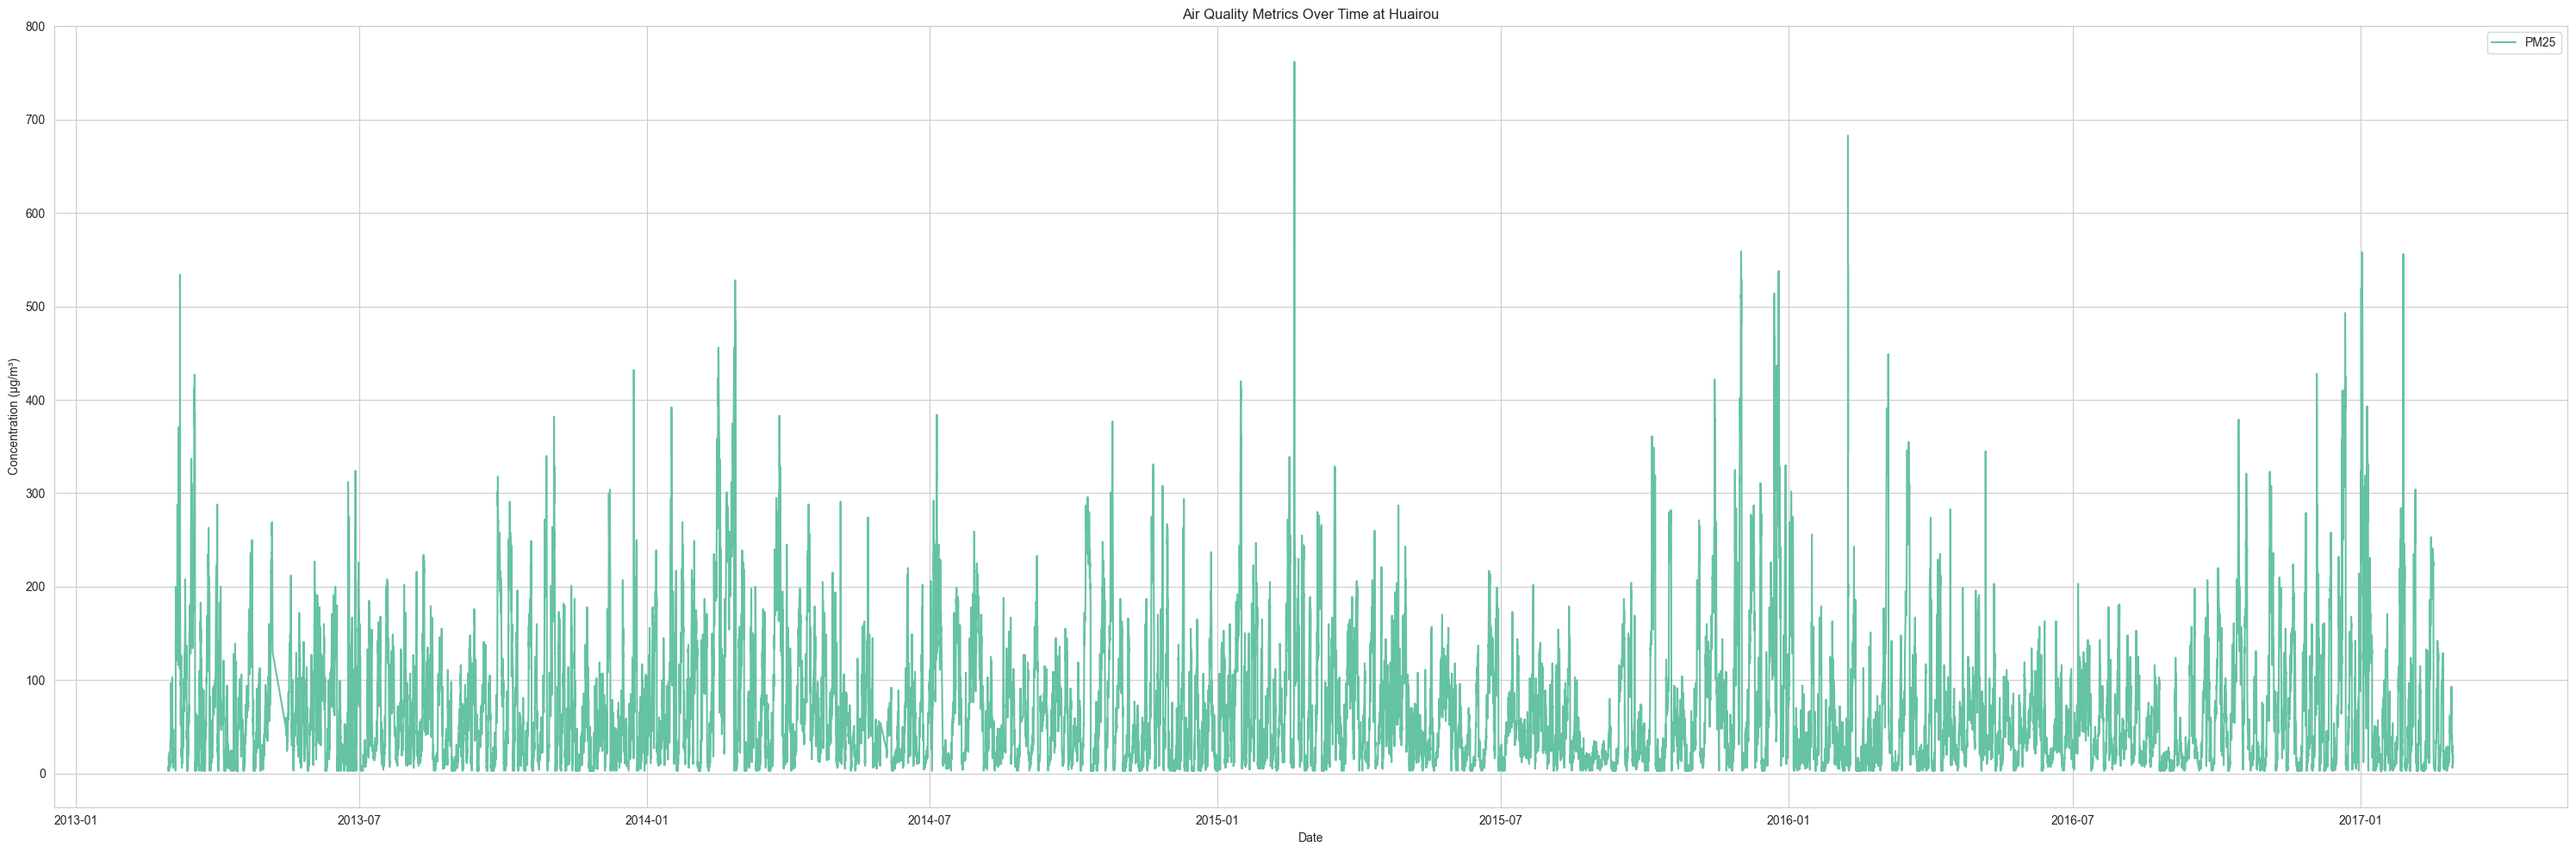

In [48]:
plot_air_quality_over_time('Huairou', big_data, 'PM25')	

##### PM10

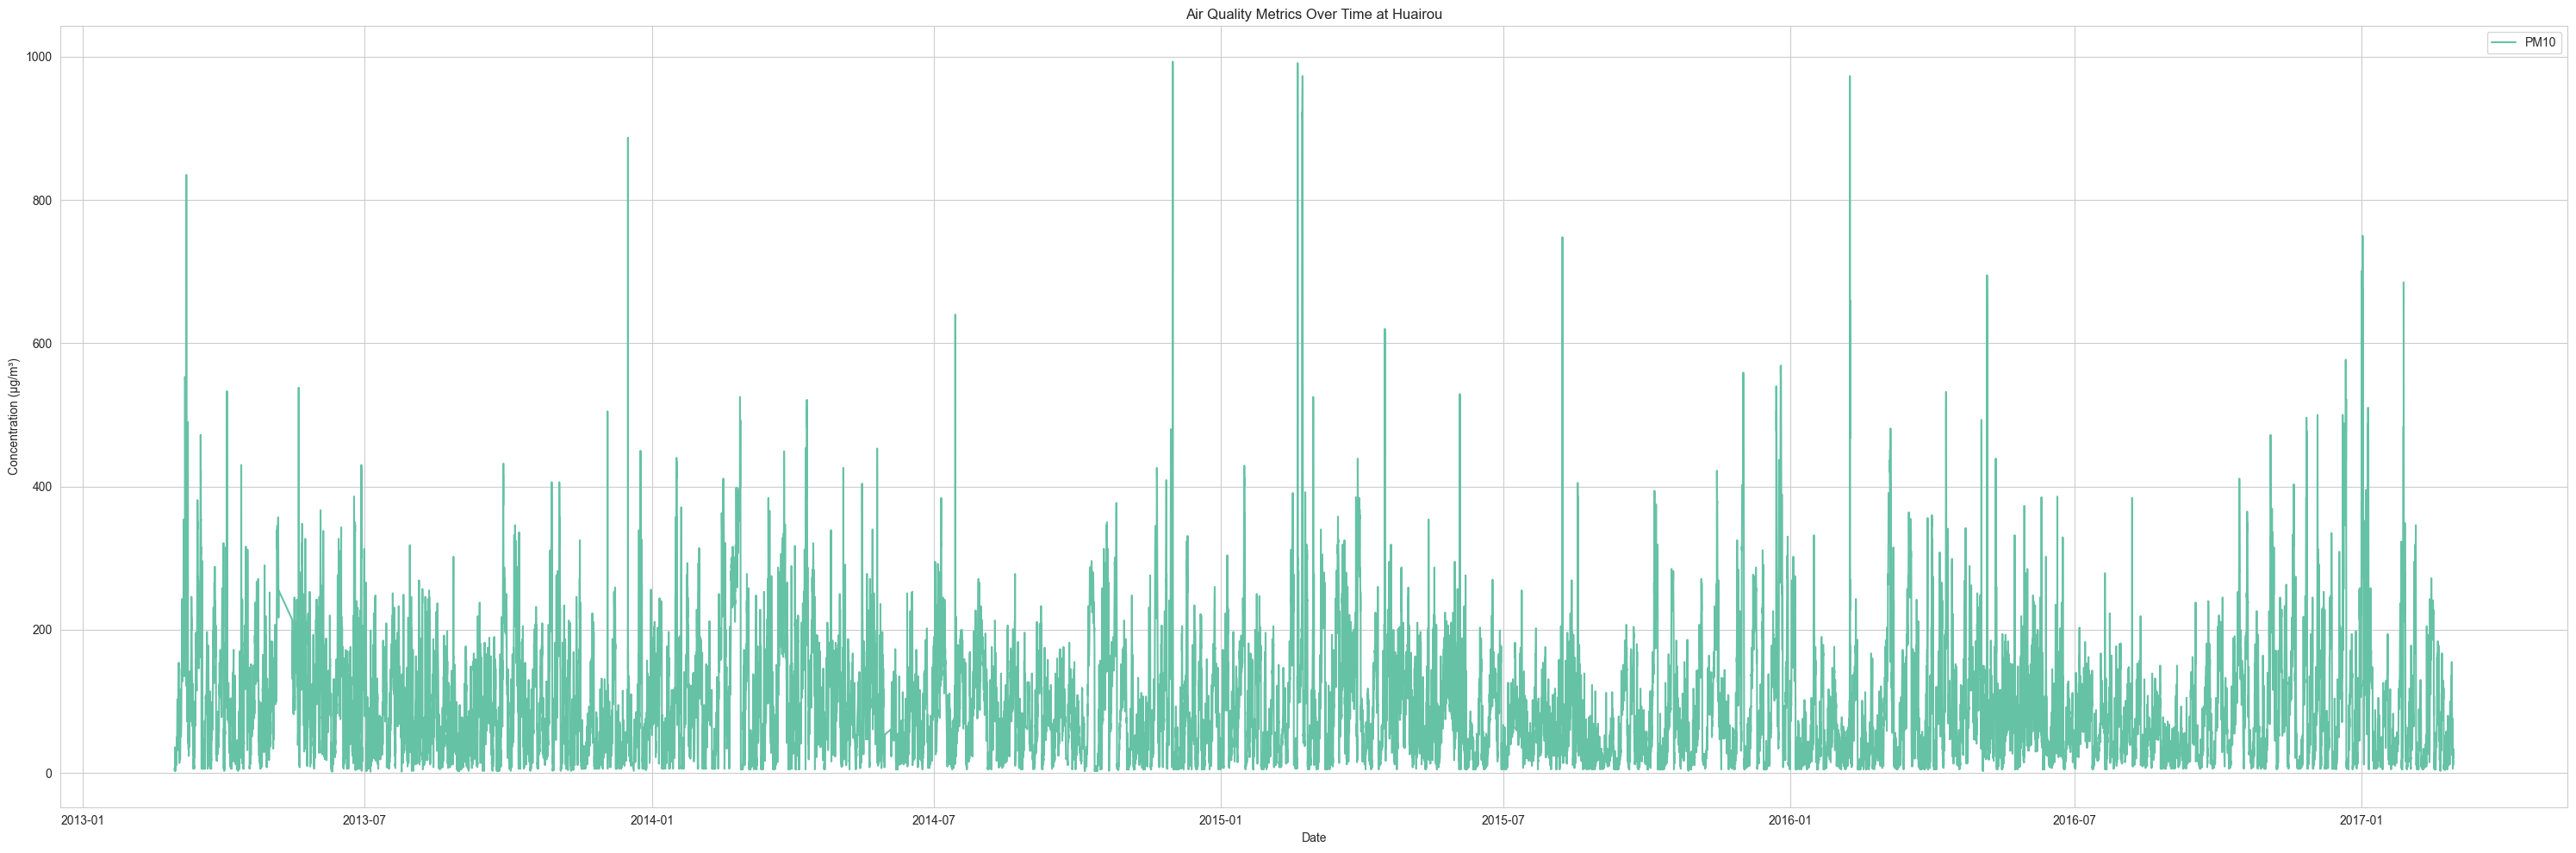

In [49]:
plot_air_quality_over_time('Huairou', big_data, 'PM10')	

Kedua grafik tersebut menunjukkan tren konsentrasi PM2.5 dan PM10 (polutan partikel udara) dari tahun 2013 hingga awal 2017 di Huairou. PM2.5 dan PM10 di Stasiun Huairo menunjukkan pola tren yang mirip. Data ini menggambarkan fluktuasi harian yang signifikan, dengan beberapa puncak ekstrem di atas 500 µg/m³, yang menunjukkan periode kualitas udara yang sangat buruk. Secara umum, ada banyak variabilitas, dengan konsentrasi sering kali berada di kisaran 0 hingga 200 µg/m³, tetapi terdapat lonjakan signifikan secara berkala. Hal ini bisa mencerminkan adanya periode polusi tinggi yang mungkin disebabkan oleh aktivitas manusia atau kondisi lingkungan tertentu, seperti cuaca atau musim.

### Bagaimana pola musim dalam perubahan suhu (TEMP), tekanan udara (PRES), dan titik embun (DEWP) pada salah satu stasiun?

In [35]:
# List of metrics to visualize seasonally
seasonal_metrics = ['TEMP', 'PRES', 'DEWP']

#### Daily

In [36]:
def plot_daily(station_name, df, metrics):
    num_metrics = len(metrics)
    
    # Creating subplots: one row for each station, one column for each metric
    plt.figure(figsize=(15, 5))
    
    for i, metric in enumerate(metrics):
        plt.subplot(1, num_metrics, i + 1)  # Adjusting subplot position
        sns.lineplot(x=df[station_name]['datetime'].dt.day, y=df[station_name][metric])
        plt.title(f'{metric} at {station_name}')
        plt.xlabel('Day')
        plt.ylabel(metric)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

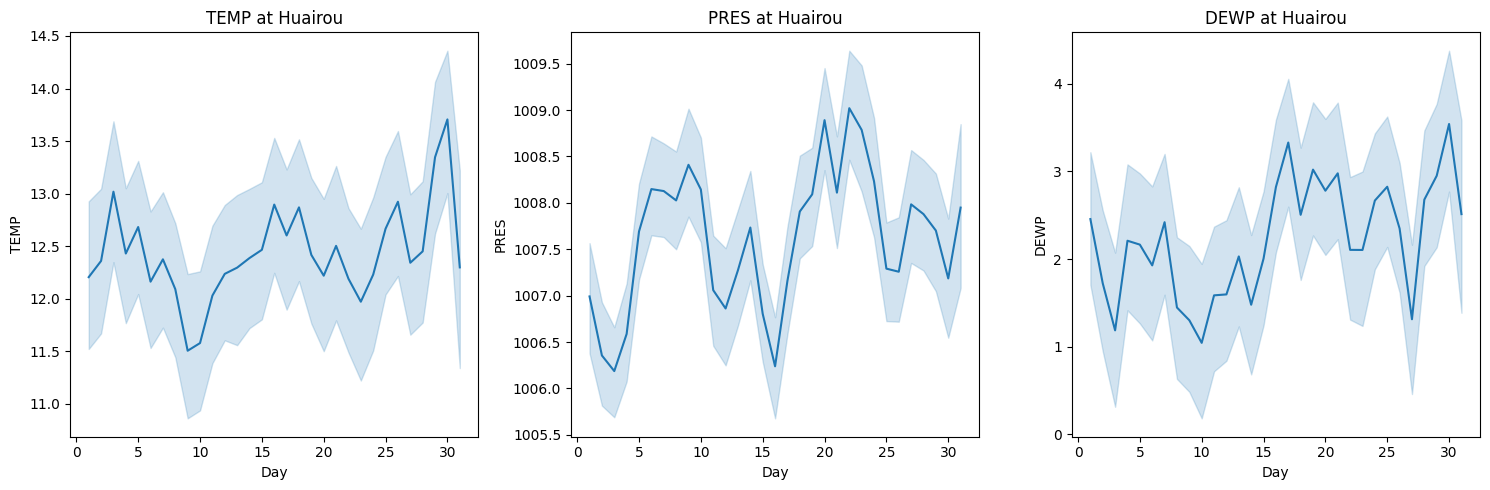

In [37]:
# Loop through each station and Plot seasonal patterns
plot_daily('Huairou', big_data, seasonal_metrics)

Grafik tersebut menunjukkan pola harian pada stasiun Huairou untuk suhu (TEMP), tekanan udara (PRES), dan titik embun (DEWP) selama 30 hari.

- Suhu (TEMP): Terdapat fluktuasi ringan dengan rentang suhu antara 11°C dan 14.5°C. Suhu cenderung stabil, meskipun ada beberapa puncak dan penurunan, terutama sekitar hari ke-10 dan hari ke-30.

- Tekanan Udara (PRES): Tekanan udara juga berfluktuasi dalam rentang 1005 hingga 1010 hPa. Ada beberapa lonjakan tajam, terutama pada hari ke-15 dan ke-30, yang menunjukkan perubahan cuaca atau kondisi atmosfer.

- Titik Embun (DEWP): Titik embun berkisar antara 0°C dan 4°C. Ada perubahan signifikan dari hari ke-10 hingga ke-30, dengan fluktuasi yang lebih besar pada akhir periode.

#### Monthly

In [38]:
def plot_monthly(station_name, df, metrics):
    num_metrics = len(metrics)
    
    # Set a color palette and a style
    sns.set_palette("Set2")
    sns.set_style("whitegrid")
    
    # Creating subplots: one row for each station, one column for each metric
    plt.figure(figsize=(15, 5))
    
    for i, metric in enumerate(metrics):
        plt.subplot(1, num_metrics, i + 1)  # Adjusting subplot position
        
        # Plot with additional style
        sns.lineplot(x=df[station_name]['datetime'].dt.month, y=df[station_name][metric], 
                     marker='o', linewidth=2.5)
        
        plt.title(f'{metric} at {station_name}', fontsize=14)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel(metric, fontsize=12)
        
        # Customize the ticks and grid
        plt.xticks(range(1, 13))
        plt.grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

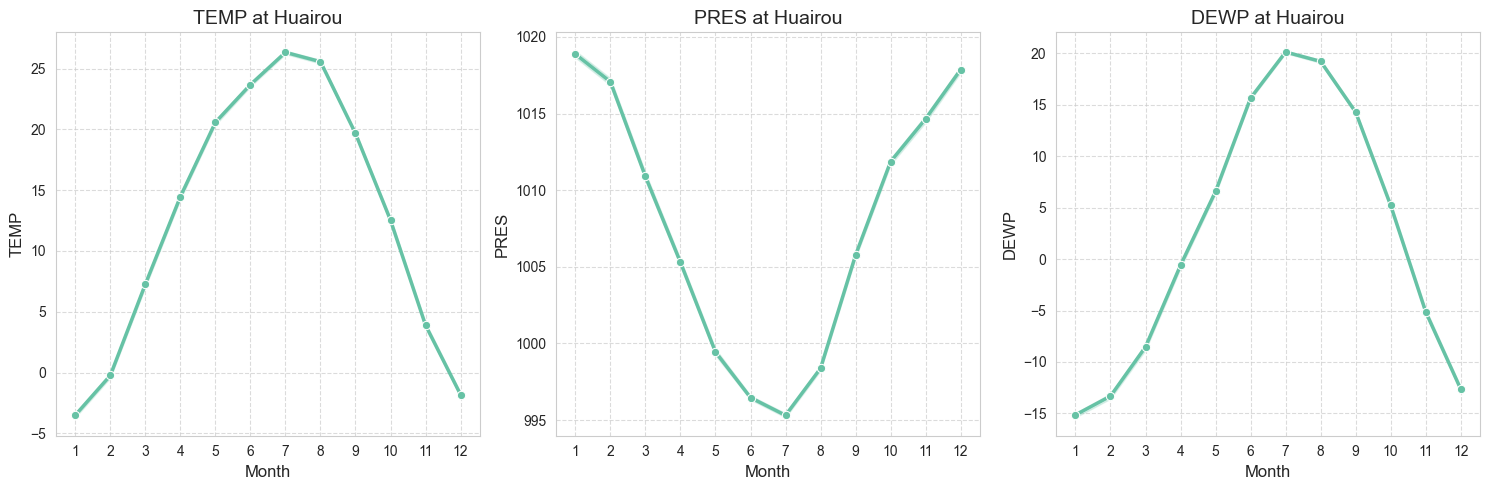

In [39]:
# Loop through each station and Plot seasonal patterns
plot_monthly('Huairou', big_data, seasonal_metrics)


Grafik tersebut yang menunjukkan perubahan bulanan suhu (TEMP), tekanan udara (PRES), dan titik embun (DEWP) di stasiun Huairou sepanjang tahun.

- Suhu (TEMP):
Pola suhu menunjukkan peningkatan dari bulan Januari hingga mencapai puncaknya pada bulan Juli dengan suhu lebih dari 25°C, kemudian menurun tajam hingga Desember.
Ini menunjukkan pola musiman dengan musim panas di pertengahan tahun dan musim dingin di awal dan akhir tahun.

- Tekanan Udara (PRES):
Tekanan udara mencapai nilai tertinggi pada bulan Januari dan Desember (sekitar 1020 hPa), sementara pada bulan Juli tekanan mencapai titik terendah (sekitar 995 hPa).
Ini menunjukkan bahwa tekanan udara cenderung lebih tinggi pada musim dingin dan lebih rendah pada musim panas.

- Titik Embun (DEWP):
Titik embun meningkat dari Januari hingga puncaknya pada bulan Juli (sekitar 20°C), dan menurun lagi hingga mencapai nilai negatif di bulan Desember.
Pola ini menunjukkan tingkat kelembaban yang lebih tinggi pada musim panas dan lebih rendah pada musim dingin, konsisten dengan suhu.

### Bagaimana variasi kualitas udara (PM2.5 dan PM10) di berbagai stasiun pengukuran?

#### PM25

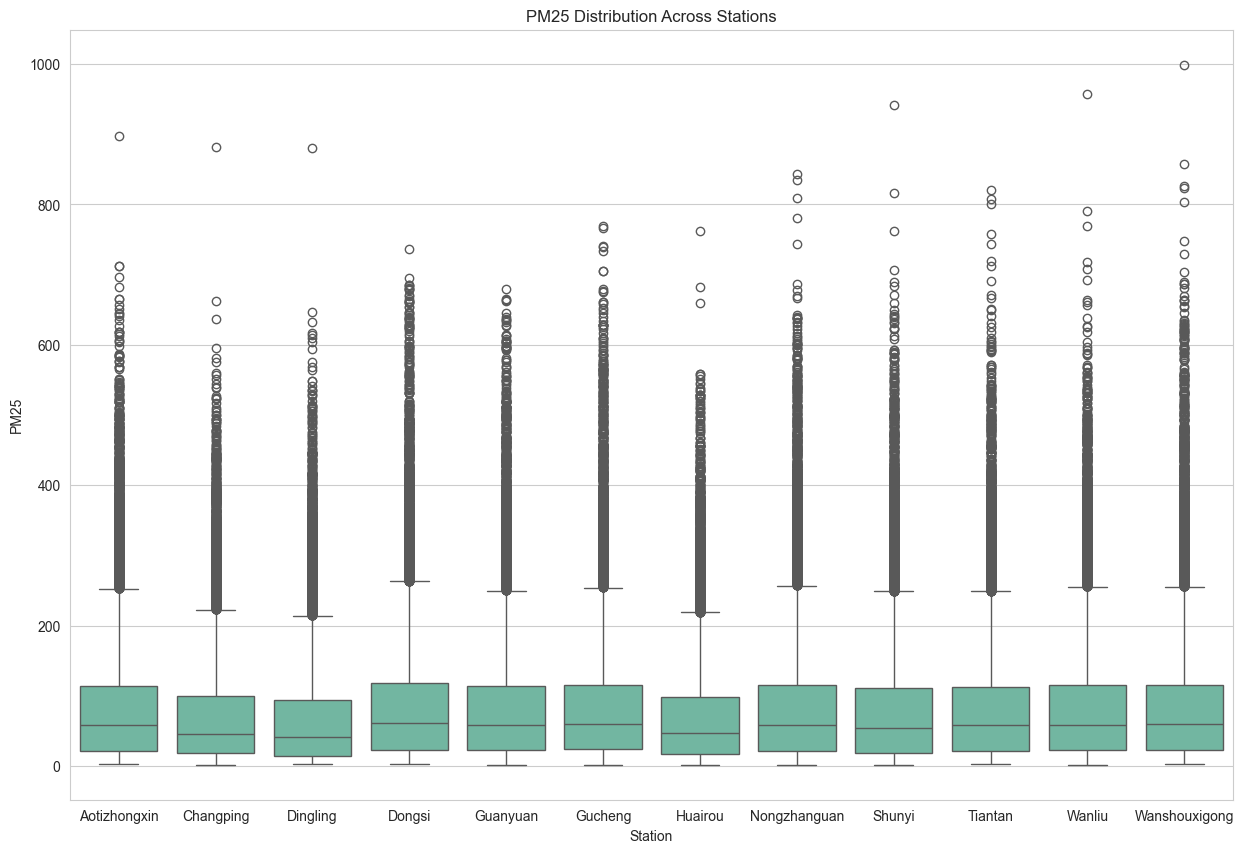

In [40]:
# Visualize air quality metrics across different stations
def plot_station_comparison(metric):
    plt.figure(figsize=(15, 10))
    sns.boxplot(x='station', y=metric, data=data)
    plt.title(f'{metric} Distribution Across Stations')
    plt.xlabel('Station')
    plt.ylabel(metric)
    plt.show()

# Example for PM2.5
plot_station_comparison('PM25')

#### PM10

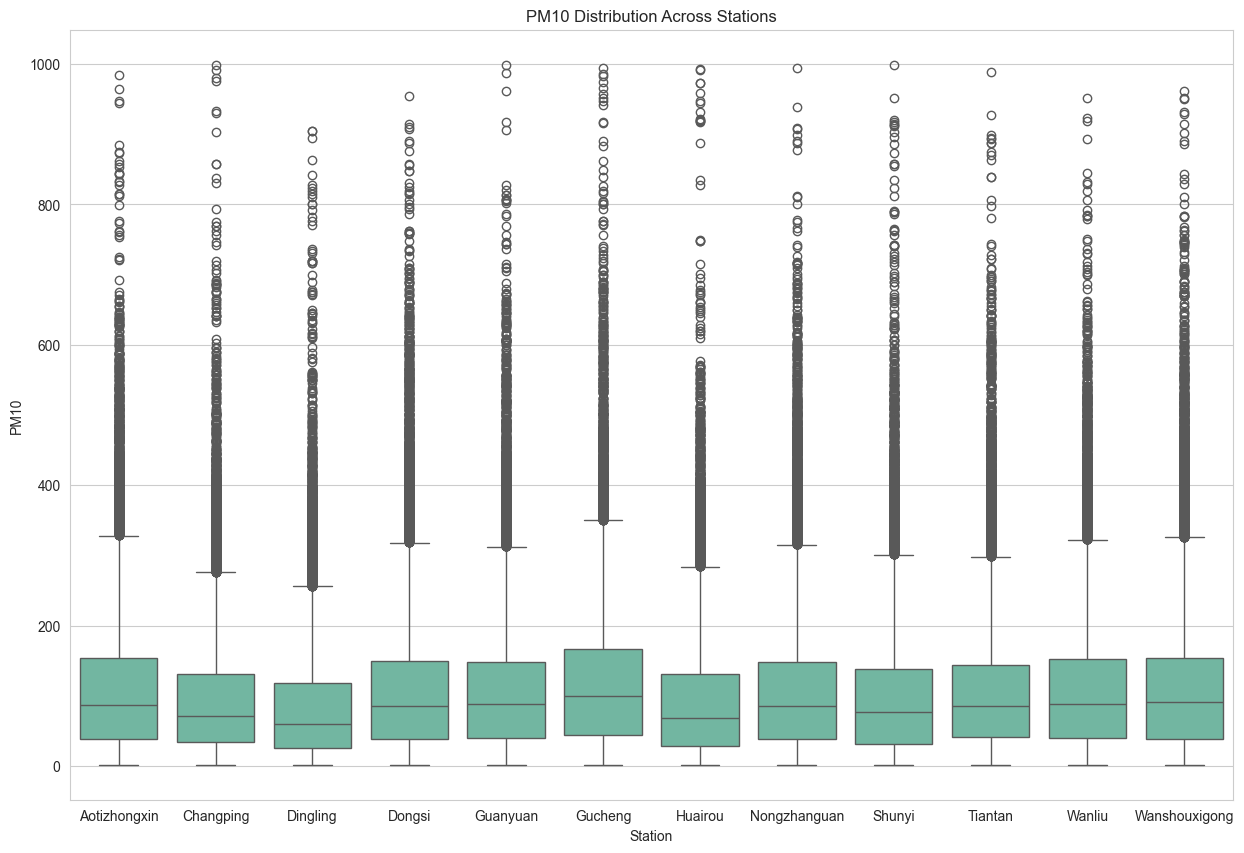

In [41]:
plot_station_comparison('PM10')

- PM2.5 dan PM10 di seluruh stasiun menunjukkan pola yang mirip, dengan banyak pengukuran yang berkisar antara 0 hingga 200 µg/m³, namun terdapat banyak outlier yang melebihi 600 µg/m³ bahkan mendekati 1000 µg/m³.

- Distribusi median (garis di tengah kotak) untuk sebagian besar stasiun berada pada rentang 50 hingga 100 µg/m³, baik untuk PM2.5 maupun PM10, menunjukkan bahwa sebagian besar pengukuran kualitas udara berada dalam kisaran ini.

- Terdapat beberapa stasiun yang memiliki rentang outlier yang lebih luas, seperti Aotizhongxin, Gucheng, dan Tiantan, yang menunjukkan adanya fluktuasi yang lebih ekstrem dibandingkan stasiun lainnya.

- Variasi antar stasiun pengukuran relatif seragam, namun stasiun seperti Guanyuan dan Shunyi tampak sedikit lebih rendah dalam distribusi PM2.5, dan Gucheng sedikit lebih tinggi dalam distribusi PM10.

## Analisis Lanjutan

### Bagaimana pola distribusi kualitas udara di berbagai wilayah Beijing berdasarkan kategori kualitas udara?

#### Clustering (Manual Grouping berdasarkan kualitas udara)

Dengan teknik Clustering akan mengelompokkan stasiun-stasiun berdasarkan rata-rata tingkat polusi PM10. Ini akan membantu dalam mengidentifikasi area-area dengan kualitas udara yang berbeda.

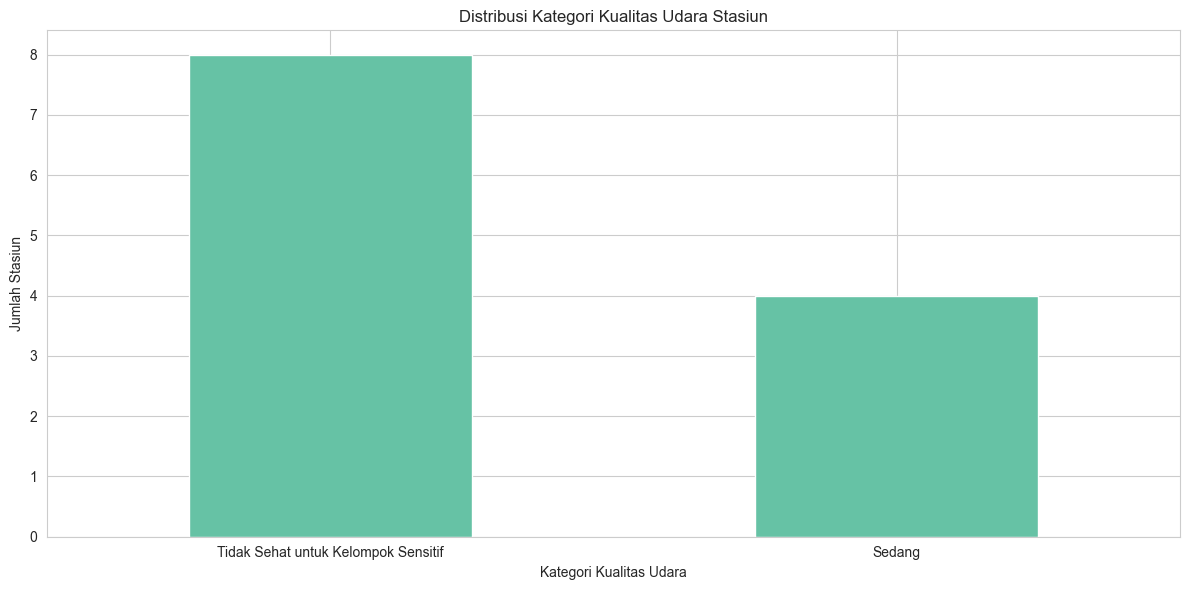


Stasiun dalam kategori 'Tidak Sehat untuk Kelompok Sensitif':
['Gucheng', 'Wanshouxigong', 'Wanliu', 'Dongsi', 'Aotizhongxin', 'Nongzhanguan', 'Guanyuan', 'Tiantan']

Stasiun dalam kategori 'Sedang':
['Shunyi', 'Changping', 'Huairou', 'Dingling']


In [42]:
# Menghitung rata-rata PM2.5 untuk setiap stasiun
station_avg_pm25 = data.groupby('station')['PM10'].mean().sort_values(ascending=False)

# Menentukan kategori kualitas udara
def categorize_air_quality(pm25):
    if pm25 <= 50:
        return 'Baik'
    elif pm25 <= 100:
        return 'Sedang'
    elif pm25 <= 150:
        return 'Tidak Sehat untuk Kelompok Sensitif'
    elif pm25 <= 200:
        return 'Tidak Sehat'
    elif pm25 <= 300:
        return 'Sangat Tidak Sehat'
    else:
        return 'Berbahaya'

# Menerapkan kategori ke setiap stasiun
station_categories = station_avg_pm25.apply(categorize_air_quality)

# Visualisasi hasil clustering
plt.figure(figsize=(12, 6))
station_categories.value_counts().plot(kind='bar')
plt.title('Distribusi Kategori Kualitas Udara Stasiun')
plt.xlabel('Kategori Kualitas Udara')
plt.ylabel('Jumlah Stasiun')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Menampilkan stasiun dalam setiap kategori
for category in station_categories.unique():
    print(f"\nStasiun dalam kategori '{category}':")
    print(station_categories[station_categories == category].index.tolist())

- Sebagian besar stasiun pemantauan kualitas udara di area tersebut termasuk dalam kategori "Tidak Sehat untuk Kelompok Sensitif", dengan jumlah sekitar 8 stasiun.
- Kategori kualitas udara "Sedang" memiliki frekuensi lebih rendah, dengan sekitar 4 stasiun.
- Tidak ada stasiun yang masuk dalam kategori "Baik", "Tidak Sehat", "Sangat Tidak Sehat", atau "Berbahaya".
- Situasi ini menunjukkan bahwa kualitas udara di wilayah tersebut umumnya berada pada tingkat yang mengkhawatirkan, terutama bagi kelompok sensitif seperti anak-anak, lansia, dan individu dengan masalah pernapasan.

### Bagaimana perbandingan kualitas udara antara pusat kota dan daerah pinggiran Beijing, dan apa implikasinya terhadap perencanaan kota?

#### Geospatial Analysis

Untuk analisis geospasial, diperlukan informasi latitude dan longitude setiap stasiun. Karena data ini tidak tersedia dalam dataset yang diberikan, maka akan menggunakan koordinat yang diperkirakan untuk tujuan demonstrasi.

In [53]:
import folium
from folium.plugins import MarkerCluster

# Koordinat perkiraan untuk stasiun-stasiun di Beijing (untuk demonstrasi)
station_coordinates = {
    'Aotizhongxin': (39.9322, 116.3467),
    'Changping': (40.2208, 116.2311),
    'Dingling': (40.2866, 116.2266),
    'Dongsi': (39.9289, 116.4174),
    'Guanyuan': (39.9289, 116.3600),
    'Gucheng': (39.9144, 116.1844),
    'Huairou': (40.3306, 116.6297),
    'Nongzhanguan': (39.9367, 116.4613),
    'Shunyi': (40.1255, 116.6561),
    'Tiantan': (39.8806, 116.4078),
    'Wanliu': (39.9866, 116.2866),
    'Wanshouxigong': (39.8783, 116.3522)
}

# Membuat peta
m = folium.Map(location=[39.9042, 116.4074], zoom_start=10)

# Menambahkan marker untuk setiap stasiun
marker_cluster = MarkerCluster().add_to(m)

for station, coords in station_coordinates.items():
    avg_pm25 = station_avg_pm25[station]
    category = station_categories[station]
    
    # Menentukan warna marker berdasarkan kategori
    if category == 'Baik':
        color = 'green'
    elif category == 'Sedang':
        color = 'blue'
    elif category == 'Tidak Sehat untuk Kelompok Sensitif':
        color = 'orange'
    elif category == 'Tidak Sehat':
        color = 'red'
    elif category == 'Sangat Tidak Sehat':
        color = 'purple'
    else:
        color = 'black'
    
    folium.Marker(
        location=coords,
        popup=f"Stasiun: {station}<br>Rata-rata PM2.5: {avg_pm25:.2f}<br>Kategori: {category}",
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

# Menyimpan peta
m.save("beijing_air_quality_map.html")
print("Peta telah disimpan sebagai 'beijing_air_quality_map.html'")

Peta telah disimpan sebagai 'beijing_air_quality_map.html'


In [54]:
import plotly.graph_objects as go

# Membuat data untuk plotly
data_plotly = []

for station, coords in station_coordinates.items():
    avg_pm25 = station_avg_pm25[station]
    category = station_categories[station]
    
    # Menentukan warna marker berdasarkan kategori
    if category == 'Baik':
        color = 'green'
    elif category == 'Sedang':
        color = 'blue'
    elif category == 'Tidak Sehat untuk Kelompok Sensitif':
        color = 'orange'
    elif category == 'Tidak Sehat':
        color = 'red'
    elif category == 'Sangat Tidak Sehat':
        color = 'purple'
    else:
        color = 'black'
    
    data_plotly.append(
        go.Scattermapbox(
            lat=[coords[0]],
            lon=[coords[1]],
            mode='markers',
            marker=go.scattermapbox.Marker(size=14, color=color),
            text=f"Stasiun: {station}<br>Rata-rata PM2.5: {avg_pm25:.2f}<br>Kategori: {category}",
            hoverinfo='text'
        )
    )

# Membuat layout
layout = go.Layout(
    title='Kualitas Udara di Beijing',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        style="open-street-map",
        center=dict(lat=39.9042, lon=116.4074),
        zoom=10
    ),
)

# Membuat figure
fig = go.Figure(data=data_plotly, layout=layout)

# Menampilkan peta
fig.show()

- Stasiun pemantauan tersebar di berbagai lokasi di Beijing dan sekitarnya, memberikan cakupan yang cukup luas untuk pemantauan kualitas udara.
- Terdapat konsentrasi stasiun yang lebih tinggi di area pusat kota dibandingkan dengan daerah pinggiran, menunjukkan fokus pemantauan pada daerah dengan kepadatan penduduk tinggi.
- Variasi warna marker (biru dan oranye) mengindikasikan perbedaan kualitas udara antar lokasi, dengan sebagian besar stasiun menunjukkan kualitas udara yang kurang baik (oranye).
- Beberapa stasiun di pinggiran kota (utara dan timur laut) menunjukkan kualitas udara yang relatif lebih baik (biru) dibandingkan dengan pusat kota, mungkin karena lebih jauh dari sumber polusi utama.
- Pola distribusi ini dapat membantu dalam mengidentifikasi hotspot polusi dan merencanakan intervensi yang tepat untuk meningkatkan kualitas udara di berbagai area kota.

## Conclusion

### 1. **Faktor-faktor apa saja yang paling mempengaruhi kualitas udara (PM2.5 dan PM10)?**

   Berdasarkan analisis korelasi, beberapa faktor utama yang mempengaruhi kualitas udara adalah CO, NO2, dan SO2, dengan CO sebagai faktor paling signifikan. Selain itu, O3 memiliki hubungan negatif dengan PM2.5 dan PM10, menunjukkan bahwa peningkatan O3 umumnya terkait dengan penurunan polutan lainnya. Faktor meteorologi seperti suhu (TEMP) dan tekanan udara (PRES) juga mempengaruhi konsentrasi O3, yang secara tidak langsung memengaruhi kualitas udara.

### 2. **Bagaimana distribusi kualitas udara (PM2.5 dan PM10) sepanjang tahun pada salah satu stasiun?**

   Pada stasiun Huairou, konsentrasi PM2.5 dan PM10 menunjukkan variabilitas yang signifikan sepanjang tahun. Ada fluktuasi harian dengan beberapa lonjakan ekstrem di atas 500 µg/m³, yang menunjukkan periode polusi tinggi. Secara umum, konsentrasi cenderung berada di kisaran 0 hingga 200 µg/m³, tetapi secara berkala terdapat lonjakan yang kemungkinan besar disebabkan oleh aktivitas manusia dan faktor lingkungan seperti perubahan musim atau cuaca.

### 3. **Bagaimana pola musim dalam perubahan suhu (TEMP), tekanan udara (PRES), dan titik embun (DEWP) pada salah satu stasiun?**

   Pada stasiun Huairou, pola musiman jelas terlihat:
   - **Suhu (TEMP):** Meningkat dari bulan Januari hingga puncaknya pada bulan Juli (musim panas), dan menurun tajam hingga bulan Desember (musim dingin).
   - **Tekanan Udara (PRES):** Tekanan tertinggi pada bulan Januari dan Desember, dan terendah pada bulan Juli, menunjukkan tekanan lebih tinggi di musim dingin.
   - **Titik Embun (DEWP):** Titik embun meningkat pada musim panas dan menurun hingga negatif pada musim dingin, menunjukkan tingkat kelembaban yang lebih tinggi selama musim panas.

### 4. **Bagaimana variasi kualitas udara dan faktornya di berbagai stasiun pengukuran?**


   Analisis box plot menunjukkan bahwa distribusi PM2.5 dan PM10 di berbagai stasiun relatif seragam, dengan sebagian besar stasiun mencatat nilai median antara 50 hingga 100 µg/m³. Namun, beberapa stasiun seperti Gucheng dan Tiantan memiliki lebih banyak outlier, yang menunjukkan polusi udara lebih ekstrem. Stasiun seperti Shunyi dan Guanyuan cenderung mencatat tingkat polusi yang lebih rendah.

### 5. **Bagaimana pola distribusi kualitas udara di berbagai wilayah Beijing berdasarkan kategori kualitas udara?**


   Berdasarkan rata-rata PM10 di setiap stasiun, sebagian besar stasiun di Beijing termasuk dalam kategori "Tidak Sehat untuk Kelompok Sensitif", terutama di pusat kota. Wilayah-wilayah ini mengalami tingkat polusi yang mengkhawatirkan. Wilayah dengan kategori "Sedang" lebih jarang ditemukan, terutama di stasiun pinggiran seperti Huairou dan Changping.

### 6. **Bagaimana perbandingan kualitas udara antara pusat kota dan daerah pinggiran Beijing, dan apa implikasinya terhadap perencanaan kota?**





   Dari analisis awal, pusat kota Beijing cenderung memiliki tingkat polusi udara yang lebih tinggi dibandingkan daerah pinggiran. Hal ini bisa disebabkan oleh kepadatan penduduk, aktivitas industri, dan lalu lintas di pusat kota. Implikasinya terhadap perencanaan kota adalah pentingnya menerapkan kebijakan zonasi yang lebih ketat, memperbanyak ruang hijau, dan mengurangi emisi di pusat kota untuk meningkatkan kualitas udara dan kesehatan masyarakat. 